#Working code for Reference

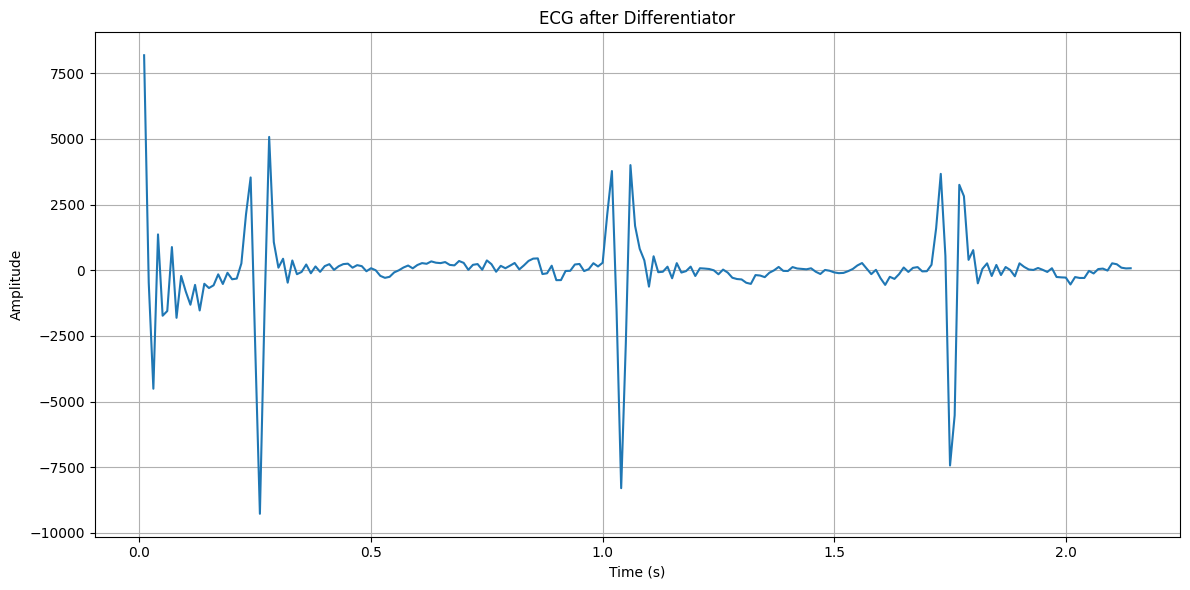

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Generate or load your ECG signal (replace with your actual ECG data)
# For this example, we'll use the synthetic ECG data you provided.
np.random.seed(123)
sampling_rate = 100  # Sampling rate in Hz

ecg_data = [12674, 12638, 12914, 12473, 12853, 12456, 13251, 13353, 13703, 13585, 13769, 13254, 12989, 12564, 12383, 12419, 12267, 12570, 12380, 12814, 12429, 12925, 13723, 19123, 20368, 11231, 7235, 9669, 12229, 12818, 13173, 13040, 13391, 13154, 13506, 13200, 13682, 13354, 13637, 13508, 13798, 13908, 13791, 14251, 14171, 14641, 14430, 15017, 14596, 15027, 14698, 14792, 14259, 13887, 13644, 13186, 13303, 12891, 13092, 12586, 12979, 12527, 13003, 12670, 13022, 12865, 13041, 12925, 12949, 13345, 12814, 13268, 12843, 13108, 12869, 13319, 12879, 13091, 12800, 12869, 13035, 12793, 13062, 12857, 13500, 13724, 13955, 13494, 13950, 13343, 13181, 12670, 12663, 12572, 12784, 12783, 12510, 12922, 12697, 13100, 13525, 18508, 20614, 13033, 8104, 9289, 11429, 12933, 13149, 12946, 13264, 13046, 13570, 13117, 13496, 13248, 13632, 13432, 13812, 13617, 13834, 13894, 14167, 14339, 14272, 14603, 14468, 14796, 14181, 14496, 13690, 13605, 13041, 13071, 12668, 12539, 12419, 12504, 12519, 12391, 12564, 12476, 12782, 12506, 13015, 12613, 12952, 12532, 12946, 12615, 12779, 12569, 12547, 12677, 12622, 13266, 13215, 13485, 13393, 13570, 12852, 12922, 12219, 12327, 12087, 12202, 12172, 12260, 12426, 12147, 12464, 12747, 16648, 20604, 15349, 7831, 8503, 10490, 12417, 12720, 12766, 12813, 12740, 13144, 12868, 13195, 13021, 13413, 13007, 13467, 13435, 13960, 13642, 14332, 14003, 14533, 14402, 14662, 14307, 14423, 13692, 13731, 13095, 13004, 12678, 12505, 12495, 12280, 12384, 12166, 12676, 12360, 12782, 12341, 12840]

# Filter the signal using a bandpass filter (0.5-40 Hz)
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

ecg_filtered = bandpass_filter(ecg_data, 0.5, 40, sampling_rate)

# Notch filter frequencies (50 Hz, 100 Hz, and 150 Hz)
notch_frequencies = [50, 100, 150]  # Specify the frequencies to notch out

def notch_filter(data, fs, frequencies):
    # Create notch filters for specified frequencies
    filtered_data = data.copy()
    for freq in frequencies:
        # Check if the frequency is within the valid range (0, fs/2)
        if 0 < freq < fs / 2:
            # Calculate the notch frequency in radians per second
            notch_freq = 2.0 * np.pi * freq
            # Design a notch filter
            b, a = butter(4, [notch_freq - 2.0*np.pi*1.0, notch_freq + 2.0*np.pi*1.0], btype='bandstop', fs=fs)
            # Apply the notch filter
            filtered_data = lfilter(b, a, filtered_data)
    return filtered_data

# Apply notch filters to remove specified frequencies
ecg_filtered = notch_filter(ecg_filtered, sampling_rate, notch_frequencies)

# Create time values for the x-axis
t = np.arange(0, len(ecg_filtered)) / sampling_rate  # Adjusted for the filtered signal

# Calculate the derivative of the filtered signal
ecg_derivative = np.diff(ecg_filtered)

# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[1:], ecg_derivative, label='Derivative of Filtered ECG Signal')
plt.title('ECG after Differentiator')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


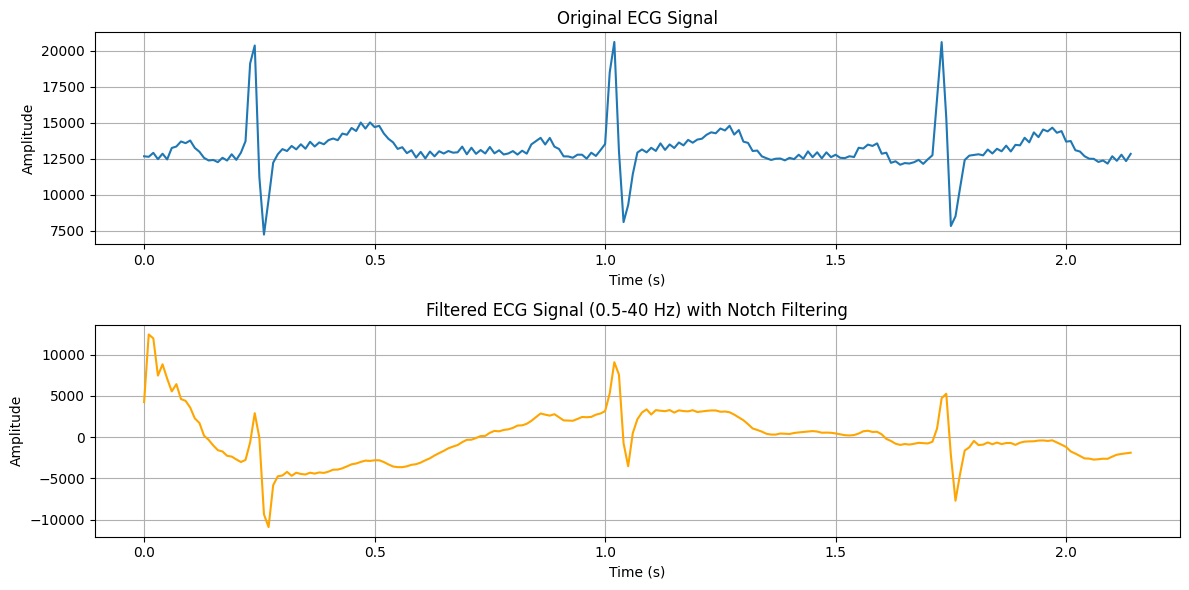

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

# Generate or load your ECG signal (replace with your actual ECG data)
# For this example, we'll use the synthetic ECG data you provided.
np.random.seed(123)
sampling_rate = 100  # Sampling rate in Hz

ecg_data = [12674, 12638, 12914, 12473, 12853, 12456, 13251, 13353, 13703, 13585, 13769, 13254, 12989, 12564, 12383, 12419, 12267, 12570, 12380, 12814, 12429, 12925, 13723, 19123, 20368, 11231, 7235, 9669, 12229, 12818, 13173, 13040, 13391, 13154, 13506, 13200, 13682, 13354, 13637, 13508, 13798, 13908, 13791, 14251, 14171, 14641, 14430, 15017, 14596, 15027, 14698, 14792, 14259, 13887, 13644, 13186, 13303, 12891, 13092, 12586, 12979, 12527, 13003, 12670, 13022, 12865, 13041, 12925, 12949, 13345, 12814, 13268, 12843, 13108, 12869, 13319, 12879, 13091, 12800, 12869, 13035, 12793, 13062, 12857, 13500, 13724, 13955, 13494, 13950, 13343, 13181, 12670, 12663, 12572, 12784, 12783, 12510, 12922, 12697, 13100, 13525, 18508, 20614, 13033, 8104, 9289, 11429, 12933, 13149, 12946, 13264, 13046, 13570, 13117, 13496, 13248, 13632, 13432, 13812, 13617, 13834, 13894, 14167, 14339, 14272, 14603, 14468, 14796, 14181, 14496, 13690, 13605, 13041, 13071, 12668, 12539, 12419, 12504, 12519, 12391, 12564, 12476, 12782, 12506, 13015, 12613, 12952, 12532, 12946, 12615, 12779, 12569, 12547, 12677, 12622, 13266, 13215, 13485, 13393, 13570, 12852, 12922, 12219, 12327, 12087, 12202, 12172, 12260, 12426, 12147, 12464, 12747, 16648, 20604, 15349, 7831, 8503, 10490, 12417, 12720, 12766, 12813, 12740, 13144, 12868, 13195, 13021, 13413, 13007, 13467, 13435, 13960, 13642, 14332, 14003, 14533, 14402, 14662, 14307, 14423, 13692, 13731, 13095, 13004, 12678, 12505, 12495, 12280, 12384, 12166, 12676, 12360, 12782, 12341, 12840]

# Filter the signal using a bandpass filter (0.5-40 Hz)
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

ecg_filtered = bandpass_filter(ecg_data, 0.5, 40, sampling_rate)

# Notch filter frequencies (50 Hz, 100 Hz, and 150 Hz)
notch_frequencies = [50, 100, 150]  # Specify the frequencies to notch out

def notch_filter(data, fs, frequencies):
    # Create notch filters for specified frequencies
    filtered_data = data.copy()
    for freq in frequencies:
        # Check if the frequency is within the valid range (0, fs/2)
        if 0 < freq < fs / 2:
            # Calculate the notch frequency in radians per second
            notch_freq = 2.0 * np.pi * freq
            # Design a notch filter
            b, a = butter(4, [notch_freq - 2.0*np.pi*1.0, notch_freq + 2.0*np.pi*1.0], btype='bandstop', fs=fs)
            # Apply the notch filter
            filtered_data = lfilter(b, a, filtered_data)
    return filtered_data

# Apply notch filters to remove specified frequencies
ecg_filtered = notch_filter(ecg_filtered, sampling_rate, notch_frequencies)

# Create time values for the x-axis
t = np.arange(0, len(ecg_data)) / sampling_rate

# Plot the original and filtered ECG signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_data, label='Original ECG Signal')
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t, ecg_filtered, label='Filtered ECG Signal', color='orange')
plt.title('Filtered ECG Signal (0.5-40 Hz) with Notch Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 2.8 MB/s eta 0:00:00


#Imports

In [ ]:
import numpy as np
from scipy.signal import find_peaks, butter, lfilter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import csv
import itertools
import collections

import pywt
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

import tensorflow as tf    # extra added line
import keras
from keras.models import Sequential
from keras.layers import Conv1D, AvgPool1D, Flatten, Dense, Dropout, Softmax, MaxPool1D
from keras.layers import GlobalAveragePooling1D     # extra added line
from tensorflow.keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D,Input, Conv1D, BatchNormalization, ReLU, DepthwiseConv1D, GlobalAveragePooling1D, Dense    # extra added line
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
Input, Conv1D, BatchNormalization, ReLU, DepthwiseConv1D, GlobalAveragePooling1D, Dense

#from keras.utils.np_utils import to_categorical

#from keras.utils.vis_utils import plot_model

from tensorflow.keras.utils import plot_model

from keras import regularizers
#imports to apply k-fold validation
from sklearn.model_selection import KFold, cross_val_score

import seaborn as sns
from typing import Tuple
import copy as cp
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Defining DSP Filter Functions

## Band Pass Filter (0.5 - 40 Hz)

In [ ]:
# Generate or load your ECG signal (replace with your actual ECG data)
# For this example, we'll use the synthetic ECG data you provided.
#np.random.seed(123)
sampling_rate = 100  # Sampling rate in Hz


# Filter the signal using a bandpass filter (0.5-40 Hz)
def bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

###Visuals for BPF

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter
import control as ctrl

# Filter parameters
lowcut = 0.5  # Low cutoff frequency in Hz
highcut = 40.0  # High cutoff frequency in Hz
order = 6  # Filter order

# Sampling rate
fs = 100.0  # Sampling rate in Hz

# Design the bandpass filter using scipy.signal
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Convert the filter to a transfer function using control.TransferFunction
sys = ctrl.TransferFunction(b, a, dt=1/fs)

# Transfer function representation
print(f'Transfer function (Control): {sys}')

# Difference equation coefficients
numerator_coefficients = sys.num[0][0]
denominator_coefficients = sys.den[0][0]
print(f'Difference equation coefficients (Numerator): {numerator_coefficients}')
print(f'Difference equation coefficients (Denominator): {denominator_coefficients}')


Transfer function (Control): 
                                  0.2712 z^12 - 1.627 z^10 + 4.068 z^8 - 5.424 z^6 + 4.068 z^4 - 1.627 z^2 + 0.2712
------------------------------------------------------------------------------------------------------------------------------------------------------
z^12 - 2.307 z^11 - 0.9587 z^10 + 4.415 z^9 + 1.286 z^8 - 5.035 z^7 - 1.302 z^6 + 3.216 z^5 + 0.9959 z^4 - 1.133 z^3 - 0.4208 z^2 + 0.1697 z + 0.07356

dt = 0.01

Difference equation coefficients (Numerator): [ 0.27122052  0.         -1.62732311  0.          4.06830777  0.
 -5.42441036  0.          4.06830777  0.         -1.62732311  0.
  0.27122052]
Difference equation coefficients (Denominator): [ 1.         -2.30654895 -0.95868081  4.41516299  1.28567861 -5.03475902
 -1.30166123  3.21555844  0.99589258 -1.13305497 -0.42081572  0.16966734
  0.07356076]


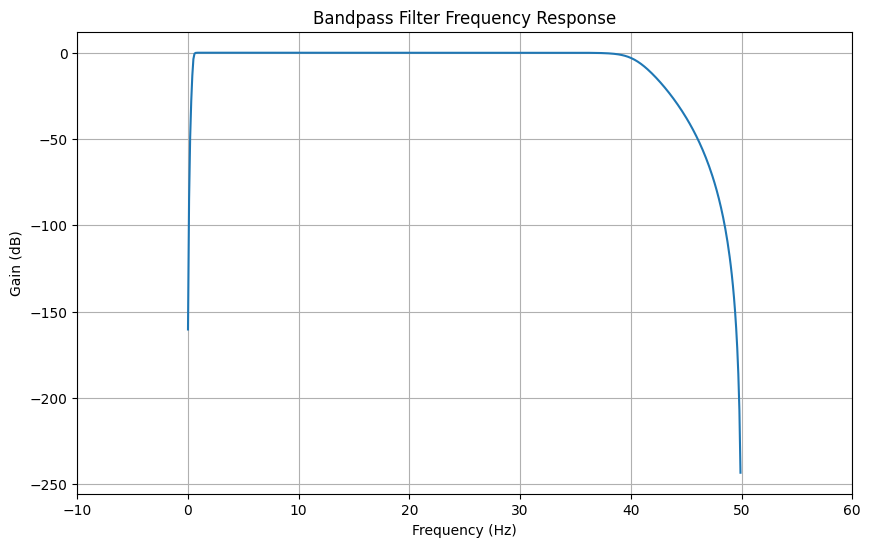

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the bandpass filter parameters
lowcut = 0.5
highcut = 40

# Generate frequency response using scipy.signal.freqz
frequencies, response = signal.freqz(*signal.butter(6, [lowcut, highcut], btype='band', fs=sampling_rate))

# Convert frequencies to Hz
frequencies_hz = frequencies * (sampling_rate / (2 * np.pi))

# Plot the magnitude response (Bode plot) on a linear scale
plt.figure(figsize=(10, 6))
plt.plot(frequencies_hz, 20 * np.log10(np.abs(response)))
plt.xlim(-10, 60)
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.grid(True)
plt.show()


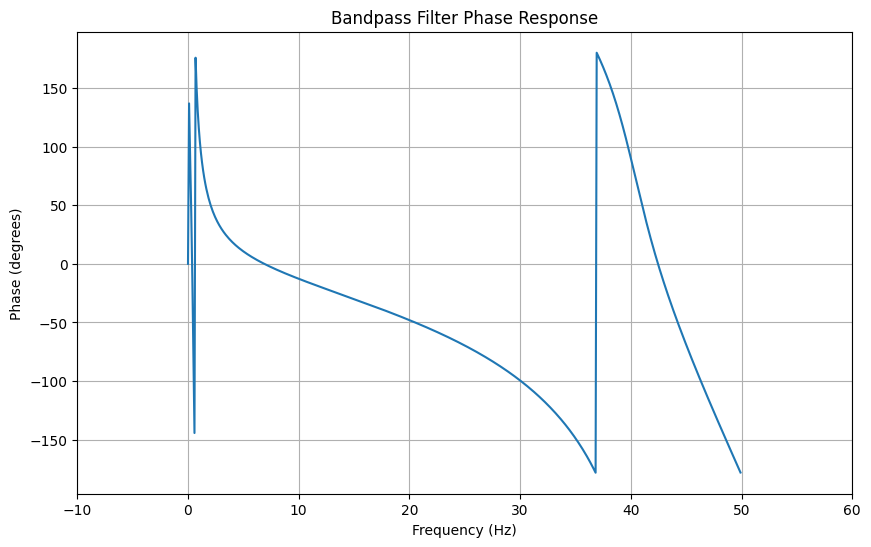

In [ ]:
# Generate frequency response using scipy.signal.freqz
frequencies, response = signal.freqz(*signal.butter(6, [lowcut, highcut], btype='band', fs=sampling_rate))

# Convert frequencies to Hz
frequencies_hz = frequencies * (sampling_rate / (2 * np.pi))

# Plot the phase response on a linear scale
plt.figure(figsize=(10, 6))
plt.plot(frequencies_hz, np.angle(response, deg=True))  # Use np.angle to get phase in degrees
plt.xlim(-10, 60)
plt.title('Bandpass Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)
plt.show()

##Notch Filter for 50, 100, 150 Hz

In [ ]:
# Notch filter frequencies (50 Hz, 100 Hz, and 150 Hz)
sampling_rate = 100
notch_frequencies = [50, 100, 150]  # Specify the frequencies to notch out

def notch_filter(data, fs, frequencies):
    # Create notch filters for specified frequencies
    filtered_data = data.copy()
    for freq in frequencies:
        # Check if the frequency is within the valid range (0, fs/2)
        if 0 < freq < fs / 2:
            # Calculate the notch frequency in radians per second
            notch_freq = 2.0 * np.pi * freq
            # Design a notch filter
            b, a = butter(4, [notch_freq - 2.0*np.pi*1.0, notch_freq + 2.0*np.pi*1.0], btype='bandstop', fs=fs)
            # Apply the notch filter
            filtered_data = lfilter(b, a, filtered_data)
    return filtered_data

# Apply notch filters to remove specified frequencies
#ecg_filtered = notch_filter(ecg_filtered, sampling_rate, notch_frequencies)

# ECG Signal

In [ ]:
ecg_data =  [17335, 7885, 7982, 10635, 10991, 10098, 10356, 10033, 10702, 11698, 10604, 10913, 11781, 11821, 12250, 12514, 13070, 13125, 12943, 11566, 10762, 10111, 9402, 9722, 9594, 9009, 8992, 8999, 9454, 9023, 8884, 9714, 9778, 9073, 9258, 9609, 9649, 10535, 9541, 9723, 10023, 10261, 10541, 10816, 9945, 9616, 8594, 8749, 7771, 8164, 8617, 8683, 7907, 8725, 13274, 20890, 22160, 12443, 6633, 6687, 8807, 8730, 9312, 9959, 9929, 10268, 10755, 11520, 11626, 11820, 12016, 12723, 13577, 13630, 13862, 12957, 12365, 11147, 10623, 10892, 10720, 10643, 10215, 10349, 10207, 10952, 10563, 10347, 11031, 11297, 10538, 10897, 11549, 11387, 11519, 12535, 11444, 12101, 13054, 12303, 12270, 12387, 11573, 11138, 11228, 11237, 11626, 11474, 10625, 11005, 12458, 18659, 25357, 22594, 11755, 9090, 11098, 11806, 12417, 12226, 12417, 12718, 12990, 13769, 13691, 13839, 14606, 15564, 16358, 17038, 16915, 16447, 15920, 15215, 14140, 13474, 12208, 11992, 11912, 11915, 11760, 11455, 12321, 12958, 12344, 11909, 12165, 12731, 12706, 12861, 13650, 13330, 13420, 13585, 13716, 13689, 13494, 13069, 12220, 11757, 11703, 11929, 11592, 11672, 10925, 10951, 13581, 22811, 25365, 18261, 9810, 8996, 10011, 10426, 11337, 11748, 11406, 11900, 12106, 12983, 13041, 12950, 14028, 15000, 14824, 15131, 15076, 14416, 14014, 13273, 12205, 11704, 12006, 11053, 11203, 11495, 11202, 11203, 11562, 11696, 11408, 12143, 11599, 12024, 12471, 12124, 12586, 12888, 12924, 13466, 13367, 12911, 12571, 11321, 11112, 11357, 11017, 11262, 11038, 10640, 11073, 15747, 24494, 24861, 14803, 8178, 9280, 10682, 10769, 11303, 11461, 11438, 11341, 12118, 12188, 12482, 13153, 13837, 13906, 14827, 15371, 14529, 14229, 13206, 12723, 12341, 11674, 11585, 11659, 11095, 11441, 11445, 11673, 11638, 11928, 12048, 12109, 12337, 12681, 12567, 12568, 13282, 13709, 14145, 14166, 14392, 14029, 13026, 12326, 11969, 11778, 12207, 12179, 12077, 11714, 12387, 17479, 25203, 24646, 13985, 9297, 10363, 12214, 12436, 12701, 12468, 12847, 13258, 13533, 14213, 15030, 15336, 15582, 16018, 17003, 16861, 16714, 16438, 15170, 14281, 13937, 13614, 13068, 12673, 12632, 12825, 13236, 13179, 13116, 13220, 13538, 14013, 14108, 14183, 14647, 14973, 15133, 15347, 16061, 16197, 15800, 15589, 14058, 13478, 13357, 13043, 13225, 12968, 13046, 12460, 14657, 23407, 25434, 23702, 12605, 11047, 12177, 12868, 13252, 13121, 13445, 13847, 14311, 14084, 14799, 15483, 16137, 16473, 17656, 17598, 17504, 17511, 16523, 15215, 14170, 13362, 13094, 13260, 12239, 12368, 12522, 12525, 12702, 12754, 12719, 13282, 13160, 13485, 13063, 13842, 14189, 14165, 14401, 15034, 15359, 14660, 14210, 13295, 12335, 12454, 12480, 12817, 12344, 12341, 11875, 14297, 23221, 25412, 20200, 10673, 10635, 11623, 12140, 12646, 12504, 12292, 12811, 13426, 13444, 13365, 14242, 14573, 15916, 16369, 16073, 16000, 15764, 15241, 13870, 13374, 12510, 12417, 12124, 11795, 11771, 12214, 12472, 12191, 12490, 12887, 12627, 12739, 12455, 12573, 13145, 12727, 12453, 13229, 13685, 13639, 13904, 14579, 14256, 15031, 14076, 12431, 12358, 12444, 12232, 12303, 12434, 11981, 11375, 13201, 19601, 25383, 22770, 11563, 9425, 11711, 12305, 11973, 12068, 12504, 12916, 12891, 12985, 13351, 13224, 14284, 15193, 15683, 16002, 15893, 15829, 15144, 14003, 12973, 12738, 12181, 11775, 11596, 12055, 11923, 12130, 11903, 11820, 12029, 12655, 12525, 12471, 12212, 12326, 12965, 12542, 12556, 12482, 13347, 12903, 13027, 14389, 14362, 13498, 13205, 12124, 11707, 11999, 11521, 11667, 11554, 11101, 10446, 13247, 21885, 25129, 16581, 8774, 8755, 10411, 10643, 10753, 11252, 11840, 12074, 12033, 12725]


In [ ]:
ecg_data =  [25614, 25614, 25615, 25614, 25615, 25613, 25614, 25613, 25609, 25613, 25613, 25614, 25612, 25613, 25611, 25609, 25606, 25598, 25579, 25526, 22206, 14759, 3525, 124, 123, 123, 123, 123, 124, 124, 123, 123, 123, 124, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 122, 123, 122, 123, 123, 123, 122, 123, 123, 123, 122, 122, 122, 123, 122, 122, 122, 122, 123, 122, 122, 122, 122, 123, 123, 122, 122, 122, 122, 122, 122, 122, 122, 122, 121, 122, 121, 123, 125, 126, 127, 128, 302, 716, 961, 997, 945, 127, 2699, 12866, 17929, 11092, 8169, 7990, 7359, 7345, 7589, 7682, 7861, 8187, 8253, 8501, 8917, 9260, 9782, 9769, 9830, 9968, 9886, 9644, 9522, 9620, 9928, 10050, 10349, 10523, 11116, 11258, 11564, 11946, 11834, 12395, 12609, 12910, 13302, 13624, 14168, 15393, 16893, 20847, 25436, 25589, 25608, 25611, 25613, 25612, 25614, 25614, 25611, 25616, 25616, 25614, 25614, 25614, 25613, 25618, 25618, 25619, 25618, 25618, 25619, 25617, 25617, 25617, 25619, 25618, 25618, 25619, 25617, 25620, 25619, 25617, 25617, 25616, 25613, 25611, 25606, 25601, 25591, 25560, 25464, 22920, 17976, 9144, 418, 122, 122, 122, 122, 122, 123, 122, 123, 122, 122, 123, 123, 123, 123, 123, 122, 121, 122, 122, 122, 122, 122, 122, 122, 121, 122, 122, 122, 122, 122, 122, 121, 121, 122, 122, 122, 122, 122, 122, 124, 125, 142, 2575, 4318, 5786, 6812, 7985, 8942, 9841, 10979, 11747, 12664, 13476, 14430, 15909, 18336, 23205, 25562, 25608, 25617, 25616, 25617, 25618, 25617, 25618, 25617, 25615, 25617, 25618, 25615, 25616, 25613, 25609, 25614, 25610, 25610, 25610, 25610, 25614, 25614, 25615, 25617, 25611, 25611, 25615, 25617, 25616, 25616, 25617, 25612, 25611, 25611, 25610, 25607, 25604, 25603, 25587, 25552, 24092, 18236, 8798, 171, 125, 124, 123, 124, 124, 123, 123, 123, 123, 124, 123, 124, 123, 123, 123, 124, 124, 124, 124, 123, 124, 124, 123, 122, 123, 122, 123, 122, 122, 122, 122, 122, 123, 121, 122, 121, 121, 122, 122, 122, 121, 121, 121, 123, 135, 2853, 5200, 6372, 7688, 9276, 10240, 11076, 11811, 12516, 12944, 13986, 15472, 17891, 22604, 25565, 25606, 25612, 25613, 25611, 25610, 25611, 25611, 25611, 25612, 25612, 25610, 25611, 25612, 25610, 25615, 25612, 25613, 25612, 25610, 25613, 25613, 25610, 25612, 25616, 25615, 25616, 25618, 25616, 25617, 25619, 25617, 25619, 25618, 25619, 25618, 25616, 25618, 25618, 25618, 25616, 25617, 25613, 25607, 25596, 25575, 25536, 24836, 20745, 14380, 5037, 126, 123, 123, 123, 124, 123, 123, 123, 123, 123, 123, 123, 123, 123, 124, 123, 123, 123, 123, 123, 122, 122, 124, 124, 124, 125, 124, 123, 124, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 123, 122, 124, 126, 126, 344, 2411, 1568, 5800]

In [ ]:
ecg_data =[14353, 14557, 14514, 14422, 14411, 14467, 14553, 14425, 14286, 14696, 15109, 15186, 15102, 14865, 15031, 14388, 13711, 13242, 12986, 13223, 12897, 12712, 13036, 11795, 13469, 19699, 25584, 19206, 11123, 11452, 12488, 12478, 12558, 12448, 12597, 12552, 12525, 12574, 12940, 13048, 13200, 13243, 13451, 13541, 13417, 13747, 13708, 13821, 13782, 13568, 13364, 13017, 12960, 12903, 12845, 12685, 12959, 12897, 12857, 12854, 13115, 13082, 12925, 13132, 12792, 13076, 13305, 13640, 13714, 13616, 13639, 13291, 12812, 12577, 12292, 12001, 12016, 12007, 12139, 11551, 10791, 13407, 20842, 24727, 14875, 9678, 11287, 12241, 12180, 12355, 12364, 12638, 12604, 12742, 12981, 12982, 13223, 13105, 13163, 13290, 13320, 13799, 14041, 14861, 13316, 13505, 13466, 11816, 12310, 11112, 11469, 10626, 11080, 11799, 11196, 11067, 10951, 11269, 11130, 11284, 11556, 11607, 11593, 11786, 12004, 12744, 13298, 12561, 12666, 13470, 13094, 12348, 11493, 11817, 11829, 12059, 12066, 11832, 10973, 11685, 16738, 24039, 19440, 10962, 9973, 11763, 11777, 12090, 12326, 12226, 12600, 12189, 12584, 12727, 12912, 12597, 12884, 13148, 13320, 13203, 13235, 13433, 13378, 13611, 13416, 13194, 12740, 12589, 12780, 12681, 12829, 13046, 13153, 12939, 13452, 13496, 13512, 13483, 13399, 13598, 13542, 13698, 13889, 14366, 14745, 14733, 14996, 14950, 14593, 13977, 13699, 13210, 13210, 13033, 13286, 13142, 12305, 12161, 15029, 22570, 23885, 14159, 10284, 11937, 12654, 12654, 12765, 12582, 12810, 12951, 13037, 13142, 13173, 13360, 13549, 13510, 13831, 13723, 13776, 13818, 14128, 13921, 13750, 13719, 13286, 12875, 12616, 12644, 12575, 12537, 12710, 12717, 12688, 12573, 12475, 12582, 12594, 12641, 12619, 13044, 13329, 13588, 13696, 13737, 13618, 13038, 12475, 12164, 11912, 11875, 11878, 12019, 11822, 10539, 11892, 17542, 23650, 17004, 10181, 10198, 11839, 12116, 12255, 12314, 12509, 12720, 12849, 13064, 13157, 13263, 13463, 13607, 13704, 13929, 13890, 14149, 14333, 14398, 14282, 13928, 13672, 13409, 13078, 12982, 13066, 12934, 12994, 12858, 13123, 13227, 13207, 13347, 13426, 13625, 13783, 14342, 14370, 14493, 14541, 14119, 13476, 12876, 12649, 12697, 12548, 12636, 12637, 11478, 12002, 16318, 23725, 20355, 11986, 10526, 12174, 12857, 12759, 13006, 13230, 13313, 13678, 13708, 14006, 14315, 14334, 14492, 14665, 14891, 15089, 15261, 15226, 15266, 15393, 14946, 14628, 14100, 13835, 13766, 13604, 13663, 13611, 13882, 13774, 13820, 13944, 14068, 14307, 14957, 14459, 14790, 15148, 14925, 14242, 13795, 13241, 13017, 13049, 13134, 13073, 12361, 11436, 13266, 20364, 24965, 17378, 11238, 11255, 12503, 12740, 12682, 13056, 12923, 13063, 13315, 13465, 13473, 13635, 13819, 14047, 14009, 13903, 14204, 14256, 14262, 14665, 14159, 14116, 13854, 13519, 13280, 13207, 13040, 13192, 13180, 13214, 13594, 13607, 14071, 14370, 14652, 14663, 14649, 14287, 13424, 13241, 13063, 12781, 12840, 12784, 12638, 11324, 12335, 17226, 24548, 20707, 12503, 10662, 11795, 12651, 12654, 12793, 13093, 13250, 13203, 13187, 13422, 13343, 13582, 13844, 13725, 13893, 14160, 14227, 14302, 14194, 14252, 14124, 14051, 13482, 13176, 13152, 13048, 13246, 13197, 13171, 13263, 13552, 13906, 14256, 14384, 14564, 14611, 14248, 13527, 12933, 12371, 12351, 12277, 12262, 12151, 11164, 10813, 14789, 23213, 24394, 13769, 10241, 11362, 12260, 12265, 12331, 12394, 12315, 12531, 12576, 12728, 13202, 13141, 13276, 13488, 13676, 13598, 13518, 13784, 13891, 13595, 13537, 13174, 12915, 12632, 12539, 12539, 12403, 12459, 12444, 12465, 12684, 13032, 13531, 13623, 13696, 13473, 13320, 12796, 12047, 11535, 11666, 11629, 11453, 10868, 9913, 13000, 21686, 21996, 11310, 9298]


In [ ]:
ecg_data = [15015, 15039, 14616, 13966, 13385, 12679, 12701, 12179, 12140, 11953, 12131, 12099, 11891, 12019, 11849, 11919, 11921, 12016, 11872, 11921, 11937, 12064, 12591, 12780, 12663, 12067, 11888, 10933, 10857, 11171, 11011, 11449, 14328, 17862, 13311, 9560, 10912, 10411, 10776, 10859, 10805, 11824, 11607, 11878, 11796, 12179, 12601, 13066, 13083, 13248, 12990, 12823, 12124, 11419, 10931, 11127, 10506, 10863, 10755, 10721, 11007, 11296, 10935, 11038, 11346, 11378, 11389, 11654, 11737, 12276, 12282, 12123, 11463, 10926, 11053, 10845, 11130, 11207, 11759, 16115, 18191, 11413, 9671, 10980, 11080, 10904, 11170, 11433, 11357, 11784, 12039, 11916, 12475, 13150, 13483, 13573, 13725, 13216, 12966, 12339, 11969, 11546, 11784, 11747, 12006, 11808, 11749, 11982, 12177, 12131, 12351, 12392, 12730, 13088, 13257, 13916, 13601, 12952, 12492, 12304, 12247, 12387, 12542, 13373, 16647, 19707, 13973, 11220, 11944, 12372, 12599, 12559, 13103, 12986, 13203, 13429, 13778, 14111, 14473, 14980, 15575, 15470, 15271, 15388, 14927, 14596, 14000, 13621, 13515, 13437, 13525, 13627, 13716, 13635, 13977, 14181, 14093, 14258, 14386, 14640, 15189, 15344, 15869, 15457, 15123, 14473, 14242, 14408, 14042, 14457, 15018, 17430, 21414, 18096, 12822, 14021, 14413, 14466, 14365, 14729, 14655, 14889, 15214, 15570, 15752, 16354, 16798, 17053, 17032, 16711, 16322, 15740, 15094, 14767, 14593, 14455, 14403, 14521, 14811, 14246, 14700, 14583, 14572, 14960, 15054, 14998, 15368, 16005, 15407, 15417, 14399, 13973, 13893, 13854, 13946, 13834, 15579, 19851, 20297, 12207, 12613, 13036, 12867, 12923, 13114, 13133, 13353, 13244, 13363, 13692, 13872, 14121, 14607, 14626, 14743, 14526, 13549, 13033, 12140, 12211, 11880, 11615, 11738, 11490, 11559, 11587, 11587, 11688, 11408, 11775, 12032, 12341, 12474, 12607, 11889, 11034, 10709, 10283, 10330, 10354, 10633, 11860, 16626, 17261, 9360, 9091, 9698, 9631, 9839, 10039, 9742, 10132, 10207, 10388, 10838, 10961, 11594, 12006, 12216, 12141, 11303, 10729, 9712, 9697, 9739, 9643, 9706, 9744, 9550, 9957, 9789, 9966, 9980, 9840, 10284, 10465, 11049, 11256, 11180, 10732, 10335, 10103, 9774, 9716, 9771, 10211, 11343, 15582, 16759, 9159, 9229, 9674, 9883, 9808, 10057, 10521, 10412, 10826, 11193, 11187, 11945, 12402, 12956, 13189, 12903, 12559, 12176, 11590, 11165, 10941, 10810, 11091, 11021, 11259, 11003, 11318, 11597, 11357, 11760, 11726, 11869, 11836, 11823, 12226, 12873, 12827, 13023, 12761, 12203, 11782, 11783, 11537, 11884, 11955, 13098, 16876, 18896, 11203, 10642, 11546, 11658, 12061, 12357, 12488, 12590, 13040, 13263, 13656, 13862, 14779, 14903, 14823, 15049, 14229, 13648, 13240, 12683, 12570, 12580, 12608, 12739, 12563, 12766, 13134, 12802, 13123, 13232, 13348, 13180, 13274, 13379, 13724, 14091, 14427, 14173, 13936, 13172, 12954, 12871, 12998, 13016, 13344, 17361, 20133, 13662, 11559, 12723, 12923, 12735, 13082, 13277, 13402, 13370, 13845, 14244, 14241, 14868, 15538, 15227, 15349, 15255, 14642, 13702, 13371, 13272, 13272, 12992, 13142, 13259, 13188, 13244, 13560, 13577, 13627, 13683, 13746, 13863, 13971, 13964, 14425, 14612, 14938, 15148, 14576, 14187]

In [ ]:
#Data recorded Uzair Rauf
ecg_data = [12380, 12377, 12594, 12982, 12492, 12983, 12937, 13135, 13125, 13166, 13212, 13609, 13716, 14071, 14339, 14232, 14798, 14581, 13849, 13405, 12501, 12154, 11384, 11491, 11992, 11891, 12068, 11857, 12111, 12107, 12103, 12280, 12287, 12353, 12311, 12380, 12600, 12717, 12625, 12430, 12507, 12646, 12594, 12975, 12725, 12632, 12760, 12787, 12799, 12655, 12790, 12956, 12518, 12771, 13191, 12840, 12931, 13215, 13378, 13297, 13546, 13059, 12906, 12481, 12489, 12614, 12607, 12484, 12537, 12653, 12897, 12290, 12917, 15770, 20038, 15340, 12060, 12139, 12436, 12395, 12588, 12558, 12429, 12902, 12902, 13025, 13033, 13129, 13643, 13319, 13533, 13731, 14141, 14281, 14171, 14485, 14393, 13995, 13226, 12479, 12137, 11561, 11698, 11535, 12017, 11772, 12127, 12212, 11920, 12140, 12035, 12524, 12234, 12366, 12635, 12645, 12395, 12433, 12196, 12471, 12332, 12295, 12451, 12785, 12513, 12997, 12917, 12866, 12665, 12666, 13142, 12779, 12536, 13181, 13195, 13329, 13640, 12957, 12925, 12778, 12471, 12442, 12257, 12674, 12533, 12692, 12685, 12510, 12412, 14205, 19215, 18082, 12636, 11837, 12341, 12385, 12442, 12758, 12472, 12527, 13284, 12739, 12925, 12641, 13518, 13345, 13573, 13915, 13293, 14185, 14213, 14328, 14547, 14177, 13338, 12968, 12174, 11652, 11372, 11508, 11964, 11870, 11976, 11781, 11995, 12487, 11938, 11967, 12290, 12555, 12086, 12629, 12377, 12524, 12508, 12844, 12529, 12374, 12516, 12729, 12645, 12607, 12344, 12880, 12927, 13149, 13069, 13365, 13616, 13201, 12789, 12709, 12550, 12109, 12694, 12561, 12357, 12521, 12857, 12734, 12429, 13641, 17769, 19161, 13416, 12022, 11912, 12381, 12512, 12297, 12465, 12646, 12855, 12968, 12832, 13170, 13330, 13446, 13623, 13583, 13698, 13884, 14349, 14670, 14364, 14376, 13879, 13063, 11963, 11645, 11718, 11403, 12018, 11852, 11742, 11869, 12242, 12048, 12182, 12202, 12610, 12396, 12230, 12307, 12679, 12515, 12690, 12635, 12455, 13012, 12692, 12699, 12299, 12692, 12704, 12565, 12924, 12672, 12878, 13348, 12918, 13441, 13518, 12883, 12858, 12558, 12322, 12448, 12281, 12282, 12572, 12629, 12446, 12744, 12426, 13505, 18795, 18603, 12762, 11193, 12484, 12128, 12067, 12693, 12601, 12812, 12852, 13037, 13007, 12937, 13076, 13361, 13478, 13952, 13981, 14116, 14379, 14389, 14489, 14103, 13319, 13243, 11796, 11622, 11822, 11322, 11495, 12197, 11842, 11831, 12022, 12163, 11970, 12102, 12564, 12368, 12340, 12814, 12467, 12466, 12436, 12370, 12592, 12645, 12647, 12682, 12791, 12899, 12469, 12567, 12806, 12883, 12770, 12567, 13104, 12863, 12654, 12786, 13166, 13294, 13572, 13541, 13809, 13288, 12564, 12772, 12896, 12325, 12598, 12888, 12746, 12615, 12529, 13013, 12702, 14723, 19750, 16557, 11871, 11998, 12435, 12435, 12594, 12754, 12972, 12515, 13136, 12785, 13195, 13331, 12996, 13451, 13667, 13810, 13968, 14294, 14538, 14609, 14383, 13944, 13285, 12433, 11852, 11655, 11727, 11447, 11648, 12118, 11756, 11730, 12092, 11989, 12077, 11827, 12387, 11837, 12622, 12325, 12166, 12296, 12398, 12362, 12170, 12338, 12748, 12672, 12570, 12796, 12757, 12526, 12277, 12586, 12795, 12701, 12784, 12369, 13176, 12760, 13172, 13124, 12973, 13558, 13717, 13414, 13443, 12635, 12501, 12387]

In [ ]:
#Data recorded: 515 samples
ecg_data = [15449, 15802, 16064, 16443, 16878, 17350, 17720, 17878, 18024, 18068, 17935, 17683, 17455, 16926, 16415, 15772, 14740, 13500, 12444, 11910, 11640, 11336, 11291, 11342, 11440, 11478, 11538, 11565, 11646, 11690, 11773, 11798, 11848, 11892, 11912, 11947, 11984, 12046, 12100, 12156, 12159, 12205, 12254, 12607, 13309, 13758, 13987, 13999, 13765, 13386, 12745, 12264, 12189, 12294, 12309, 12314, 12346, 12413, 12417, 12400, 12064, 12553, 15376, 16726, 16271, 14620, 11949, 8670, 6901, 6801, 6148, 5979, 7425, 10078, 13519, 14469, 14806, 15210, 15639, 15860, 16247, 16610, 17081, 17466, 17763, 17882, 18112, 18052, 17877, 17654, 17307, 16775, 16251, 15461, 14274, 13107, 12221, 11807, 11547, 11280, 11287, 11363, 11411, 11472, 11523, 11628, 11652, 11724, 11753, 11793, 11813, 11900, 11935, 12023, 12031, 12084, 12104, 12159, 12176, 12221, 12296, 12883, 13540, 13890, 13970, 13913, 13609, 13139, 12402, 12134, 12193, 12246, 12277, 12319, 12331, 12399, 12425, 12300, 12006, 13630, 16364, 16649, 15580, 13539, 10363, 7423, 6846, 6518, 5853, 6548, 8627, 11958, 14220, 14564, 14993, 15370, 15713, 16015, 16390, 16830, 17281, 17598, 17818, 17961, 18063, 17942, 17721, 17484, 16988, 16455, 15836, 14844, 13592, 12546, 11914, 11626, 11308, 11251, 11279, 11359, 11409, 11512, 11539, 11617, 11654, 11715, 11724, 11812, 11839, 11888, 11911, 11997, 12037, 12083, 12129, 12183, 12213, 12256, 12557, 13215, 13743, 13977, 14010, 13829, 13414, 12809, 12259, 12219, 12268, 12284, 12348, 12346, 12400, 12401, 12410, 12091, 12637, 15333, 16730, 16234, 14527, 11932, 8604, 6870, 6731, 6094, 6009, 7397, 10237, 13773, 14534, 14857, 15303, 15601, 15954, 16276, 16691, 17165, 17557, 17792, 17925, 18113, 17983, 17770, 17548, 17139, 16571, 16047, 15114, 13948, 12780, 12054, 11706, 11459, 11229, 11338, 11371, 11428, 11472, 11542, 11577, 11646, 11687, 11779, 11797, 11848, 11890, 11917, 11948, 12025, 12054, 12070, 12127, 12161, 12213, 12372, 13018, 13596, 13936, 14009, 13937, 13568, 13047, 12382, 12202, 12237, 12305, 12314, 12368, 12375, 12424, 12395, 12180, 12147, 14627, 16632, 16523, 15133, 12674, 9478, 7079, 6806, 6314, 5828, 6995, 9288, 12926, 14393, 14736, 15158, 15539, 15819, 16142, 16528, 16946, 17392, 17691, 17897, 18036, 18090, 17867, 17678, 17336, 16866, 16278, 15659, 14476, 13339, 12274, 11867, 11558, 11303, 11267, 11351, 11407, 11484, 11539, 11583, 11656, 11694, 11748, 11783, 11819, 11862, 11935, 11971, 12034, 12058, 12086, 12115, 12194, 12220, 12298, 12672, 13435, 13823, 14036, 13959, 13714, 13281, 12599, 12176, 12219, 12240, 12324, 12346, 12381, 12393, 12449, 12347, 12021, 13347, 16151, 16667, 15770, 13768, 10529, 7371, 6823, 6496, 5856, 6628, 8517, 12137, 14215, 14646, 15018, 15428, 15697, 16055, 16396, 16834, 17283, 17654, 17808, 18018, 18050, 17875, 17643, 17395, 16863, 16331, 15691, 14536, 13373, 12148, 11784, 11479, 11214, 11277, 11370, 11451, 11476, 11551, 11601, 11710, 11727, 11783, 11794, 11890, 11878, 11953, 11967, 12039, 12069, 12119, 12130, 12200, 12218, 12377, 12953, 13566, 13871, 13961, 13867, 13515, 13044, 12335, 12181, 12248, 12297, 12317, 12326, 12348, 12425, 12428, 12265, 12096, 14233, 16556, 16581, 15221, 13108, 9792, 7190, 6820, 6432, 5805, 6764, 9046, 12438, 14346, 14677, 15058, 15441, 15781, 16076, 16475, 16886, 17313, 17664, 17862, 17980, 18113, 17895, 17681, 17435, 16939, 16397, 15742, 14658, 13466, 12425, 11952, 11638, 11347, 11298, 11406, 11397, 11482, 11539, 11639, 11671, 11700, 11734, 11789, 11826, 11855, 11906, 11943, 11986, 12037, 12099, 12140, 12179, 12205, 12341, 13132, 13680, 14016, 13978, 13700, 13186, 12500, 12140]

In [ ]:
#5 seconds NSR signal from Simulator
ecg_data =  [14698, 15057, 15348, 15010, 14681, 14399, 13390, 12338, 11833, 11657, 11740, 11804, 11841, 11861, 11886, 11924, 11974, 12017, 12059, 12089, 12118, 12192, 12200, 12262, 12277, 12351, 12342, 12429, 12383, 12474, 12494, 12546, 12521, 12602, 12583, 12647, 12632, 12692, 12688, 12737, 12727, 12773, 12784, 12827, 12814, 12839, 12844, 12859, 12908, 12904, 12913, 12889, 12930, 12947, 12986, 12990, 13028, 13002, 13061, 13359, 14091, 14445, 14681, 14561, 14358, 13891, 13272, 12767, 12765, 12783, 12840, 12847, 12886, 12860, 12901, 12835, 11677, 11497, 17595, 23933, 24868, 18136, 10571, 9508, 11802, 12053, 11950, 12019, 12042, 12182, 12203, 12323, 12374, 12516, 12643, 12825, 12949, 13167, 13290, 13544, 13717, 13954, 14215, 14745, 15116, 15341, 14978, 14703, 14400, 13428, 12373, 11850, 11667, 11734, 11807, 11843, 11885, 11927, 12011, 12048, 12069, 12092, 12156, 12187, 12229, 12244, 12322, 12329, 12370, 12370, 12444, 12432, 12503, 12493, 12568, 12567, 12584, 12590, 12650, 12641, 12678, 12690, 12713, 12707, 12756, 12748, 12763, 12807, 12833, 12869, 12875, 12910, 12876, 12896, 12871, 12922, 12929, 12960, 12942, 13020, 12995, 13054, 13382, 14108, 14431, 14703, 14586, 14342, 13886, 13250, 12747, 12790, 12781, 12795, 12781, 12821, 12796, 12834, 12837, 11743, 11509, 17488, 23796, 24937, 18242, 10791, 9477, 11788, 12056, 11964, 12038, 12045, 12125, 12199, 12321, 12359, 12524, 12618, 12785, 12972, 13165, 13277, 13515, 13717, 13951, 14217, 14720, 15087, 15359, 15065, 14736, 14474, 13617, 12439, 11879, 11620, 11689, 11750, 11791, 11884, 11885, 11967, 11987, 12083, 12098, 12138, 12130, 12206, 12239, 12305, 12281, 12365, 12376, 12443, 12402, 12492, 12464, 12510, 12517, 12605, 12620, 12648, 12623, 12680, 12675, 12748, 12755, 12777, 12774, 12803, 12823, 12833, 12851, 12871, 12910, 12885, 12920, 12892, 12942, 12963, 13009, 12998, 13039, 12990, 13068, 13370, 14078, 14449, 14702, 14606, 14406, 13957, 13347, 12763, 12777, 12764, 12772, 12804, 12839, 12811, 12833, 12832, 11938, 11170, 16719, 23225, 25161, 18278, 10709, 9478, 11812, 12041, 11969, 12038, 12034, 12140, 12172, 12293, 12345, 12517, 12618, 12799, 12952, 13140, 13287, 13566, 13727, 13965, 14200, 14736, 15083, 15315, 15037, 14713, 14458, 13613, 12471, 11907, 11655, 11719, 11784, 11819, 11873, 11903, 11979, 12009, 12060, 12051, 12143, 12175, 12244, 12230, 12306, 12283, 12355, 12374, 12432, 12416, 12465, 12461, 12548, 12529, 12610, 12603, 12659, 12651, 12692, 12694, 12697, 12715, 12745, 12762, 12784, 12821, 12824, 12839, 12831, 12883, 12895, 12949, 12948, 12977, 12943, 12960, 12934, 13024, 13001, 13061, 13292, 14032, 14425, 14674, 14638, 14470, 14014, 13417, 12778, 12721, 12729, 12783, 12788, 12832, 12819, 12855, 12870, 12054, 11086, 16164, 22950, 25326, 19793, 11769, 9156, 11574, 12106, 11972, 12044, 12035, 12152, 12184, 12314, 12377, 12522, 12588, 12764, 12905, 13137, 13282, 13465, 13663, 13911, 14167, 14653, 15061, 15314, 15019, 14735, 14467, 13666, 12511, 11921, 11681, 11696, 11779, 11810, 11875, 11910, 11972, 11987, 12046, 12075, 12142, 12144, 12203, 12204, 12288, 12276, 12341, 12334, 12424, 12445, 12480, 12465, 12514, 12509, 12553, 12570, 12620, 12634, 12685, 12655, 12705, 12734, 12763, 12774, 12817, 12824, 12822, 12870, 12848, 12882, 12865, 12911, 12916, 12938, 12930, 12998, 12971, 12996, 12970, 13014, 13227, 13982, 14429, 14686, 14665, 14493, 14051, 13410, 12800, 12764, 12800, 12831, 12823, 12814, 12785, 12827, 12843, 12041, 11071, 16209, 22878, 25308, 19708, 11788, 9129, 11556, 12053, 11935, 12001, 12016, 12104, 12136, 12273, 12371, 12544, 12679, 12801, 13020, 13207, 13401, 13653, 13899, 14139, 14643]

In [ ]:
# 5 seconds data of Amna Wagley
ecg_data =  [13463, 12054, 13033, 12416, 13102, 11756, 13418, 12554, 12864, 12542, 13622, 12358, 13896, 13208, 13753, 12897, 14119, 13008, 14239, 12147, 13332, 12697, 12417, 12021, 13904, 11079, 12851, 11592, 13398, 12631, 13495, 12749, 13602, 12801, 13706, 12780, 13761, 13120, 13595, 12801, 13311, 12891, 13706, 13359, 14647, 13354, 14505, 14203, 13826, 12830, 12396, 12947, 13135, 12793, 12174, 14159, 17609, 23155, 21255, 16090, 12887, 13630, 12717, 13182, 11451, 13127, 11805, 13088, 11665, 13486, 12151, 13090, 12639, 14098, 12968, 13660, 13450, 14218, 13048, 14149, 13388, 14125, 13190, 13116, 12403, 12619, 13693, 12579, 13188, 13181, 13058, 12618, 13644, 12880, 13498, 12876, 13964, 12395, 13415, 12744, 13899, 12532, 14126, 12238, 13395, 12563, 14116, 13412, 14651, 13783, 15072, 15856, 17098, 15404, 16172, 15842, 15926, 15055, 15873, 17084, 22733, 25517, 21363, 16486, 15009, 15664, 14169, 14821, 14076, 13441, 13470, 14046, 13235, 14159, 13713, 14495, 13602, 14428, 13531, 15151, 13430, 16265, 13364, 15387, 13803, 14759, 13285, 13870, 12021, 14060, 12643, 13562, 12468, 13289, 13229, 13580, 12709, 13685, 12699, 13669, 13187, 12867, 13622, 13085, 13085, 12604, 13254, 12805, 13484, 13090, 14221, 13179, 14480, 13470, 14112, 11956, 13212, 12356, 13436, 12115, 12479, 11870, 17048, 20721, 22025, 13758, 13067, 11792, 12451, 11631, 11829, 12368, 11896, 11472, 12145, 12167, 12043, 12581, 12553, 12673, 13122, 12950, 12725, 13770, 12980, 13652, 13006, 13669, 12418, 13311, 12138, 12838, 12011, 13462, 12347, 12909, 11741, 13673, 11900, 13284, 12497, 13174, 12713, 13022, 12338, 12507, 13133, 12998, 12588, 12626, 12839, 13694, 13727, 13444, 14034, 13336, 13358, 11661, 12582, 11739, 12798, 10951, 12497, 14831, 21439, 21728, 16992, 12313, 13185, 12132, 12434, 11677, 13439, 12072, 12466, 12375, 12592, 12178, 13270, 12875, 12980, 12755, 14515, 14139, 14132, 14543, 15344, 13788, 13499, 14308, 13872, 13555, 12988, 13822, 13193, 13551, 13179, 14332, 12776, 14496, 13555, 14576, 12915, 15230, 13662, 14698, 13432, 15097, 13856, 14530, 14095, 15654, 14019, 16079, 14688, 16009, 13945, 14431, 13278, 14585, 13235, 13542, 13196, 17116, 21939, 24527, 17481, 14782, 14214, 13885, 13821, 12986, 13676, 13738, 14032, 13096, 14267, 13350, 14061, 13626, 14668, 13257, 15691, 13797, 15338, 13817, 15785, 13509, 15107, 13916, 13984, 13298, 14079, 13213, 13636, 13310, 14004, 13080, 13606, 13541, 13810, 13145, 13863, 13159, 13119, 13850, 13531, 13477, 13765, 13667, 13385, 14772, 13611, 14579, 13150, 13920, 12225, 13161, 11817, 13303, 11142, 13312, 16525, 23064, 18777, 14757, 12068, 12602, 12289, 12483, 11982, 12380, 12120, 12082, 12301, 12803, 12580, 13083, 12838, 13004, 13083, 12841, 13660, 13424, 14074, 13311, 13761, 12615, 13309, 13004, 12765, 12032, 13189, 12132, 12903, 12296, 13388, 12066, 13561, 12816, 13437, 12210, 13469, 12433, 13440, 12506, 13632, 13693, 13367, 13746, 14325, 12631, 12806, 13245, 12065, 12466, 12294, 11849, 11786, 16358, 20401, 21720, 14384, 13246, 11600, 12700, 12166, 12795, 11645, 13033, 11334, 12848, 12118, 13612, 12742, 13291, 12882, 13836, 13104, 14203, 13612, 14906, 13003, 14514, 13469, 14325, 13051, 13786, 13188, 12755, 13487, 13215, 13858, 13221, 13433, 12869, 13751, 13474, 13342, 12937, 14242, 12686, 14185, 13168, 14178, 13768, 14497, 13383, 13312, 12854, 12710, 12318, 12852, 11354, 12304, 14454, 21131, 21308, 17103, 12813, 12265, 11999, 12570, 11940, 11769, 11949, 11982, 11664, 11778, 12914, 12588, 12486, 12301, 12893, 12845, 14043, 12783, 13682, 12552, 13776, 13076, 13296, 12380, 13161, 11808, 12792, 12445, 12722, 12019, 13314, 11677, 13037, 12722, 12917, 12124, 13474]

In [ ]:
# 5 seconds data of Amna Wagley
ecg_data =[12293, 12287, 11777, 12973, 11467, 13077, 11888, 12803, 11686, 13191, 12090, 13276, 12764, 12649, 12333, 12562, 12619, 13224, 13210, 12503, 13849, 13404, 12917, 12218, 12510, 11450, 12450, 10713, 12182, 11274, 15642, 20235, 23079, 13373, 13144, 11175, 12787, 10980, 13593, 11140, 12748, 11961, 13086, 12279, 13297, 12781, 12847, 12624, 14122, 12723, 13146, 14052, 13441, 13291, 13620, 13674, 12803, 13067, 12471, 13095, 11770, 13521, 12243, 13631, 11865, 14148, 11946, 14109, 13378, 14857, 14210, 14457, 13569, 15408, 14199, 15706, 13543, 15870, 13691, 15245, 13762, 13530, 13328, 13584, 13512, 12632, 13087, 14876, 21463, 22753, 17914, 12876, 13359, 12357, 13089, 12438, 13506, 12709, 12799, 12186, 13666, 12832, 13461, 12906, 14347, 13049, 13634, 13572, 14363, 13372, 14038, 14112, 13779, 13451, 12885, 13612, 12928, 13321, 12029, 13571, 13014, 13557, 12294, 13870, 12468, 14414, 12683, 13913, 13492, 13748, 12347, 14315, 12656, 14245, 13367, 14794, 13347, 15171, 14134, 14641, 13260, 14131, 12936, 13813, 12636, 12727, 13120, 13996, 19753, 23213, 18957, 14112, 14468, 13844, 13941, 13503, 14644, 12989, 14177, 13519, 14066, 13540, 15800, 13287, 14858, 14154, 15446, 14043, 15927, 13882, 15857, 14450, 16042, 14141, 14879, 13904, 14628, 14156, 14591, 15019, 13182, 14853, 14827, 14936, 14447, 16032, 13848, 15265, 14802, 15121, 14858, 15599, 14964, 15664, 14427, 16853, 14280, 17465, 14949, 17135, 15040, 18220, 14971, 16937, 14964, 16504, 14956, 15965, 14705, 16933, 19424, 24163, 23191, 16887, 16288, 16105, 16127, 15186, 16905, 15679, 16118, 15777, 17029, 15947, 17043, 16284, 17686, 16109, 18095, 15908, 18663, 16722, 17976, 16435, 18812, 15014, 17270, 15150, 17018, 14993, 16985, 15334, 16818, 14888, 16806, 15161, 16217, 15649, 16188, 16051, 15257, 16348, 14692, 16590, 15109, 16681, 14067, 15687, 14556, 16135, 15532, 16765, 14155, 17179, 14317, 16364, 13991, 15647, 13818, 14721, 13488, 14115, 13771, 19009, 20631, 20724, 13964, 13028, 13211, 13069, 13496, 13011, 13090, 12864, 12980, 12209, 13470, 12207, 13154, 12237, 13692, 12416, 13908, 12028, 13944, 12634, 13600, 13042, 12443, 11313, 12758, 10648, 12466, 11180, 11328, 11438, 11567, 10836, 11684, 11488, 11205, 10997, 11341, 11225, 10936, 11489, 11454, 11090, 10463, 11497, 10518, 12021, 11307, 11667, 11772, 12129, 10445, 11362, 9746, 11485, 9573, 10537, 9055, 11110, 14337, 19968, 15993, 12479, 8489, 10214, 9234, 10428, 9538, 9963, 10074, 10853, 10357, 9920, 10610, 10412, 10955, 11367, 11198, 10503, 11917, 11004, 11614, 10827, 12301, 11118, 11532, 9619, 11004, 9800, 11354, 10224, 11088, 10580, 11285, 10377, 11642, 10564, 11815, 10644, 11652, 10394, 11517, 11044, 11713, 11313, 12123, 12194, 12052, 12113, 12418, 12260, 11409, 11709, 11135, 10916, 10644, 11394, 10951, 16583, 19746, 18920, 11976, 10751, 10164, 12483, 10585, 12438, 11475, 11362, 11003, 11898, 11443, 13008, 11833, 12692, 11987, 12952, 13258, 12318, 12688, 13088, 13852, 12714, 13136, 12145, 13157, 12249, 12596, 11875, 12815, 11637, 13545, 11892, 13543, 11607, 13830, 11920, 13353, 12019, 13466, 11705, 13079, 12981, 13228, 12868, 14171, 12516, 14382, 13895, 13508, 12464, 12620, 12424, 12958, 12605, 12395, 13967, 19222, 21829, 17198, 13054, 12386, 13705, 12606, 13258, 12158, 13982, 12067, 13642, 13485, 13927, 13159, 14063, 13403, 14341, 13894, 15033, 13832, 15233, 14263, 14921, 13355, 15910, 13048, 14094, 13331, 14103, 13321, 14880, 13985, 14360, 12937, 15213, 13093, 15038, 14412, 14942, 13063, 14766, 14288, 14411, 13731, 15448, 14293, 14812, 14446, 16374, 14347, 14255, 14456, 14004, 13995, 13503, 14149, 13632, 14929, 21645, 20748, 16582, 13008, 14147]

In [ ]:
# 5 seconds data of Amna Wagley
ecg_data = [13463, 12054, 13033, 12416, 13102, 11756, 13418, 12554, 12864, 12542, 13622, 12358, 13896, 13208, 13753, 12897, 14119, 13008, 14239, 12147, 13332, 12697, 12417, 12021, 13904, 11079, 12851, 11592, 13398, 12631, 13495, 12749, 13602, 12801, 13706, 12780, 13761, 13120, 13595, 12801, 13311, 12891, 13706, 13359, 14647, 13354, 14505, 14203, 13826, 12830, 12396, 12947, 13135, 12793, 12174, 14159, 17609, 23155, 21255, 16090, 12887, 13630, 12717, 13182, 11451, 13127, 11805, 13088, 11665, 13486, 12151, 13090, 12639, 14098, 12968, 13660, 13450, 14218, 13048, 14149, 13388, 14125, 13190, 13116, 12403, 12619, 13693, 12579, 13188, 13181, 13058, 12618, 13644, 12880, 13498, 12876, 13964, 12395, 13415, 12744, 13899, 12532, 14126, 12238, 13395, 12563, 14116, 13412, 14651, 13783, 15072, 15856, 17098, 15404, 16172, 15842, 15926, 15055, 15873, 17084, 22733, 25517, 21363, 16486, 15009, 15664, 14169, 14821, 14076, 13441, 13470, 14046, 13235, 14159, 13713, 14495, 13602, 14428, 13531, 15151, 13430, 16265, 13364, 15387, 13803, 14759, 13285, 13870, 12021, 14060, 12643, 13562, 12468, 13289, 13229, 13580, 12709, 13685, 12699, 13669, 13187, 12867, 13622, 13085, 13085, 12604, 13254, 12805, 13484, 13090, 14221, 13179, 14480, 13470, 14112, 11956, 13212, 12356, 13436, 12115, 12479, 11870, 17048, 20721, 22025, 13758, 13067, 11792, 12451, 11631, 11829, 12368, 11896, 11472, 12145, 12167, 12043, 12581, 12553, 12673, 13122, 12950, 12725, 13770, 12980, 13652, 13006, 13669, 12418, 13311, 12138, 12838, 12011, 13462, 12347, 12909, 11741, 13673, 11900, 13284, 12497, 13174, 12713, 13022, 12338, 12507, 13133, 12998, 12588, 12626, 12839, 13694, 13727, 13444, 14034, 13336, 13358, 11661, 12582, 11739, 12798, 10951, 12497, 14831, 21439, 21728, 16992, 12313, 13185, 12132, 12434, 11677, 13439, 12072, 12466, 12375, 12592, 12178, 13270, 12875, 12980, 12755, 14515, 14139, 14132, 14543, 15344, 13788, 13499, 14308, 13872, 13555, 12988, 13822, 13193, 13551, 13179, 14332, 12776, 14496, 13555, 14576, 12915, 15230, 13662, 14698, 13432, 15097, 13856, 14530, 14095, 15654, 14019, 16079, 14688, 16009, 13945, 14431, 13278, 14585, 13235, 13542, 13196, 17116, 21939, 24527, 17481, 14782, 14214, 13885, 13821, 12986, 13676, 13738, 14032, 13096, 14267, 13350, 14061, 13626, 14668, 13257, 15691, 13797, 15338, 13817, 15785, 13509, 15107, 13916, 13984, 13298, 14079, 13213, 13636, 13310, 14004, 13080, 13606, 13541, 13810, 13145, 13863, 13159, 13119, 13850, 13531, 13477, 13765, 13667, 13385, 14772, 13611, 14579, 13150, 13920, 12225, 13161, 11817, 13303, 11142, 13312, 16525, 23064, 18777, 14757, 12068, 12602, 12289, 12483, 11982, 12380, 12120, 12082, 12301, 12803, 12580, 13083, 12838, 13004, 13083, 12841, 13660, 13424, 14074, 13311, 13761, 12615, 13309, 13004, 12765, 12032, 13189, 12132, 12903, 12296, 13388, 12066, 13561, 12816, 13437, 12210, 13469, 12433, 13440, 12506, 13632, 13693, 13367, 13746, 14325, 12631, 12806, 13245, 12065, 12466, 12294, 11849, 11786, 16358, 20401, 21720, 14384, 13246, 11600, 12700, 12166, 12795, 11645, 13033, 11334, 12848, 12118, 13612, 12742, 13291, 12882, 13836, 13104, 14203, 13612, 14906, 13003, 14514, 13469, 14325, 13051, 13786, 13188, 12755, 13487, 13215, 13858, 13221, 13433, 12869, 13751, 13474, 13342, 12937, 14242, 12686, 14185, 13168, 14178, 13768, 14497, 13383, 13312, 12854, 12710, 12318, 12852, 11354, 12304, 14454, 21131, 21308, 17103, 12813, 12265, 11999, 12570, 11940, 11769, 11949, 11982, 11664, 11778, 12914, 12588, 12486, 12301, 12893, 12845, 14043, 12783, 13682, 12552, 13776, 13076, 13296, 12380, 13161, 11808, 12792, 12445, 12722, 12019, 13314, 11677, 13037, 12722, 12917, 12124, 13474]

In [ ]:
# 5 seconds data of Saad Imtiaz
ecg_data = [11926, 11619, 11845, 11576, 11828, 11666, 12120, 11766, 12092, 11893, 12227, 11985, 12426, 12075, 12383, 12149, 12380, 12079, 12498, 12362, 12404, 12209, 12431, 12350, 12459, 12415, 12429, 12552, 12570, 12536, 12491, 12749, 12950, 13442, 13131, 13216, 12828, 12687, 12352, 12774, 12149, 12550, 12248, 12629, 12105, 13750, 16725, 20151, 17448, 12107, 12428, 13152, 12309, 12860, 12408, 12843, 12466, 12777, 12581, 11592, 12811, 14065, 13357, 13643, 13621, 14421, 14499, 14519, 14981, 15363, 15774, 15006, 14454, 13742, 12867, 11611, 12391, 11905, 11780, 11606, 12110, 11511, 11472, 11366, 11846, 12102, 12436, 12165, 12760, 12387, 12853, 12456, 13126, 12757, 13018, 12751, 13286, 12892, 13237, 12905, 13214, 12991, 13262, 13009, 13181, 13146, 13595, 13610, 14042, 13886, 14019, 13573, 13499, 13234, 13127, 13285, 13303, 13252, 13329, 13637, 14471, 17668, 21392, 19088, 13351, 13638, 13474, 13636, 13281, 13512, 13271, 13453, 13258, 13637, 13502, 13934, 13769, 14171, 14049, 14617, 14563, 15414, 15425, 15974, 15950, 16368, 15601, 15109, 13952, 13540, 12548, 12712, 12253, 12392, 12069, 12406, 12226, 12478, 12288, 12490, 12367, 12765, 12737, 12870, 12751, 12883, 12907, 12966, 13065, 12962, 13070, 13035, 13217, 12960, 13128, 13013, 13323, 13208, 13655, 13556, 14153, 13693, 13669, 13050, 13100, 12582, 12893, 12602, 13042, 12640, 13069, 13230, 15499, 18999, 19675, 13587, 12510, 12883, 13070, 12700, 12847, 12700, 12931, 12788, 13102, 13133, 13320, 13380, 13643, 13739, 13915, 14239, 14521, 15094, 15406, 15615, 15490, 15514, 14715, 13960, 12966, 12568, 12034, 11958, 11512, 12004, 11520, 11846, 11599, 11969, 11724, 12125, 11850, 12249, 11899, 12395, 12105, 12409, 12100, 12544, 12255, 12572, 12354, 12570, 12400, 12772, 12907, 13182, 13225, 13356, 13041, 12755, 12346, 12205, 12313, 12227, 12372, 12218, 12407, 12537, 14112, 17951, 19862, 14075, 11745, 12124, 12597, 12140, 12410, 12124, 12595, 12357, 12690, 12415, 13016, 12766, 13274, 13134, 13720, 13743, 14356, 14447, 15014, 14986, 15315, 14831, 14538, 13582, 13007, 12133, 11886, 11659, 11633, 11547, 11679, 11676, 11582, 11641, 11516, 11808, 11802, 12021, 11847, 12173, 12126, 12275, 12131, 12424, 12234, 12493, 12189, 12561, 12193, 12727, 12605, 13234, 13129, 13546, 12933, 13090, 12370, 12501, 12063, 12401, 12045, 12368, 12075, 12695, 13372, 16460, 19744, 17515, 11822, 12341, 12551, 12436, 12281, 12447, 12419, 12482, 12553, 12763, 12772, 12698, 13049, 13185, 13533, 13612, 14094, 14247, 14950, 14926, 15379, 15088, 14925, 13900, 13379, 12312, 12297, 11478, 11832, 11428, 11833, 11480, 11923, 11559, 12116, 11632, 12121, 11780, 12119, 11951, 12298, 12055, 12378, 12117, 12476, 12167, 12226, 12190, 12434, 12272, 12402, 12336, 12519, 12712, 12919, 13213, 13316, 13267, 13002, 12741, 12363, 12314, 12166, 12367, 12106, 12471, 12267, 13194, 14870, 19498, 19559, 13455, 11974, 12877, 12264, 12471, 12130, 12478, 12180, 12783, 12471, 12896, 12712, 13176, 13003, 13464, 13350, 13978, 14141, 14651, 14813, 15078, 15071, 14944, 14305, 13633, 12687, 12167, 11781, 11605, 11653, 11500, 11552, 11595, 11569, 11706, 11670, 11903, 11971, 11833, 12133, 12102, 12237, 12195, 12400, 12219, 12474, 12288, 12587, 12236, 12544, 12255, 12586, 12360, 12730, 12271, 12713, 12375, 12842, 12351, 12657, 12414, 13000, 12932, 13481, 13306, 13597, 13198, 13263, 12655, 12747, 12478, 12670, 12395, 12658, 12512, 12826, 13759, 17119, 20543, 17461, 12381, 12639, 12840, 12575, 12472, 12530, 12660, 12587, 12818, 12593, 13077, 12954, 13285, 13162, 13741, 13659, 14212, 14251, 14989, 14829, 15505, 15208, 15018, 14055, 13334, 12574, 12141, 11932, 11674, 11917, 11633, 11930]

In [ ]:
# 5 sec with my sensor again (areeba's Signal)
ecg_data = [13113, 12630, 12858, 12451, 14165, 17248, 14568, 12046, 12328, 12556, 13046, 12700, 13070, 12966, 12880, 13268, 12952, 13242, 12643, 13906, 12953, 14151, 13270, 14273, 13441, 14539, 13186, 15306, 13407, 13989, 13145, 13998, 12063, 13531, 12476, 13071, 12140, 13329, 12254, 12827, 12568, 13460, 12919, 12603, 13075, 12687, 12776, 13650, 13538, 12639, 13647, 12782, 13885, 12283, 13445, 12387, 13591, 12097, 13200, 12047, 13146, 12704, 16758, 15686, 14141, 11710, 13105, 12305, 13072, 12438, 13458, 12586, 13323, 12544, 13790, 12437, 14116, 12476, 13654, 13068, 14016, 13659, 14268, 13723, 14222, 13721, 13840, 13523, 13560, 12624, 12577, 12908, 12397, 13077, 12632, 12918, 12256, 13220, 12683, 13519, 12289, 13647, 12442, 13917, 11914, 13460, 13165, 13683, 12856, 13863, 12223, 13861, 12056, 13568, 12700, 13189, 12316, 13177, 12447, 14147, 16360, 15893, 12772, 12056, 12851, 12892, 13152, 12860, 12889, 12675, 13114, 12985, 13606, 12453, 13523, 12823, 13770, 13038, 14327, 13391, 14602, 13234, 14766, 13381, 14327, 13112, 14102, 12585, 13648, 12088, 13154, 12321, 13020, 12410, 12845, 12750, 12913, 13212, 12855, 13126, 12686, 12922, 12857, 13304, 12565, 13861, 12409, 14198, 12603, 13913, 12285, 13541, 11935, 13360, 12340, 13187, 12203, 13522, 13078, 16877, 15333, 12970, 11699, 13117, 12455, 13265, 12775, 12915, 12954, 13025, 13308, 12981, 13422, 12484, 13716, 12883, 14071, 13026, 14388, 13283, 15116, 13309, 14737, 13381, 14102, 12461, 13939, 12560, 13418, 12267, 13254, 11819, 13654, 12293, 13442, 12542, 13529, 12557, 13379, 12982, 13302, 12661, 12885, 12884, 13538, 13449, 12978, 13600, 13181, 13483, 12494, 13690, 12415, 13124, 12678, 13470, 11996, 14119, 15565, 16975, 12278, 13151, 11761, 13572, 12216, 13781, 12575, 13713, 13232, 13497, 13110, 13227, 13225, 13610, 13633, 13813, 13971, 13992, 13995, 14148, 14593, 13812, 14568, 13464, 13991, 12942, 13664, 12245, 13341, 12148, 13859, 12243, 13517, 12475, 13751, 12583, 13775, 12549, 13297, 12680, 13688, 13285, 13456, 13200, 13332, 13609, 13243, 13263, 13022, 12899, 12811, 13155, 12525, 13508, 12393, 15297, 16361, 14738, 11810, 12878, 11804, 13866, 12398, 13743, 12512, 13564, 12456, 13568, 12877, 13675, 12822, 14106, 13390, 13719, 13550, 14048, 14135, 13932, 14014, 13629, 13820, 13343, 13157, 12390, 13086, 12139, 12849, 12711, 12165, 12174, 13180, 12340, 12831, 12612, 13633, 12163, 13376, 12449, 13528, 12635, 13383, 12633, 13562, 12564, 13250, 11975, 12928, 12071, 13378, 12068, 13119, 12158, 14725, 16292, 13555, 12007, 11602, 12364, 12522, 12761, 12570, 13107, 12114, 13093, 12426, 12960, 12766, 13578, 12241, 13645, 12977, 13914, 13019, 14035, 13177, 14608, 12973, 13926, 12428, 13253, 11875, 13042, 11714, 12330, 11892, 12376, 12406, 12651, 12487, 12398, 12299, 12329, 13128, 12115, 13362, 12167, 12980, 12180, 13558, 12227, 13430, 12029, 13437, 12119, 13069, 11468, 13103, 12244, 12983, 12004, 13272, 14750, 17133, 13400, 12076, 12042, 12714, 12494, 12544, 12842, 12600, 13169, 12584, 13130, 12371, 13330, 13020, 13664, 13109, 14139, 13030, 14602, 13256, 14737, 13908, 14588, 13003, 14046, 12609, 13827, 11938, 13534, 12182, 13007, 11967, 13663, 12409, 13233, 12670, 13318, 12924, 13399, 12839, 12952, 13078, 12714, 13638, 13409, 13741, 12761, 13910, 12613, 13551, 12462, 13848, 12453, 13796, 12258, 13335, 12168, 15437, 16174, 16299, 11806, 13169, 12260, 14001, 12368, 13647, 12558, 13745, 12689, 13580, 13425, 13305, 13381, 13623, 13630, 13578, 14335, 13987, 14503, 14018, 15078, 13867, 14708, 12974, 14044, 12624, 13864, 12683, 13648, 11974, 13342, 12683, 13748, 12570, 13519, 12645, 13651, 12655, 13345, 12758, 13308, 12654]

In [ ]:
#5 sec signal with areeba's second AD8232
ecg_data =  [25751, 1070, 157, 157, 155, 155, 406, 25713, 25881, 25879, 25880, 25871, 25801, 4205, 155, 153, 152, 154, 158, 19948, 25881, 25883, 25883, 25877, 25854, 20404, 158, 158, 157, 158, 157, 4060, 25883, 25883, 25885, 25882, 25866, 24587, 167, 164, 165, 167, 168, 4354, 25884, 25883, 25883, 25884, 25873, 25599, 1914, 172, 171, 172, 173, 914, 25877, 25886, 25885, 25882, 25874, 25789, 5390, 169, 169, 168, 167, 460, 25110, 25883, 25884, 25883, 25872, 25786, 4642, 163, 164, 163, 163, 3281, 25883, 25881, 25882, 25880, 25866, 25133, 329, 161, 160, 160, 159, 2217, 25882, 25883, 25883, 25881, 25873, 25802, 5895, 158, 158, 158, 157, 461, 25777, 25879, 25881, 25880, 25868, 25758, 2918, 157, 157, 156, 157, 676, 25877, 25881, 25880, 25881, 25871, 25802, 5652, 151, 151, 151, 150, 155, 22467, 25881, 25881, 25879, 25876, 25839, 12380, 154, 153, 153, 153, 156, 17884, 25879, 25878, 25877, 25872, 25851, 20453, 154, 153, 153, 153, 155, 14505, 25878, 25878, 25879, 25876, 25853, 20579, 156, 155, 156, 155, 156, 13893, 25880, 25879, 25879, 25879, 25864, 25407, 597, 158, 157, 157, 157, 1656, 25880, 25882, 25881, 25879, 25873, 25821, 7620, 159, 159, 159, 159, 191, 23515, 25881, 25882, 25883, 25876, 25838, 12472, 164, 163, 163, 163, 190, 23941, 25884, 25883, 25884, 25878, 25828, 8622, 169, 169, 169, 169, 173, 21666, 25888, 25887, 25885, 25880, 25840, 12294, 177, 176, 176, 176, 179, 15888, 25885, 25886, 25887, 25880, 25846, 21635, 186, 184, 185, 184, 185, 6293, 25888, 25886, 25884, 25883, 25865, 22071, 176, 175, 175, 175, 176, 9779, 25891, 25890, 25888, 25891, 25873, 22942, 191, 191, 190, 190, 189, 6073, 25893, 25895, 25894, 25891, 25871, 22418, 196, 193, 192, 192, 194, 12477, 25894, 25892, 25895, 25891, 25858, 13494, 199, 198, 197, 196, 201, 23090, 25896, 25895, 25892, 25886, 25785, 2609, 200, 199, 199, 199, 524, 25862, 25894, 25895, 25895, 25883, 25785, 2618, 200, 198, 200, 199, 945, 25891, 25890, 25893, 25892, 25872, 19821, 202, 201, 200, 201, 202, 11629, 25895, 25898, 25896, 25892, 25871, 19087, 203, 201, 202, 201, 203, 8693, 25895, 25895, 25895, 25894, 25876, 22939, 204, 203, 202, 202, 203, 4546, 25895, 25895, 25894, 25893, 25875, 21870, 204, 202, 202, 202, 204, 12910, 25893, 25896, 25895, 25891, 25864, 15048, 204, 203, 203, 203, 205, 15072, 25894, 25893, 25893, 25889, 25845, 10384, 203, 203, 202, 203, 243, 23317, 25895, 25895, 25891, 25885, 25521, 1471, 203, 203, 202, 203, 9502, 25893, 25893, 25895, 25892, 25862, 14159, 204, 203, 203, 203, 205, 15287, 25895, 25894, 25893, 25890, 25854, 13011, 204, 203, 203, 203, 209, 21794, 25890, 25893, 25893, 25882, 25637, 1623, 203, 203, 203, 202, 873, 25891, 25895, 25891, 25894, 25880, 25109, 206, 203, 203, 203, 203, 3391, 25891, 25892, 25894, 25888, 25871, 20520, 204, 203, 203, 203, 205, 13779, 25895, 25893, 25894, 25892, 25854, 11223, 204, 203, 203, 203, 207, 19618, 25896, 25896, 25892, 25888, 25851, 10846, 204, 203, 203, 202, 208, 21947, 25893, 25895, 25894, 25884, 25817, 4899, 203, 203, 202, 202, 624, 25893, 25895, 25893, 25894, 25882, 25539, 314, 203, 203, 202, 202, 1155, 25893, 25897, 25897, 25893, 25881, 25821, 4799, 202, 202, 202, 203, 11774, 25898, 25896, 25895, 25888, 25778, 1337]

In [ ]:
#5 sec signal with her first AD 8232
ecg_data =  [21703, 21656, 21653, 4631, -3699, -3684, -3657, -3689, -3665, 21559, 21549, 21552, 21566, 17248, -3709, -3708, -3700, -3708, -3698, 4625, 21636, 21671, 21693, 21612, 21621, 4125, -3661, -3709, -3696, -3712, -3686, 14683, 21648, 21693, 21655, 21646, 20312, -3749, -3767, -3772, -3778, -3791, -1619, 21664, 21631, 21473, 21613, 21554, -3252, -3791, -3801, -3833, -3801, 1958, 21620, 21654, 21531, 21538, 21597, 5595, -3825, -3837, -3806, -3797, -3792, 17701, 21575, 21600, 21644, 21538, 18019, -3747, -3771, -3749, -3739, -3758, 7396, 21590, 21574, 21582, 21614, 21565, 1106, -3811, -3850, -3847, -3837, -2427, 21691, 21637, 21666, 21702, 21654, 11093, -3804, -3811, -3875, -3844, -3839, -984, 21645, 21620, 21586, 21478, 21486, -2835, -3861, -3831, -3862, -3877, -3866, 13360, 21597, 21588, 21623, 21562, 17236, -3870, -3852, -3885, -3873, -3884, 6299, 21529, 21638, 21705, 21678, 21588, 6977, -3834, -3818, -3846, -3848, -3863, -3716, 21172, 21589, 21585, 21663, 21591, 21609, 8825, -3828, -3870, -3868, -3856, -3834, -810, 21710, 21696, 21689, 21721, 21684, 16384, -3792, -3799, -3810, -3806, -3802, 3667, 21684, 21726, 21662, 21690, 21667, 7524, -3884, -3859, -3852, -3840, -3787, 21070, 21505, 21581, 21635, 21650, 15966, -3823, -3837, -3818, -3823, -3830, 13096, 21745, 21644, 21704, 21738, 21664, 3784, -3809, -3844, -3819, -3808, -3816, 17462, 21631, 21629, 21609, 21604, 21549, -3789, -3817, -3814, -3812, -3814, -3746, 21695, 21657, 21701, 21695, 21613, 20342, -3853, -3829, -3813, -3837, -3810, -2689, 21625, 21672, 21735, 21693, 21650, 10320, -3811, -3818, -3837, -3815, -3825, 19266, 21717, 21676, 21615, 21641, 20706, -3776, -3851, -3847, -3851, -3850, -3847, 7791, 21594, 21639, 21587, 21666, 21571, 21186, -3854, -3835, -3851, -3856, -3851, -3852, 6882, 21650, 21593, 21656, 21598, 21627, 8477, -3867, -3860, -3859, -3868, -3850, 15593, 21684, 21741, 21670, 21644, 21346, -3809, -3851, -3830, -3829, -3867, 3263, 21609, 21568, 21728, 21647, 21450, -241, -3868, -3860, -3838, -3845, 5142, 21543, 21581, 21544, 21552, 21532, -2870, -3848, -3844, -3859, -3858, 1651, 21549, 21573, 21583, 21571, 21540, -336, -3852, -3852, -3839, -3848, 5921, 21603, 21578, 21581, 21574, 21496, -2518, -3849, -3852, -3849, -3851, 9724, 21589, 21596, 21602, 21621, 21332, -3848, -3848, -3839, -3850, -3849, 5774, 21591, 21594, 21632, 21677, 21494, -3844, -3848, -3832, -3832, -3847, -2289, 21599, 21616, 21641, 21677, 21639, 14374, -3825, -3844, -3826, -3844, -3841, 19725, 21639, 21659, 21634, 21653, 18881, -3828, -3843, -3847, -3832, -3838, 11932, 21628, 21620, 21609, 21638, 21557, -2725, -3833, -3841, -3843, -3833, -3334, 21600, 21648, 21618, 21622, 21633, 12590, -3840, -3826, -3833, -3839, -3829, 12938, 21613, 21628, 21618, 21600, 20600, -3830, -3844, -3842, -3846, -3847, 9796, 21636, 21604, 21636, 21649, 21614, 927, -3837, -3835, -3832, -3832, -2246, 21634, 21669, 21659, 21604, 21601, 11072, -3824, -3825, -3823, -3840, -3824, 6611, 21627, 21618, 21658, 21603, 21593, 7757, -3834, -3830, -3818, -3834, -3780, 20582, 21614, 21618, 21649, 21630, 18769, -3838, -3838, -3828, -3819, -3839, 19157, 21648, 21614, 21649, 21653, 21450, -3836, -3825, -3837, -3825, -3819, -1627]

In [ ]:
# 5 sec signal with my lead
ecg_data = [12236, 12709, 12302, 12878, 12309, 12020, 12363, 11480, 11778, 11141, 11640, 10927, 11187, 11323, 11189, 11480, 10928, 12006, 11779, 11789, 11466, 10761, 10390, 10867, 10011, 10445, 10232, 10808, 14150, 12609, 10252, 9336, 10446, 10112, 10424, 10242, 10145, 10376, 10381, 10862, 10342, 10596, 10947, 11283, 11162, 11325, 11360, 11237, 11323, 11169, 11289, 10654, 10550, 10636, 10536, 10622, 10447, 11295, 10964, 11283, 11747, 11535, 11880, 11602, 12068, 10907, 11149, 11153, 11014, 10905, 11040, 10821, 12128, 15964, 12959, 10899, 11071, 11501, 11164, 11428, 11670, 11327, 11920, 11544, 12252, 11796, 12128, 12132, 12323, 12859, 12427, 13015, 12456, 12885, 12280, 12090, 12013, 11931, 11774, 11490, 12045, 11639, 12188, 12209, 12090, 12333, 12662, 13174, 12942, 13372, 12381, 12436, 11572, 12104, 11874, 11793, 12300, 11839, 15366, 16007, 12916, 11715, 12452, 12327, 12385, 12489, 12301, 12848, 12631, 12878, 12783, 12884, 13244, 13303, 13595, 13146, 13943, 13615, 13675, 13798, 13472, 13012, 13156, 12949, 12288, 13231, 12612, 13406, 12700, 13168, 13104, 13311, 13684, 13494, 13971, 13556, 13714, 12866, 12829, 12720, 12846, 13024, 12529, 12831, 13880, 17760, 14140, 12973, 12925, 13012, 13243, 12790, 13383, 13102, 13602, 13109, 13719, 13430, 13481, 14047, 13654, 14442, 14044, 14285, 14206, 14253, 13939, 13677, 13350, 13159, 13314, 12937, 13399, 13281, 13457, 13266, 13242, 13603, 13315, 13536, 13907, 14009, 13806, 14055, 14043, 13975, 13665, 13374, 13651, 13314, 13683, 13147, 14484, 17980, 15183, 13276, 13194, 13681, 13264, 13698, 13283, 13576, 13490, 13634, 13622, 13546, 13842, 13587, 14024, 13767, 14087, 14036, 14003, 14121, 13708, 13936, 13071, 13366, 12699, 12856, 12846, 13017, 12968, 12862, 13242, 12805, 13143, 12767, 13010, 12990, 13034, 13177, 13024, 13191, 12583, 12858, 12264, 12720, 12455, 12463, 12362, 13985, 17330, 14017, 12583, 12094, 13021, 12438, 12641, 12333, 12585, 12712, 12561, 12854, 12150, 12494, 12504, 13187, 12698, 13318, 13217, 12901, 13071, 12569, 12413, 12512, 12112, 12491, 12035, 12359, 12134, 12425, 12107, 12010, 12779, 12113, 12205, 12385, 12737, 12293, 12872, 12437, 12793, 11919, 12271, 12253, 12493, 12385, 12127, 12207, 12618, 16245, 14521, 12365, 11610, 12335, 12371, 12320, 12490, 12249, 12533, 12087, 12692, 12376, 12946, 12864, 12779, 13230, 12589, 13712, 13004, 13138, 12695, 13208, 12628, 12365, 12492, 12218, 12566, 12210, 12310, 12681, 12165, 12997, 12410, 12700, 12368, 12646, 12842, 12715, 12952, 12845, 13176, 12606, 12809, 12592, 12625, 12392, 12784, 12331, 14471, 16857, 13566, 12386, 12307, 13098, 12670, 12763, 12634, 13057, 12860, 12836, 13241, 12750, 13447, 12907, 13801, 13478, 13835, 13931, 13440, 13960, 13170, 13627, 12827, 12987, 12587, 12541, 12773, 12857, 12992, 12633, 13342, 12852, 13188, 12855, 13138, 13205, 13253, 13530, 12973, 13360, 12483, 13037, 12577, 12901, 12765, 12461, 13680, 17046, 14426, 12500, 12640, 12872, 12884, 13277, 12918, 13387, 12767, 13325, 13236, 13371, 13530, 13416, 13907, 13576, 14026, 13862, 14020, 13851, 13576, 13469, 13045, 13204, 12673, 13202, 12778, 13043, 12849, 13129, 13176, 13025, 13510, 12978, 13518, 12999, 13753, 13144, 13580]


In [ ]:
# Areeba's 5 sec signal with her ECG lead
ecg_data = [13275, 12295, 13100, 12300, 13032, 12130, 13394, 12328, 13601, 11960, 13690, 12259, 13716, 12276, 13857, 12270, 14107, 12106, 14323, 12201, 13954, 12210, 13483, 12127, 13647, 11853, 13721, 11927, 14233, 15880, 15819, 12428, 12855, 12673, 13035, 13144, 12955, 12920, 12959, 13439, 12726, 13687, 12829, 13963, 12723, 14230, 12941, 14766, 12794, 14869, 12893, 14961, 12957, 14669, 12329, 14690, 11855, 14017, 11925, 13507, 12358, 13009, 12272, 13427, 12854, 13045, 13038, 13315, 13289, 12561, 13846, 12619, 13667, 12894, 14407, 12392, 13910, 12065, 13643, 11803, 13906, 11861, 13663, 12001, 14091, 15051, 16989, 12542, 13008, 12371, 13507, 12555, 13238, 12960, 12788, 13129, 13068, 13446, 12887, 13528, 12667, 14011, 12551, 14393, 12726, 14645, 12848, 14975, 12882, 14532, 12509, 14422, 12000, 13579, 12000, 12989, 11945, 13202, 12014, 12721, 12432, 12942, 12533, 12708, 13010, 12458, 13428, 12217, 13265, 12471, 13444, 12294, 13948, 12297, 13412, 11814, 13425, 11846, 13456, 11700, 13447, 11551, 14864, 16176, 15504, 11726, 13290, 12514, 13178, 12279, 12624, 12437, 12437, 13028, 12977, 12614, 12609, 13078, 11803, 13110, 13082, 13757, 12815, 14718, 12781, 14601, 13153, 14803, 12406, 14306, 12019, 13804, 12286, 13808, 12214, 13696, 12498, 13382, 12932, 13544, 13367, 12912, 13455, 13195, 13667, 13642, 13789, 13339, 14420, 13200, 14074, 13016, 14857, 12378, 14173, 12256, 13726, 12075, 14491, 12362, 13489, 14448, 19098, 13195, 14204, 13569, 14308, 13422, 14139, 12964, 13800, 14040, 13719, 14159, 13716, 14506, 13272, 14099, 13677, 14697, 13693, 15224, 13685, 14648, 13921, 15536, 13785, 14671, 12589, 14919, 11942, 13671, 12296, 13434, 10784, 11963, 10100, 11849, 10351, 11566, 11146, 11489, 11226, 10999, 11345, 11125, 11444, 11241, 12278, 10795, 12004, 11322, 12556, 10635, 11283, 10163, 11861, 9944, 11911, 10060, 11418, 10377, 14489, 14087, 11944, 9072, 11357, 9907, 11052, 9980, 10706, 10508, 10754, 11113, 10745, 10866, 10461, 11489, 10630, 11859, 11221, 12191, 11479, 12974, 11555, 12941, 11496, 13244, 11440, 13025, 11010, 12517, 11049, 12503, 11101, 12967, 11481, 12730, 11879, 12693, 12522, 13107, 12546, 12826, 12779, 12727, 13323, 12574, 13412, 12413, 14325, 12545, 14243, 13081, 14311, 12659, 14668, 12406, 14168, 12673, 14388, 12398, 14160, 13185, 18222, 15079, 13943, 12748, 14092, 12972, 13747, 13224, 13666, 13009, 13645, 13475, 13254, 13727, 13185, 14205, 12618, 14433, 13253, 14256, 12681, 14756, 12602, 14541, 12629, 14422, 11804, 13486, 11915, 12587, 11775, 12973, 11835, 12370, 11757, 12586, 11999, 12309, 11968, 12472, 12282, 12362, 12022, 12192, 12526, 12042, 12826, 11955, 13515, 12567, 14277, 12825, 14511, 12349, 14357, 12714, 14347, 12393, 14357, 12803, 14294, 13585, 18710, 14278, 14099, 13245, 14247, 13521, 14243, 13766, 14166, 13462, 13967, 14131, 13776, 14447, 13594, 14834, 13531, 15207, 13797, 15560, 14020, 15667, 13828, 15996, 13741, 15492, 13234, 14916, 13205, 14448, 12681, 14032, 13039, 14206, 12841, 13895, 13330, 13967, 13499, 13904, 13890, 13668, 14120, 13620, 14367, 13382, 14627, 13488, 14832, 13134, 14593, 12758, 14800, 12601, 14302, 12789, 14231, 12806, 17197, 15757, 15324, 12527, 13850, 13409, 14138, 13084, 13951, 13283, 13875, 13578, 13483, 13955, 13609, 13884, 13581, 14419, 13588, 15021, 13710, 15446, 13276, 15546, 13536, 15346, 12910, 14572, 12236, 14374, 12194, 13465, 12245, 13885, 12380, 13498, 12549, 13248, 12719, 13405, 12896, 12976, 13042, 13103, 13155, 12819, 13266, 12466, 13849, 12431, 13733, 11799, 13458, 11660, 13440, 11872, 13286, 11317, 13921, 15151, 16440, 11414, 13179, 11456, 13009, 12265, 12870, 11861, 13271, 11628, 13264, 11659, 13253]


In [ ]:
# Areeba's 5 sec signal connected to mains
ecg_data = [12962, 13131, 12962, 13135, 12964, 13133, 12972, 13126, 12970, 13121, 12974, 13108, 12983, 13095, 12996, 13075, 13015, 13056, 13033, 13036, 13052, 13022, 13068, 13005, 13079, 12991, 13097, 12986, 13109, 12974, 13121, 12964, 13132, 12960, 13132, 12954, 13137, 12976, 13116, 12957, 13123, 12975, 13113, 12983, 13103, 13001, 13091, 13014, 13075, 13032, 13063, 13050, 13042, 13066, 13027, 13089, 13004, 13103, 12988, 13116, 12975, 13127, 12967, 13130, 12958, 13135, 12956, 13133, 12959, 13127, 12962, 13119, 12973, 13108, 12983, 13097, 12992, 13080, 13011, 13063, 13027, 13043, 13047, 13028, 13069, 13012, 13086, 13013, 13085, 12977, 13113, 12971, 13121, 12963, 13131, 12959, 13134, 12957, 13133, 12959, 13130, 12963, 13124, 12971, 13113, 12985, 13103, 12998, 13088, 13015, 13073, 13035, 13052, 13052, 13030, 13069, 13013, 13090, 12997, 13103, 12977, 13120, 12968, 13127, 12960, 13131, 12954, 13130, 12957, 13130, 12963, 13125, 12968, 13118, 12976, 13104, 13003, 13093, 12993, 13070, 13028, 13055, 13046, 13035, 13063, 13016, 13081, 12991, 13100, 12977, 13112, 12969, 13121, 12957, 13128, 12956, 13130, 12956, 13128, 12958, 13124, 12965, 13112, 12977, 13102, 12989, 13086, 13007, 13067, 13019, 13049, 13041, 13029, 13066, 13008, 13079, 12988, 13094, 12974, 13107, 12962, 13122, 12956, 13128, 12952, 13131, 12967, 13131, 12946, 13117, 12967, 13114, 12979, 13099, 12994, 13084, 13013, 13065, 13030, 13044, 13050, 13027, 13070, 13009, 13087, 12992, 13102, 12975, 13117, 12958, 13122, 12951, 13125, 12949, 13120, 12950, 13119, 12953, 13115, 12963, 13097, 12973, 13084, 12984, 13073, 13000, 13055, 13013, 13034, 13033, 13017, 13051, 13002, 13065, 12986, 13082, 12978, 13112, 12954, 13098, 12951, 13113, 12949, 13121, 12947, 13123, 12952, 13117, 12956, 13114, 12963, 13104, 12979, 13088, 12994, 13073, 13010, 13055, 13033, 13037, 13050, 13017, 13064, 12999, 13083, 12983, 13094, 12968, 13107, 12959, 13115, 12947, 13118, 12947, 13118, 12947, 13117, 12949, 13110, 12953, 13098, 12964, 13085, 12977, 13072, 12991, 13056, 13010, 13041, 13042, 13011, 13036, 13001, 13064, 12983, 13081, 12970, 13095, 12960, 13107, 12949, 13112, 12948, 13116, 12946, 13118, 12948, 13116, 12955, 13109, 12961, 13100, 12974, 13087, 12989, 13074, 13004, 13051, 13025, 13035, 13048, 13015, 13062, 12994, 13079, 12981, 13096, 12966, 13106, 12957, 13115, 12948, 13117, 12942, 13116, 12945, 13111, 12949, 13104, 12958, 13090, 12975, 13098, 12974, 13051, 13002, 13042, 13021, 13021, 13043, 13006, 13060, 12990, 13079, 12970, 13092, 12957, 13104, 12951, 13114, 12946, 13115, 12947, 13118, 12948, 13116, 12956, 13108, 12964, 13094, 12978, 13082, 12999, 13065, 13011, 13047, 13030, 13031, 13049, 13008, 13071, 12993, 13087, 12974, 13099, 12961, 13106, 12954, 13112, 12946, 13116, 12944, 13115, 12943, 13109, 12955, 13113, 12959, 13074, 12965, 13078, 12981, 13062, 12996, 13045, 13021, 13021, 13039, 13002, 13057, 12989, 13075, 12972, 13088, 12961, 13102, 12948, 13110, 12943, 13113, 12939, 13113, 12942, 13109, 12945, 13101, 12955, 13098, 12967, 13086, 12979, 13070, 12998, 13051, 13022, 13037, 13033, 13019, 13054, 13000, 13068, 12978, 13082, 12965, 13097, 12951, 13105, 12945, 13110, 12937, 13117, 12957, 13099, 12930, 13102, 12950, 13093, 12958, 13088, 12969, 13073, 12987, 13055, 13000, 13033, 13021, 13015, 13043, 12997, 13060, 12979, 13075, 12962, 13092, 12951, 13101, 12941, 13108, 12936, 13109, 12938, 13108, 12942, 13105, 12949, 13094, 12956, 13083, 12971, 13070, 12986, 13060, 12999, 13041, 13018, 13023, 13035, 13000, 13054, 12982, 13075, 12968, 13084, 12953, 13101, 12970, 13106, 12949, 13064, 13011, 13022, 13047, 12984, 13054, 12992, 13067, 12989]

In [ ]:
# 2 seconds data of Shahzal Baig
ecg_data = [12674, 12638, 12914, 12473, 12853, 12456, 13251, 13353, 13703, 13585, 13769, 13254, 12989, 12564, 12383, 12419, 12267, 12570, 12380, 12814, 12429, 12925, 13723, 19123, 20368, 11231, 7235, 9669, 12229, 12818, 13173, 13040, 13391, 13154, 13506, 13200, 13682, 13354, 13637, 13508, 13798, 13908, 13791, 14251, 14171, 14641, 14430, 15017, 14596, 15027, 14698, 14792, 14259, 13887, 13644, 13186, 13303, 12891, 13092, 12586, 12979, 12527, 13003, 12670, 13022, 12865, 13041, 12925, 12949, 13345, 12814, 13268, 12843, 13108, 12869, 13319, 12879, 13091, 12800, 12869, 13035, 12793, 13062, 12857, 13500, 13724, 13955, 13494, 13950, 13343, 13181, 12670, 12663, 12572, 12784, 12783, 12510, 12922, 12697, 13100, 13525, 18508, 20614, 13033, 8104, 9289, 11429, 12933, 13149, 12946, 13264, 13046, 13570, 13117, 13496, 13248, 13632, 13432, 13812, 13617, 13834, 13894, 14167, 14339, 14272, 14603, 14468, 14796, 14181, 14496, 13690, 13605, 13041, 13071, 12668, 12539, 12419, 12504, 12519, 12391, 12564, 12476, 12782, 12506, 13015, 12613, 12952, 12532, 12946, 12615, 12779, 12569, 12547, 12677, 12622, 13266, 13215, 13485, 13393, 13570, 12852, 12922, 12219, 12327, 12087, 12202, 12172, 12260, 12426, 12147, 12464, 12747, 16648, 20604, 15349, 7831, 8503, 10490, 12417, 12720, 12766, 12813, 12740, 13144, 12868, 13195, 13021, 13413, 13007, 13467, 13435, 13960, 13642, 14332, 14003, 14533, 14402, 14662, 14307, 14423, 13692, 13731, 13095, 13004, 12678, 12505, 12495, 12280, 12384, 12166, 12676, 12360, 12782, 12341, 12840]

In [ ]:
# 10 seconds data of Saad Imtiaz
ecg_data = [12348, 12027, 12165, 12257, 12287, 12617, 12499, 12856, 12691, 12836, 12364, 13002, 12437, 12961, 12280, 13018, 12361, 13068, 12442, 13012, 12109, 13643, 12923, 14002, 13182, 13814, 12779, 13482, 12005, 13175, 12071, 13070, 12523, 13247, 12598, 14777, 18655, 19275, 11921, 12109, 12700, 12805, 12611, 12599, 12716, 12730, 12966, 12846, 13486, 13190, 13819, 13138, 13999, 13542, 14504, 14100, 15208, 14244, 15381, 14251, 14770, 13189, 13747, 12344, 12970, 11958, 12633, 11721, 12594, 11949, 12511, 12188, 12560, 12262, 12715, 12829, 12403, 12606, 12605, 12920, 12548, 12659, 12641, 12990, 12262, 13135, 12393, 13306, 12479, 13987, 13202, 14311, 12788, 13744, 12291, 13061, 12010, 13091, 12403, 12919, 12296, 13987, 16486, 20249, 13973, 11506, 12280, 13112, 12495, 13012, 12567, 12679, 12824, 13251, 13208, 13252, 13650, 13304, 13899, 13606, 14556, 14145, 15012, 14744, 14849, 14195, 14493, 13662, 13436, 12639, 12971, 12207, 12596, 11853, 12747, 11440, 12526, 11505, 12286, 11535, 12617, 11849, 12894, 11901, 13100, 12305, 13187, 12607, 13367, 12442, 13256, 12625, 13061, 13043, 13615, 13642, 14158, 13691, 13351, 13149, 12437, 12596, 12320, 12909, 12340, 12969, 12561, 14623, 16812, 16356, 10266, 12405, 12533, 13609, 12231, 12816, 12382, 12820, 11908, 12643, 12213, 13188, 12679, 13790, 14339, 15137, 15336, 16003, 16093, 16040, 16004, 15875, 15472, 14464, 14426, 13250, 12992, 12537, 13522, 12652, 13616, 12808, 14007, 13137, 14102, 13204, 13931, 13240, 14335, 13274, 14438, 13511, 14439, 13193, 13590, 13374, 13684, 13729, 14023, 13909, 13801, 13839, 13379, 13731, 13133, 13910, 13165, 14012, 13137, 14254, 13484, 16315, 19070, 17783, 10130, 12461, 12536, 13560, 12849, 14109, 13339, 14390, 13777, 14588, 14040, 14539, 13850, 14434, 14251, 14664, 14682, 15634, 14991, 15648, 15066, 15301, 14251, 14456, 13245, 13444, 12819, 12997, 12878, 12821, 12975, 12927, 13110, 12790, 13041, 12773, 13268, 12792, 13553, 12398, 13223, 12595, 13369, 12409, 13379, 12543, 13772, 12861, 14226, 13260, 13867, 12461, 13016, 12092, 12718, 12173, 12625, 12287, 12641, 13295, 16683, 18951, 14935, 10869, 11954, 12575, 12026, 12467, 11984, 12795, 12263, 13044, 12294, 13324, 12349, 13362, 12810, 13774, 12932, 14530, 13612, 14534, 13769, 14872, 13359, 13598, 12349, 12688, 11753, 11852, 11445, 11889, 11456, 11712, 11956, 11664, 11704, 11561, 11971, 11619, 12160, 11506, 12490, 11494, 12423, 11673, 12368, 11622, 12630, 11488, 12953, 12161, 13387, 12827, 13413, 12134, 12673, 11477, 12056, 11644, 12084, 11500, 11891, 12308, 14126, 18056, 17426, 11069, 10722, 12008, 11457, 12213, 11603, 12577, 11781, 12393, 11607, 12897, 12158, 13235, 12338, 13761, 12626, 14140, 13272, 14377, 13642, 14474, 13802, 13841, 12739, 12681, 11702, 11873, 11474, 11691, 11436, 11546, 11839, 11817, 11950, 11669, 12100, 11728, 12589, 11608, 12499, 11489, 12593, 11851, 12802, 11801, 12933, 11606, 12618, 11905, 12816, 11771, 13050, 12587, 13450, 13061, 13662, 12783, 13129, 12147, 12314, 12192, 12147, 12332, 12231, 12553, 13493, 17900, 19152, 13579, 10728, 12923, 11897, 12644, 11898, 12630, 11948, 13066, 12156, 13439, 12358, 13476, 12718, 13958, 13077, 14469, 14039, 14615, 14275, 14965, 14080, 14397, 13614, 13352, 12662, 12525, 12343, 11826, 12206, 11966, 12189, 11695, 12372, 11891, 12587, 11949, 12828, 12047, 13027, 12146, 13154, 12158, 13129, 12197, 13079, 12099, 13100, 12214, 13069, 12379, 13140, 12412, 12827, 12666, 13309, 13088, 13754, 13824, 13543, 13233, 12933, 12872, 12537, 12903, 12433, 13089, 12183, 13387, 14178, 19211, 18770, 13165, 11164, 13365, 12171, 13219, 12408, 13573, 12468, 13634, 13066, 13602, 13152, 14045, 13650, 14488, 14159, 14941, 14631, 15103, 14824, 15025, 14636, 13952, 13648, 13137, 12949, 12338, 12844, 12144, 12858, 12336, 12968, 12401, 13128, 12481, 13270, 12535, 13416, 12584, 13279, 12537, 13608, 12744, 13323, 12596, 13540, 12545, 13563, 12694, 13494, 12558, 13567, 12560, 13594, 12518, 13605, 12721, 13655, 12995, 14248, 13312, 14648, 13399, 14085, 12845, 13393, 12528, 13450, 12558, 13585, 12797, 14413, 17301, 20782, 13334, 12358, 12628, 13323, 12683, 13517, 12663, 13426, 12859, 13782, 13232, 13865, 13654, 13851, 13785, 14516, 14829, 14862, 14873, 15087, 14853, 14685, 14325, 13762, 13221, 12572, 12644, 12343, 12731, 12350, 12629, 12136, 12795, 12401, 12875, 12538, 13112, 12256, 13232, 12544, 13477, 12256, 13279, 12170, 13382, 12294, 13349, 12330, 13346, 12410, 13299, 12290, 13332, 12408, 13411, 12341, 13476, 12907, 13769, 13296, 13919, 12944, 13358, 12582, 12980, 12487, 13101, 12346, 12894, 12722, 14041, 17348, 19631, 12642, 11465, 12701, 12828, 12827, 12697, 12853, 12697, 13296, 12907, 13369, 13155, 13701, 13304, 14188, 13900, 14787, 14464, 15185, 14416, 14858, 14183, 14235, 12913, 13373, 12091, 12730, 11659, 12577, 11891, 12580, 11425, 12735, 11906, 12958, 11723, 12930, 11881, 13003, 11956, 13070, 11919, 13063, 12017, 12783, 12150, 12975, 12026, 12633, 12104, 12872, 12489, 13316, 12770, 13503, 12889, 12868, 12249, 12491, 11943, 12568, 12229, 12291, 12399, 13332, 16892, 19010, 13599, 10762, 12299, 12389, 12344, 12303, 12766, 12488, 13162, 12527, 13376, 12894, 13668, 13144, 14114, 13471, 14812, 14029, 15365, 14178, 15190, 13970, 14377, 12608, 13269, 11759, 12626, 11764, 12545, 11585, 12511, 11856, 12547, 11998, 12547, 12335, 12801, 12364, 13079, 12653, 13019, 12586, 12802, 12531, 13004, 12527, 12787, 12818, 12884, 13011, 13539, 13335, 13798, 13243, 13211, 13070, 12703, 12769, 12446, 12807, 12639, 12850, 12841, 15006, 18531, 18503, 11190, 12236, 12471, 13249, 12257, 13330, 12487, 13586, 12782, 13667, 12914, 14042, 13073, 14440, 13556, 14908, 14118, 15498, 14182, 15260, 14106, 14694, 13081, 13604, 12327, 12632, 11514, 12404, 11769, 12432, 11913, 12347, 12082, 11933, 12338, 12037, 12389, 12205, 12660, 12008, 12321, 11869, 12491, 11765, 12254, 11713, 12461, 11678, 12663, 11978, 13053, 12185, 13101, 11864, 12529, 11296, 12117, 11069, 12189, 11144, 12167, 11450, 13767, 16398, 19151, 10562, 10637, 10986, 12050, 10981, 11986, 11179, 12192, 11321, 11982, 11612, 12410, 11778, 12663, 12295, 13038, 12629, 13336, 13090, 13540, 13065, 13119, 12454, 12042, 11334, 10939, 11056, 10789, 10932, 10700, 11025, 10749, 11375, 10859, 11410, 10998, 11841, 11280, 11870, 11250, 12167, 11146, 12049, 11229, 11951, 11308, 12055, 11136, 12130, 11616, 12542, 11528, 12801, 11924, 12543, 11333, 12113, 11217, 12114, 11151, 12278, 11345, 12218, 12764, 17694, 18009, 11575, 10350, 12286, 11714, 12124, 12009, 12311, 12343, 12394, 12601, 12423, 12924, 12667, 13422, 13108, 14322, 13512, 14789, 14006, 14764, 13751, 14281, 12841, 13347, 11982, 12782, 11531, 12363, 11637, 12455, 11450, 12533, 11784, 12883, 12014, 13149, 12260, 13288, 12345, 13503, 12276, 13355, 12678, 13307, 12517, 13288, 12594, 13350, 12584, 13535, 13121, 13812, 13435, 13702, 13239, 13140, 12730, 12896, 12658, 12931, 12768, 12844, 13068, 14544, 19174, 17525, 10872, 11757, 13121, 12467, 13167, 12575, 13276, 12709, 13755, 12618, 13823, 12898, 13890, 12972, 14470, 13645, 14957, 13977, 15229, 14180, 14578, 13382, 13895, 12688, 12986, 11898, 12619, 11756, 12478, 11831]

In [ ]:
# 5 seconds data of Saad Imtiaz
ecg_data = [13831, 13024, 12707, 12444, 12311, 12123, 12184, 12164, 12099, 12182, 12195, 12177, 12356, 12407, 12462, 12509, 12539, 12432, 12671, 12581, 12572, 12622, 12647, 12651, 12640, 12687, 12622, 12533, 12674, 12636, 12615, 12677, 12846, 13031, 13225, 13418, 13537, 13391, 13045, 12729, 12596, 12568, 12452, 12544, 12503, 12709, 12792, 14225, 17822, 18539, 12913, 11791, 12584, 12887, 12718, 12777, 12799, 12823, 12938, 13037, 12978, 13359, 13332, 13466, 13610, 13848, 14130, 14355, 14651, 14925, 15023, 15024, 14864, 14216, 13580, 12951, 12602, 12241, 12102, 11988, 12156, 11949, 12017, 11979, 12166, 12044, 12132, 12288, 12261, 12277, 12420, 12374, 12498, 12428, 12611, 12441, 12453, 12436, 12512, 12504, 12538, 12577, 12600, 12633, 12804, 13055, 13111, 13498, 13292, 13258, 12837, 12490, 12399, 12606, 12354, 12475, 12476, 12698, 13436, 16045, 18870, 15642, 11545, 12283, 12725, 12736, 12592, 12664, 12703, 12909, 12929, 12956, 13075, 13214, 13255, 13474, 13775, 13872, 14159, 14436, 14722, 14729, 14935, 14709, 14391, 13731, 13220, 12624, 12283, 12043, 12170, 12055, 12059, 11948, 12184, 12078, 12105, 12168, 12315, 12242, 12500, 12418, 12569, 12447, 12598, 12552, 12570, 12633, 12669, 12588, 12643, 12651, 12695, 12678, 12706, 12659, 12693, 12724, 12841, 13044, 13212, 13551, 13666, 13528, 13226, 13132, 12649, 12728, 12591, 12765, 12508, 12651, 12936, 13933, 16878, 19697, 14929, 11595, 12689, 12903, 12731, 12798, 12898, 12877, 13021, 13176, 13143, 13211, 13358, 13529, 13767, 13848, 14144, 14208, 14724, 14875, 15143, 15038, 15049, 14637, 14078, 13357, 12834, 12470, 12304, 12217, 12227, 12144, 12159, 12148, 12324, 12241, 12347, 12364, 12392, 12437, 12628, 12537, 12660, 12579, 12789, 12595, 12733, 12716, 12653, 12682, 12696, 12709, 12770, 12654, 12724, 12745, 12747, 12898, 13261, 13410, 13588, 13706, 13451, 13242, 12819, 12719, 12699, 12626, 12688, 12721, 12767, 13118, 14167, 18167, 19131, 13138, 11933, 13013, 12850, 12889, 12770, 12947, 12812, 13143, 13108, 13259, 13275, 13490, 13593, 13889, 13925, 14244, 14521, 14749, 14933, 15080, 15193, 14882, 14359, 13752, 13133, 12704, 12395, 12198, 12119, 12107, 12095, 12039, 12197, 12159, 12284, 12291, 12444, 12265, 12462, 12529, 12688, 12559, 12638, 12658, 12674, 12678, 12669, 12580, 12796, 12700, 12771, 12675, 12738, 12804, 12773, 12804, 12759, 12777, 13061, 13324, 13390, 13692, 13631, 13423, 13162, 12805, 12647, 12748, 12707, 12656, 12760, 12967, 13663, 16485, 19296, 15475, 11713, 12880, 12969, 12886, 12774, 12900, 12968, 13055, 12912, 13179, 13264, 13353, 13513, 13591, 13822, 14122, 14207, 14511, 14860, 14962, 15088, 14939, 14603, 14021, 13291, 12819, 12437, 12223, 12194, 11963, 12145, 12032, 12133, 12144, 12220, 12198, 12242, 12275, 12504, 12291, 12494, 12413, 12620, 12453, 12570, 12606, 12726, 12666, 12634, 12571, 12675, 12665, 12777, 12719, 12721, 12740, 12687, 12796, 12842, 12858, 12918, 13173, 13435, 13608, 13695, 13517, 13282, 13130, 12718, 12675, 12636, 12772, 12679, 12807, 13054, 14283, 17862, 19071, 13414, 12026, 12838, 12992, 12830, 12854, 12862, 13036, 12999, 13171, 13258, 13280, 13430, 13643, 13786, 13942, 14260, 14492, 14839, 14982, 15246, 15183, 15178, 14586, 13972, 13308, 12811, 12547, 12388, 12250, 12232, 12230, 12238, 12146, 12266, 12179, 12314, 12358, 12479, 12400, 12572, 12498, 12621, 12585, 12650, 12621, 12696, 12739, 12772, 12611, 12652, 12741, 12688, 12630, 12719, 12693, 12740, 13087, 13168, 13350, 13637, 13417, 13134, 12940, 12488, 12622, 12670, 12581, 12623, 12738, 12878, 14112, 17293, 18606, 13530, 11832, 12713, 12911, 12826, 12866, 12984, 12938, 13114, 13118, 13264, 13273, 13533, 13692]


In [ ]:
# 5 seconds data of Saad Imtiaz
ecg_data = [11136, 10711, 12648, 13221, 15375, 17319, 16792, 10079, 10327, 13689, 15878, 14094, 15050, 14774, 15485, 14550, 15389, 14697, 15224, 14963, 15141, 15016, 15569, 15224, 15117, 15849, 15037, 15587, 15055, 15402, 14445, 15156, 14366, 15086, 14101, 14974, 13982, 15088, 14333, 14809, 13950, 14990, 13987, 14852, 14200, 14788, 14185, 14585, 14443, 14639, 14202, 14327, 14471, 14137, 14403, 14266, 14497, 13867, 14410, 13771, 14544, 13676, 14376, 13927, 14997, 13705, 14771, 14202, 14452, 13529, 14310, 13599, 14078, 13830, 14102, 13825, 13982, 14205, 15144, 18236, 15698, 10317, 11064, 14744, 15034, 15133, 14363, 15163, 14565, 15197, 14318, 15442, 14301, 15229, 14574, 15463, 14467, 15497, 14604, 15631, 14895, 15165, 15006, 14859, 14543, 14430, 14483, 14306, 14335, 14163, 14591, 14009, 14529, 13969, 14470, 13880, 14614, 13734, 14286, 13715, 14527, 13418, 14229, 13475, 14139, 13523, 14138, 13442, 13872, 13316, 13762, 13308, 13652, 13478, 13562, 13376, 13443, 13728, 13772, 13774, 13509, 13844, 13025, 13247, 12673, 13206, 12792, 13130, 12616, 13232, 12898, 14399, 16462, 17169, 9771, 8440, 11213, 13407, 13467, 14296, 13799, 14156, 13957, 14256, 14168, 14199, 14327, 14125, 14443, 14087, 14498, 14251, 14732, 14061, 14774, 13810, 14745, 13580, 13774, 13272, 13738, 12968, 13539, 13063, 13614, 12858, 13512, 13219, 13651, 13005, 13439, 13057, 13642, 12879, 13335, 12810, 13112, 12557, 12922, 12424, 12833, 12434, 12998, 12503, 12750, 12487, 13090, 12844, 13310, 13041, 13147, 12641, 12738, 12369, 12662, 12551, 12900, 12911, 12999, 14088, 16605, 15574, 9260, 9822, 11991, 13248, 13352, 13870, 13487, 14124, 13522, 13893, 13383, 14359, 13663, 14165, 13765, 14566, 13815, 14750, 13794, 14549, 13822, 14228, 13213, 13914, 12964, 13647, 12921, 13480, 12971, 13448, 12970, 13444, 12930, 13685, 13165, 13631, 13095, 13516, 13320, 13557, 13230, 13627, 13115, 13359, 12960, 13222, 13230, 13263, 13262, 13363, 13072, 12800, 12440, 12056, 12091, 12037, 12068, 11969, 12293, 12552, 13548, 15831, 17006, 9747, 8814, 11566, 13375, 13317, 14368, 13623, 14297, 13667, 14521, 13573, 14367, 14005, 14573, 13643, 14826, 13814, 14652, 13987, 14674, 13886, 14497, 13509, 13859, 12908, 13489, 13117, 13516, 12926, 13481, 13116, 13704, 13247, 13884, 13218, 13978, 13221, 13773, 13365, 13692, 13332, 13738, 13367, 13659, 13294, 13880, 13671, 14019, 13872, 14052, 13468, 13454, 13344, 13177, 13473, 13538, 13447, 13583, 13546, 14087, 16306, 17382, 12880, 8979, 12313, 13334, 14057, 13958, 14190, 13858, 14543, 13996, 14397, 13730, 14566, 13965, 14720, 14092, 14772, 14030, 15005, 14132, 14628, 13989, 14441, 13203, 13582, 12954, 13516, 12963, 13748, 12841, 13463, 12784, 13412, 12915, 13364, 12923, 13457, 12850, 13254, 12831, 13150, 12937, 13216, 13072, 13283, 13116, 13461, 13589, 13775, 13592, 13201, 13065, 12813, 12794, 12797, 12975, 12864, 12977, 13141, 14188, 15657, 17562, 11976, 8653, 11461, 13289, 13407, 14208, 13714, 14424, 13923, 14140, 13777, 14420, 13807, 14569, 14119, 14769, 14318, 15082, 14162, 15002, 14258, 14533, 13666, 14131, 13177, 13688, 13160, 13790, 13266, 13848, 13139, 13842, 13035, 13841, 13217, 13902, 13204, 13899, 13116, 13722, 12990, 13624, 13004, 13539, 13033, 13512, 13011, 13479, 12866, 13271, 13124, 13892, 13461, 14004, 13296, 13415, 12991, 13129, 12903, 13129, 12933, 13155, 12858, 13328, 14325, 17871, 15065, 8677, 9708, 11836, 12647, 12711, 13164, 13301, 13515, 13312, 13637, 13451, 13820, 13543, 13978, 13666, 14058, 13642, 14420, 13936, 14334, 13726, 14130, 13291, 13273]

In [ ]:
# 7 seconds data of Saad Imtiaz
ecg_data= [13660, 14153, 13901, 13911, 13496, 13388, 13497, 13046, 13325, 13114, 13582, 13237, 14048, 14217, 17919, 19672, 13980, 9871, 12588, 12419, 13363, 12726, 13810, 13152, 14063, 13234, 14127, 13533, 14521, 13837, 14574, 14109, 14733, 14586, 15232, 14990, 15133, 15258, 15005, 14921, 14316, 14245, 13245, 13347, 12726, 13370, 12668, 13403, 12733, 13455, 12568, 13571, 12766, 13704, 12927, 13502, 12881, 13628, 13091, 13699, 13184, 13425, 13147, 13543, 13228, 13380, 13248, 13221, 13412, 13137, 13563, 12990, 13511, 13072, 13619, 12878, 13742, 13196, 14141, 13478, 14556, 13266, 13950, 12869, 13467, 12631, 13535, 12809, 13658, 12929, 13751, 13851, 16855, 19363, 15793, 10103, 11459, 12558, 12633, 13067, 12980, 13479, 13147, 13881, 13429, 14010, 13510, 14290, 13633, 14591, 13972, 15062, 14237, 15324, 14542, 15380, 14518, 15059, 14023, 13982, 13040, 13081, 12527, 12628, 12730, 12539, 12850, 12568, 12859, 12385, 13130, 12574, 13379, 12773, 13419, 12726, 13489, 12711, 13593, 12713, 13571, 12597, 13444, 12795, 13315, 12714, 13305, 12791, 13187, 12880, 12986, 12882, 13162, 13227, 13172, 13628, 13447, 13875, 13093, 13368, 12624, 13194, 12366, 13167, 12372, 13263, 12376, 13493, 13294, 16289, 18927, 17194, 9454, 11030, 11906, 12523, 12187, 12787, 12612, 13100, 13037, 13097, 13307, 13325, 13564, 13282, 14086, 13678, 14595, 13963, 15167, 14226, 15023, 14213, 14946, 13558, 13939, 12607, 13055, 11981, 12642, 11950, 12536, 12101, 12740, 12246, 12463, 12626, 12665, 12659, 12588, 12869, 12654, 13053, 12504, 13241, 12532, 13349, 12418, 13220, 12412, 13180, 12392, 13191, 12369, 13256, 12423, 13149, 12464, 13148, 12588, 12986, 12641, 13052, 12865, 12899, 12873, 13070, 13577, 13342, 13707, 13288, 13412, 12685, 13154, 12511, 13163, 12386, 13246, 12580, 13393, 13304, 16400, 19038, 16903, 9667, 11327, 11826, 12656, 12295, 12983, 12743, 13398, 13106, 13520, 13472, 13494, 13699, 13685, 14066, 13738, 14601, 14285, 14925, 14463, 15133, 14226, 15066, 13815, 14118, 12613, 13086, 12100, 12836, 12006, 12697, 12108, 12788, 12230, 12728, 12417, 12615, 12565, 12657, 12823, 12810, 12949, 12799, 13081, 12519, 13153, 12589, 13202, 12516, 13256, 12440, 13341, 12520, 13394, 12565, 13411, 12476, 13278, 12515, 13427, 12679, 13280, 12787, 13301, 12821, 13092, 12865, 13121, 13128, 13272, 13558, 13515, 13678, 12986, 13386, 12531, 13141, 12497, 13257, 12409, 13265, 12611, 13897, 14276, 19286, 18063, 11392, 9914, 12400, 12102, 12823, 12607, 13127, 12905, 13330, 13358, 13555, 13465, 13553, 13867, 13660, 14194, 14026, 14643, 14214, 15242, 14333, 15194, 14139, 14838, 13453, 13687, 12393, 13175, 11936, 12920, 12035, 12706, 12104, 12728, 12308, 12785, 12338, 12846, 12788, 12801, 12835, 12889, 12955, 12696, 13131, 12656, 13149, 12577, 13299, 12456, 13229, 12318, 13245, 12416, 13263, 12305, 13271, 12471, 13343, 12425, 13249, 12647, 13168, 12530, 13170, 12774, 13050, 12813, 13146, 13395, 13253, 13593, 13330, 13386, 12842, 13111, 12252, 13192, 12488, 13203, 12468, 13388, 13082, 15493, 18497, 18733, 10294, 10885, 11817, 12713, 12224, 13102, 12858, 13213, 13118, 13231, 13509, 13524, 13649, 13727, 14187, 13768, 14486, 14107, 14920, 14353, 15259, 14171, 15045, 13951, 14412, 12961, 13259, 12134, 12784, 11909, 12789, 12041, 12753, 12438, 12765, 12332, 12706, 12753, 12773, 12780, 12749, 12962, 12785, 12985, 12700, 13194, 12603, 13102, 12504, 13182, 12511, 13254, 12458, 13334, 12362, 13309, 12430, 13243, 12515, 13213, 12560, 13418, 12568, 13392, 13064, 13770, 13289, 13634, 13041, 13147, 12908, 12677, 12872, 12582, 12939, 13001, 12869, 13612, 15906, 19764, 14537, 10128, 11058, 12666, 12113, 13338, 12326, 13513, 12688, 13711, 13072, 13994, 13002, 13933, 13447, 14379, 13775, 14709, 14113, 15126, 14213, 14946, 13838, 14290, 12856, 13092, 11905, 12524, 11900, 12478, 11991, 12507, 12063, 12713, 12174, 12851, 12430, 13050, 12545, 13200, 12737, 13155, 12753, 13036, 12782, 13068, 12819, 12990, 13130, 13006, 13072, 12908, 13122, 12897, 13105, 13138, 13864, 13349, 13903, 12968, 13321, 12802, 13171, 12372, 13309, 12551, 13450, 12740, 14193, 16058, 20207, 14105, 10239, 10975, 12701, 12100, 13134, 12502, 13545, 12776, 13840, 13029, 13829, 13223, 14194, 13364, 14488, 13838, 15135, 14231, 15275, 14449, 15185, 14100, 14533, 13170, 13235, 12473, 12528, 12520, 12477, 12666, 12184, 12982, 12370, 13126, 12447, 13262, 12593, 13440, 12620, 13420, 12582, 13532, 12614, 13495, 12650, 13544, 12583, 13447, 12640, 13453, 12551, 13457, 12720, 13578, 13085, 13945, 13317, 14139, 12837, 13468, 12535, 13219, 12630, 13285, 12600, 13370, 12996, 14372, 16975, 19901, 12805, 10075, 11940, 12460, 12572, 12840, 12906, 13063, 13403, 13313, 13448, 13463, 13694, 13708, 14039, 13947, 14337, 14430, 14836, 14712, 14965, 14734, 14717, 13777, 13537, 12462, 12904, 12098, 12801, 12092, 12924, 12098, 12912, 12051, 13038, 12317, 13164, 12426, 13067, 12515, 13145, 12563, 13183, 12500, 13127, 12495, 13016, 12459, 12974, 12507, 12875, 12633, 12605, 12889, 12726, 13379, 12986, 13554, 13108, 13515, 12621, 13107, 12277]

In [ ]:
# 5 seconds data of zuraiz baig
ecg_data=  [12999, 11745, 13151, 11723, 13154, 11794, 13475, 11250, 13450, 11932, 13848, 11378, 13455, 11847, 13607, 11608, 13770, 12320, 14039, 12283, 14045, 13356, 14361, 13135, 14232, 12769, 13145, 12593, 12902, 12639, 12804, 12964, 13378, 16312, 20716, 22343, 16337, 15691, 14466, 14404, 12499, 13653, 11800, 13328, 11644, 13296, 11921, 13786, 11872, 13930, 12573, 14405, 13059, 15238, 13985, 16082, 14757, 16156, 14767, 15406, 13027, 13404, 11917, 11847, 11595, 11960, 11596, 11545, 11922, 11577, 11470, 11919, 11959, 12162, 12523, 12315, 13044, 11876, 13051, 12116, 13493, 12079, 13291, 11791, 13697, 11717, 13450, 12190, 14137, 12737, 14399, 12753, 14469, 12447, 13760, 11866, 13588, 11803, 13128, 12047, 13385, 13114, 17323, 21349, 20922, 15621, 15045, 14114, 13539, 13084, 12210, 12461, 11726, 13142, 11755, 13259, 11772, 13544, 11996, 14278, 12823, 14964, 13819, 16245, 14418, 16455, 14601, 15954, 13470, 14226, 12015, 12818, 11029, 12167, 10959, 12120, 11293, 11986, 11362, 11768, 11605, 11654, 12101, 11921, 12366, 11828, 12663, 11614, 12799, 11716, 13042, 11549, 12977, 11691, 13203, 11713, 13554, 11734, 13937, 12580, 14663, 12711, 14257, 12216, 13600, 11512, 13156, 11894, 12930, 11835, 13014, 13390, 17532, 21646, 20832, 15563, 15360, 13921, 13090, 12687, 12254, 12391, 11555, 12560, 11364, 13004, 11617, 13280, 11882, 13934, 12832, 14770, 13467, 15637, 14110, 16197, 14240, 15895, 13216, 13861, 11944, 12539, 10545, 12360, 10918, 12194, 10927, 12204, 11380, 12085, 11497, 12037, 12003, 12316, 11975, 11910, 12718, 11923, 12773, 12217, 12821, 12208, 13193, 12138, 13436, 11893, 13389, 11759, 13508, 12455, 14789, 12912, 14931, 12815, 14384, 12241, 13854, 11718, 13440, 12057, 13384, 12083, 13679, 14064, 19575, 22494, 18750, 15348, 15587, 13894, 13578, 12517, 12327, 12835, 11353, 12517, 11745, 13129, 11577, 13432, 12218, 14088, 13002, 14729, 13597, 16185, 14188, 16321, 14603, 15657, 13007, 14016, 11717, 12700, 10544, 12645, 10652, 12106, 10881, 12061, 11047, 12245, 11368, 11935, 11590, 11926, 12057, 12256, 12278, 12337, 12632, 11612, 13310, 12010, 13152, 12037, 13235, 11767, 13744, 11527, 13764, 11600, 13864, 11971, 14138, 12420, 14685, 13100, 14348, 12562, 13663, 11910, 13057, 12231, 13397, 12456, 13188, 13428, 17062, 21871, 21604, 16727, 15362, 15243, 13602, 13862, 11986, 12888, 11618, 12736, 11347, 12870, 11747, 13844, 11914, 13971, 12806, 14831, 13639, 15913, 14614, 16570, 14565, 16095, 13819, 14327, 11780, 12557, 11285, 11868, 11049, 11432, 11048, 11792, 11508, 11417, 12049, 11747, 12358, 11351, 12815, 11242, 12779, 11382, 13003, 11269, 13223, 10961, 12920, 11451, 13054, 11122, 12782, 11152, 13065, 11204, 13124, 11694, 13346, 12167, 13190, 12371, 13639, 13209, 13781, 13353, 13204, 12567, 11918, 12439, 11990, 12668, 12040, 12488, 11859, 15141, 18380, 22863, 16456, 16020, 13856, 14533, 12064, 13460, 11313, 13204, 11115, 13039, 11614, 13259, 11103, 13210, 12394, 13751, 12881, 14316, 14266, 15211, 14870, 15404, 15266, 14767, 14031, 12899, 12726, 11194, 12180, 11096, 11876, 10516, 12247, 10600, 12534, 10627, 12416, 10850, 12758, 11206, 12893, 11133, 13054, 11049, 13277, 11224, 13079, 11807, 13099, 11751, 12753, 11635, 12800, 12307, 12485, 12252, 12979, 12391, 12561, 12936, 12750, 13632, 13332, 14361, 13397, 13710, 12671, 13358, 12077, 13814, 11614, 13699, 11960, 14276, 14089, 21595, 21828, 18510, 15273, 16313, 13343, 14265, 12187, 13085, 11955, 13182, 12180, 12680, 12138, 12871, 13167, 13325, 13447, 13799, 14769, 14627, 15711, 15142, 16140, 15009, 15492, 13287, 13960, 11462, 12807, 10716, 12373, 10965, 12081, 11209, 11710, 11730, 11609, 12472, 11229, 12651, 11821, 12693, 11745, 13032, 11458, 13433, 11709, 13157, 11696, 13454, 11710, 13649, 11870, 13592, 11848, 13649, 11892, 14052, 12509, 14637, 13237, 14861, 12780, 14348, 12591, 13644, 12384, 13594, 11992, 13259, 12669, 15022, 20045, 22539, 17276, 15634, 15531, 13641, 13843, 12379, 13166, 11822, 13139, 11774, 13219, 12035, 13549, 12287, 14204, 13034, 15318, 13630, 16235, 14693, 16747, 14536, 15062, 12996, 13273, 11352, 12073, 11251, 11414, 12252, 10877, 12560, 10901, 12883, 11347, 12568, 11185, 12784, 11415, 13103, 11866, 13180, 11718, 13208, 11605, 13147, 11727, 13448, 12368, 13236, 12215, 14112, 13080, 14465, 13474, 14417, 13122, 13098, 12726, 12343, 13052, 12781, 13155, 13042, 16400, 20528, 21821, 15767, 16371, 13899, 14480, 12095, 13521, 11748, 13189, 11371, 13425, 11945, 13517, 11974, 13971, 12488, 14809, 13573, 15980, 14815, 16461, 15087, 16004, 13553, 14268, 12167, 12608, 11102, 12186, 11150, 12154, 11381, 11725, 11563, 11959, 11536, 12215, 11901, 12107, 12062, 12299, 12478, 12505, 12592, 12570, 12601, 12406, 12969, 12348, 12801, 12512, 12820, 12301, 13227, 12866, 14050, 13569, 14483, 12973, 14096, 12329, 13417, 11720, 13794, 11990, 13431, 12577, 15772, 19672, 23916, 16432, 17082, 14530, 15280, 12708, 13437, 11760, 13037, 11763, 12593, 12108, 13193, 12230, 13475, 13007, 13792, 13805, 14831, 14895, 15723, 15808, 15062, 14556, 13450, 13073, 11550, 12139, 11161]

In [ ]:


 # 7 seconds data of Saad Imtiaz
ecg_data= [14093, 14339, 14358, 14550, 14367, 14278, 13757, 13408, 12824, 12699, 12442, 12362, 12275, 12225, 12327, 12305, 12426, 12417, 12560, 12486, 12603, 12559, 12610, 12610, 12678, 12599, 12552, 12563, 12621, 12832, 13251, 13349, 13226, 13271, 12830, 12580, 12255, 12205, 12163, 12275, 12373, 12260, 11570, 12716, 18168, 20509, 10797, 9492, 11886, 12793, 12936, 12923, 13106, 13171, 13288, 13270, 13498, 13424, 13761, 13773, 14079, 14220, 14496, 14510, 14713, 14771, 14674, 14251, 13735, 13416, 13063, 13076, 13005, 12969, 12781, 12951, 12931, 13105, 13033, 13202, 13241, 13267, 13378, 13342, 13473, 13355, 13424, 13491, 13955, 14147, 14121, 14063, 13863, 13531, 13362, 13228, 13047, 13188, 13213, 13339, 13162, 12488, 14255, 19091, 21551, 13020, 10344, 12665, 13805, 13802, 13911, 13999, 14159, 14087, 14302, 14313, 14499, 14558, 14828, 14816, 15144, 15190, 15383, 15280, 15345, 14910, 14484, 14127, 13800, 13699, 13611, 13619, 13506, 13705, 13628, 13743, 13792, 13889, 14025, 13941, 14086, 14035, 14171, 14146, 14231, 14239, 14544, 14808, 15206, 14958, 14998, 14726, 14508, 14370, 14390, 14549, 14701, 14937, 15001, 15098, 14453, 17454, 23601, 20317, 12212, 14056, 16470, 16417, 16456, 16501, 16726, 16801, 17043, 17051, 17402, 17485, 17756, 17838, 18269, 18485, 18587, 18774, 18656, 18561, 18052, 17760, 17331, 17275, 17112, 17136, 17128, 17063, 17136, 16985, 17148, 16913, 17024, 16861, 16962, 16726, 16723, 16492, 16499, 16340, 16359, 16367, 16692, 16422, 16321, 15904, 15630, 15044, 14830, 14541, 14537, 14337, 14207, 14088, 12984, 13686, 18194, 21995, 12842, 9588, 12027, 13062, 12915, 12737, 12644, 12501, 12459, 12288, 12335, 12075, 12216, 12147, 12290, 12350, 12437, 12429, 12173, 11854, 11170, 10637, 9838, 9547, 9164, 9016, 8716, 8640, 8539, 8516, 8443, 8398, 8433, 8335, 8416, 8197, 8269, 8031, 8102, 8166, 8417, 8797, 8613, 8607, 8138, 7747, 7334, 7250, 7176, 7305, 7357, 7310, 7024, 6568, 10028, 16643, 12398, 5146, 6219, 7697, 7928, 8060, 8099, 8403, 8354, 8616, 8721, 8960, 9168, 9412, 9779, 9985, 10336, 10383, 10489, 10262, 10100, 9585, 9268, 8846, 8708, 8636, 8627, 8627, 8647, 8735, 8965, 8869, 9103, 9090, 9339, 9299, 9439, 9503, 9642, 9729, 9737, 10036, 10408, 10766, 10534, 10732, 10419, 10060, 9783, 9772, 9649, 9931, 9934, 10043, 9726, 9237, 12314, 18198, 17755, 7937, 8532, 10406, 11074, 10991, 11273, 11372, 11544, 11751, 11831, 12190, 12235, 12545, 12721, 13017, 13186, 13439, 13426, 13561, 13416, 13246, 12739, 12261, 11892, 11691, 11655, 11530, 11585, 11529, 11678, 11676, 11802, 11813, 12018, 11985, 12123, 12154, 12303, 12236, 12342, 12364, 12264, 12839, 13033, 13227, 13031, 13145, 12569, 12358, 12128, 12020, 12086, 12183, 12332, 12343, 11661, 12465, 17669, 21469, 11033, 9554, 12250, 13056, 13041, 13197, 13277, 13501, 13463, 13557, 13694, 13940, 14130, 14286, 14533, 14633, 14916, 14875, 14889, 14437, 14186, 13589, 13215, 13070, 12977, 12946, 12933, 13001, 13012, 13157, 13164, 13211, 13292, 13220, 13395, 13329, 13378, 13340, 13322, 13603, 13879, 14088, 13920, 13902, 13398, 13013, 12980, 12771, 12862, 12879, 13050, 12866, 12257, 12781, 18043, 22006, 14319, 9865, 11979, 13308, 13529, 13571, 13598, 13761, 13764, 13931, 14036, 14180, 14201, 14493, 14479, 14778, 14859, 15161]


##Plotting Raw Signal

514


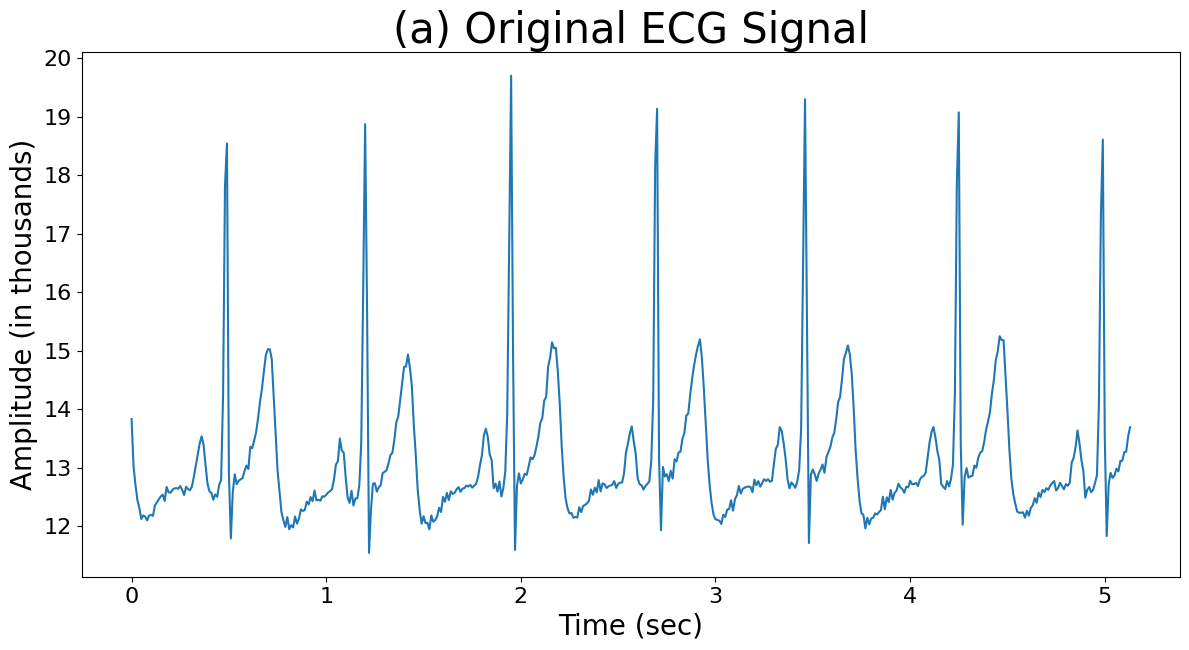

In [ ]:
# Create time values for the x-axis
t = np.arange(0, len(ecg_data)) / sampling_rate

font= 20
heading = 30

# Plot the original and filtered ECG signals
plt.figure(figsize=(12,12))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_data, label='Original ECG Signal')
print(len(ecg_data))
plt.title('(a) Original ECG Signal', fontsize=heading)
plt.xlabel('Time (sec)', fontsize=font)
plt.ylabel('Amplitude (in thousands)', fontsize=font)

plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

#plt.grid()
plt.tight_layout()
plt.show()

#Band Pass Filtering

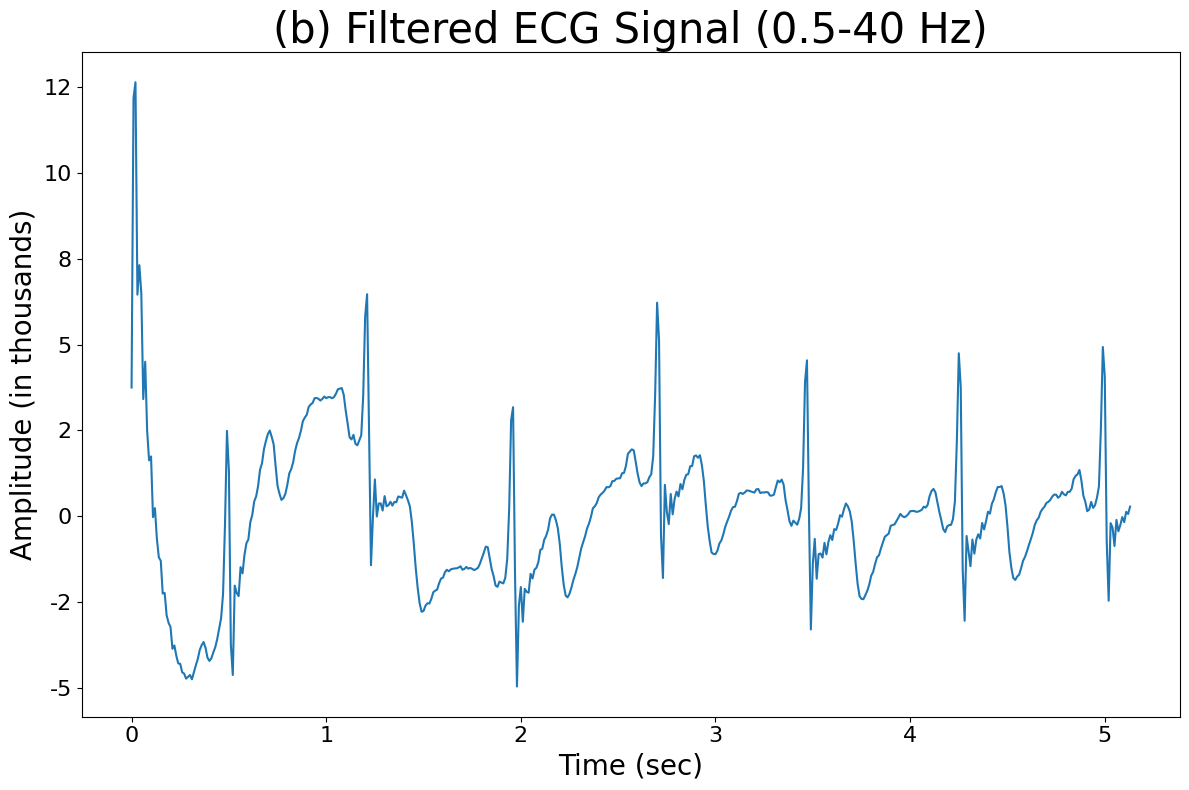

In [ ]:
ecg_filtered = bandpass_filter(ecg_data, 0.5, 40, fs =100)

#plt.subplot(2, 1, 2)
plt.figure(figsize=(12, 8))
plt.plot(t, ecg_filtered, label='Filtered ECG Signal')
plt.title('(b) Filtered ECG Signal (0.5-40 Hz)', fontsize=30)
plt.xlabel('Time (sec)', fontsize=20)
plt.ylabel('Amplitude (in thousands)', fontsize=20)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

#plt.grid()

plt.tight_layout()
plt.show()


#Notch Filtering for 50, 100, 150 Hz

In [ ]:
# Apply notch filters to remove specified frequencies
ecg_filtered = notch_filter(ecg_filtered, sampling_rate, notch_frequencies)

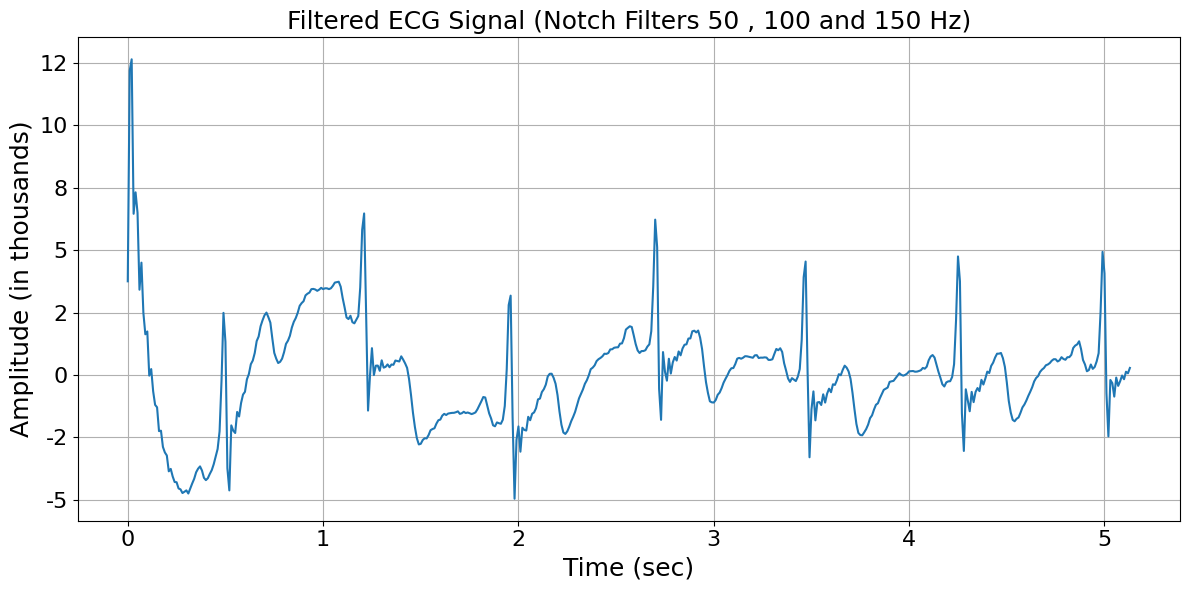

In [ ]:
#plt.subplot(2, 1, 2)
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_filtered, label='Filtered ECG Signal')
plt.title('Filtered ECG Signal (Notch Filters 50 , 100 and 150 Hz)', fontsize=18)
plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

#Diffrentiating Filtered ECG (Diffrentiator)

In [ ]:
# Calculate the derivative of the signal
ecg_derivative = np.diff(ecg_filtered)

In [ ]:
# Create time values for the x-axis
t = np.arange(0, len(ecg_filtered)) / sampling_rate  # Adjusted for the filtered signal

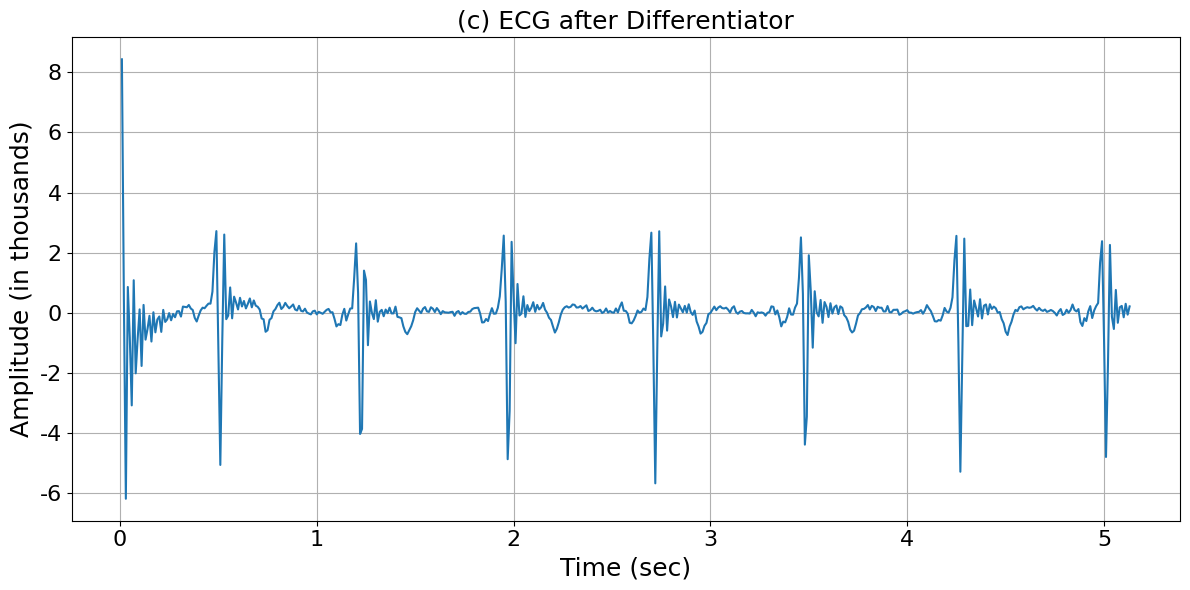

In [ ]:
# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[1:], ecg_derivative, label='Derivative of Filtered ECG Signal')
plt.title('(c) ECG after Differentiator', fontsize=18)
plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

#Squaring ECG

In [ ]:
# Square the derivative to emphasize high-frequency components
ecg_squared = ecg_derivative ** 2

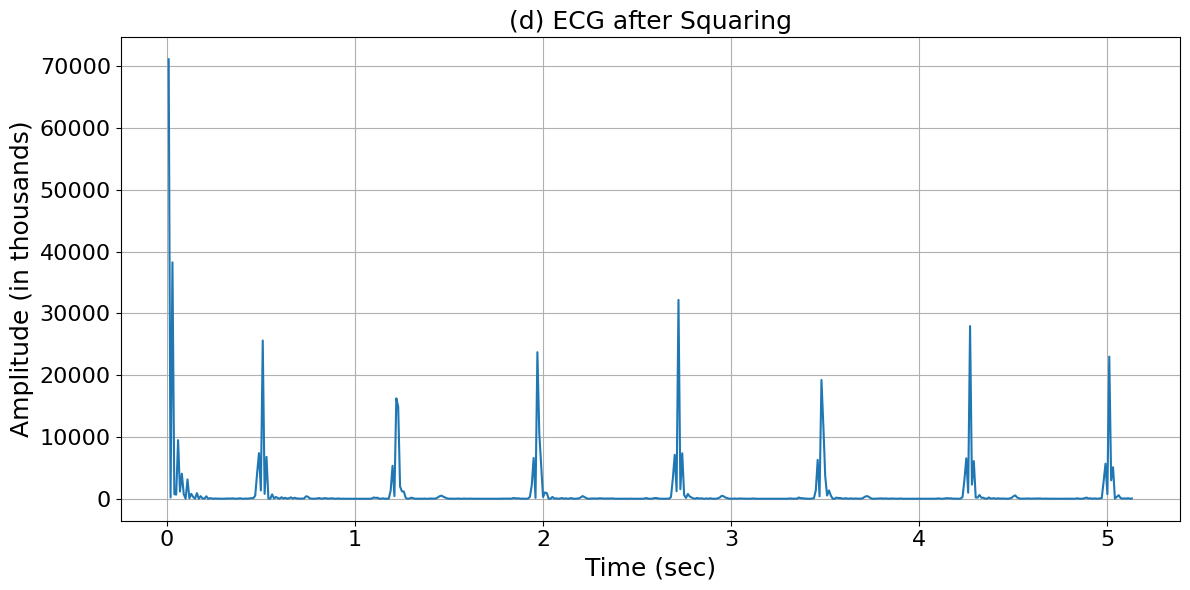

In [ ]:
# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[1:], ecg_squared, label='Squaring of Differentiated ECG Signal')
plt.title('(d) ECG after Squaring', fontsize=18)
plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

#Moving Average Filter

In [ ]:
# Apply a moving average filter to smooth the squared signal
window_size = 5  # Adjust the window size as needed
ecg_smoothed = np.convolve(ecg_squared, np.ones(window_size)/window_size, mode='same')

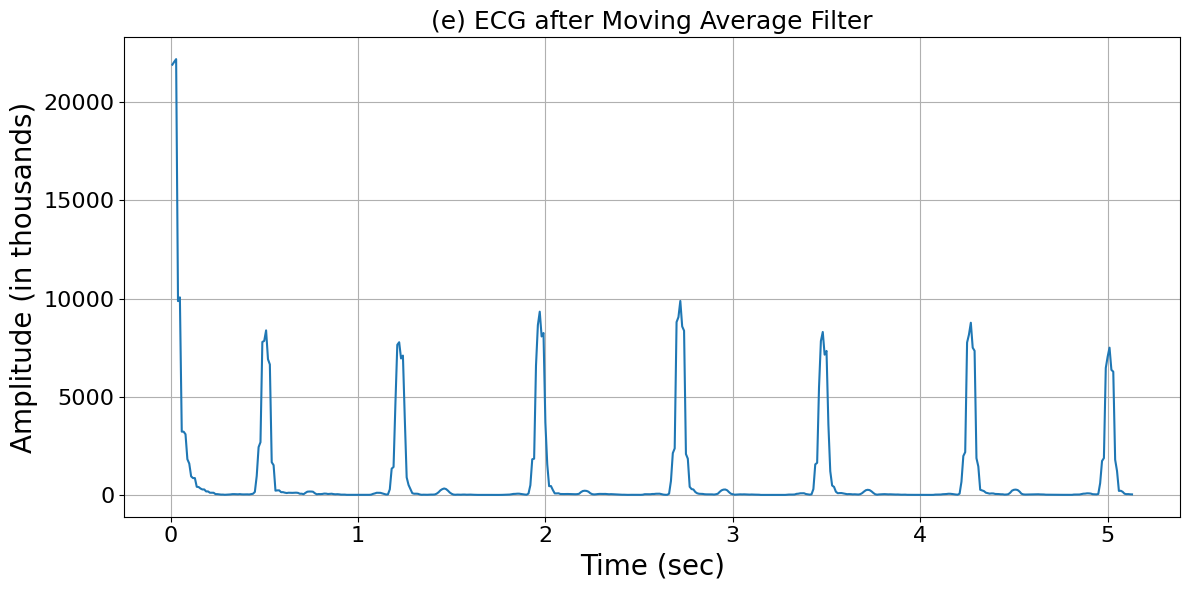

In [ ]:
# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[1:], ecg_smoothed, label='Smoothening of Differentiated ECG Signal')
plt.title('(e) ECG after Moving Average Filter', fontsize=18)
plt.xlabel('Time (sec)', fontsize=20)
plt.ylabel('Amplitude (in thousands)', fontsize=20)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

#Peak Detector

In [ ]:
# Find R-peaks using thresholding
#threshold = 0.4  # Adjust the threshold as needed

r_peaks, _ = find_peaks(ecg_smoothed,height =100000, distance=40)
#print(np.shape(r_peaks))
#print(_)
#r_peaks = r_peaks.tolist()
"""
R_peaks = []
for i in r_peaks:
  R_peaks.append(int(i))

R_peaks = np.array(R_peaks, dtype=int)
"""

'\nR_peaks = []\nfor i in r_peaks:\n  R_peaks.append(int(i))\n\nR_peaks = np.array(R_peaks, dtype=int)\n'

In [ ]:
t = np.arange(0, len(ecg_data)) / sampling_rate

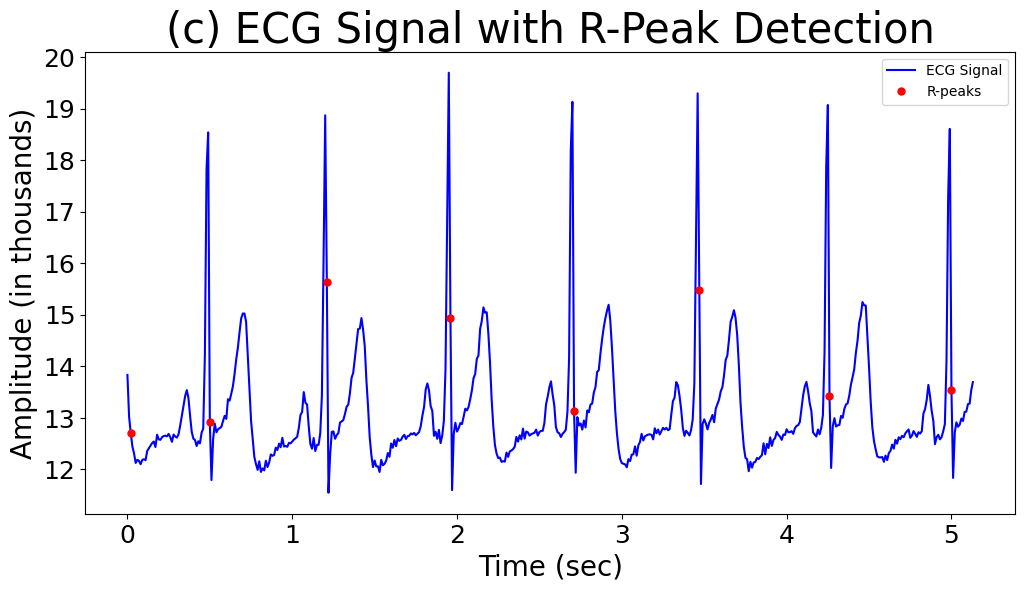

In [ ]:
r_peaks, _ = find_peaks(ecg_smoothed,height =100000, distance=38)

t = np.arange(0, len(ecg_data)) / sampling_rate
# Create an empty list to store R-peak values
R_peaks = []

# Iterate over the indices of the R-peaks and store their values
for i in r_peaks:
    R_peaks.append(ecg_data[i])

# Convert the list to a NumPy array
R_peaks = np.array(R_peaks)

# Plot the ECG signal and R-peaks
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_data, label='ECG Signal', color='blue')
plt.plot(r_peaks / sampling_rate, R_peaks, 'ro', label='R-peaks', markersize=5)

plt.xlabel('Time (sec)', fontsize=20)
plt.ylabel('Amplitude (in thousands)', fontsize=20)
plt.xticks(fontsize=18)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=18)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('(c) ECG Signal with R-Peak Detection',fontsize=30)
plt.legend()
#plt.grid()
plt.show()

#BPF for 360 sps

In [ ]:
sampling_rate = 360  # Sampling rate in Hz


# Filter the signal using a bandpass filter (0.5-40 Hz)
def bandpass_filter_360(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

##visuals

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter
import control as ctrl

# Filter parameters
lowcut = 0.5  # Low cutoff frequency in Hz
highcut = 40.0  # High cutoff frequency in Hz
order = 6  # Filter order

# Sampling rate
fs = 360.0  # Sampling rate in Hz

# Design the bandpass filter using scipy.signal
b, a = butter(order, [lowcut, highcut], btype='band', fs=fs)

# Convert the filter to a transfer function using control.TransferFunction
sys = ctrl.TransferFunction(b, a, dt=1/fs)

# Transfer function representation
print(f'Transfer function (Control): {sys}')

# Difference equation coefficients
numerator_coefficients = sys.num[0][0]
denominator_coefficients = sys.den[0][0]
print(f'Difference equation coefficients (Numerator): {numerator_coefficients}')
print(f'Difference equation coefficients (Denominator): {denominator_coefficients}')


Transfer function (Control): 
                    0.0005462 z^12 - 0.003277 z^10 + 0.008193 z^8 - 0.01092 z^6 + 0.008193 z^4 - 0.003277 z^2 + 0.0005462
----------------------------------------------------------------------------------------------------------------------------------------------
z^12 - 9.316 z^11 + 39.87 z^10 - 103.8 z^9 + 183.1 z^8 - 231 z^7 + 213.6 z^6 - 146 z^5 + 73.2 z^4 - 26.26 z^3 + 6.396 z^2 - 0.9498 z + 0.06502

dt = 0.002777777777777778

Difference equation coefficients (Numerator): [ 0.00054621  0.         -0.00327724  0.          0.00819311  0.
 -0.01092414  0.          0.00819311  0.         -0.00327724  0.
  0.00054621]
Difference equation coefficients (Denominator): [ 1.00000000e+00 -9.31586211e+00  3.98706708e+01 -1.03776284e+02
  1.83125893e+02 -2.30970671e+02  2.13611324e+02 -1.46001366e+02
  7.32034532e+01 -2.62584965e+01  6.39613419e+00 -9.49815457e-01
  6.50205873e-02]


#notch_360_filter_50

In [ ]:
from scipy.signal import butter, lfilter, iirnotch

sampling_rate = 360  # Sampling rate in Hz
notch_frequency = 50.0  # Frequency to be removed in Hz

# Filter the signal using a notch filter at 50 Hz
def notch_360_filter_50(data, fs, Q=30):
    nyquist = 0.5 * fs
    notch_frequency = 50.0  # Frequency to be removed in Hz
    notch_freq = notch_frequency / nyquist
    b, a = iirnotch(notch_freq, Q)
    y = lfilter(b, a, data)
    return y

# Example usage:
# filtered_data = notch_filter(your_data, sampling_rate)


##Visuals for notch_360_filter_50

In [ ]:
import numpy as np
from scipy.signal import iirnotch
import control as ctrl

# Notch filter parameters
notch_frequency = 50.0  # Notch frequency in Hz
Q = 30  # Quality factor
fs = 360.0  # Sampling rate in Hz

# Design the notch filter using scipy.signal
b, a = iirnotch(notch_frequency / (0.5 * fs), Q)

# Convert the filter to a transfer function using control.TransferFunction
sys = ctrl.TransferFunction(b, a, dt=1/fs)

# Transfer function representation
print(f'Transfer function (Control): {sys}')

# Difference equation coefficients
numerator_coefficients = sys.num[0][0]
denominator_coefficients = sys.den[0][0]
print(f'Difference equation coefficients (Numerator): {numerator_coefficients}')
print(f'Difference equation coefficients (Denominator): {denominator_coefficients}')


Transfer function (Control): 
0.9857 z^2 - 1.267 z + 0.9857
-----------------------------
   z^2 - 1.267 z + 0.9713

dt = 0.002777777777777778

Difference equation coefficients (Numerator): [ 0.9856631  -1.26714406  0.9856631 ]
Difference equation coefficients (Denominator): [ 1.         -1.26714406  0.9713262 ]


#notch_360_filter_100

In [ ]:
# Filter the signal using a notch filter at 50 Hz
def notch_360_filter_100(data, fs, Q=30):
    nyquist = 0.5 * fs
    notch_frequency = 100.0  # Frequency to be removed in Hz
    notch_freq = notch_frequency / nyquist
    b, a = iirnotch(notch_freq, Q)
    y = lfilter(b, a, data)
    return y

##visuals notch_360_filter_100





In [ ]:
import numpy as np
from scipy.signal import iirnotch
import control as ctrl

# Notch filter parameters
notch_frequency = 100.0  # Notch frequency in Hz
Q = 30  # Quality factor
fs = 360.0  # Sampling rate in Hz

# Design the notch filter using scipy.signal
b, a = iirnotch(notch_frequency / (0.5 * fs), Q)

# Convert the filter to a transfer function using control.TransferFunction
sys = ctrl.TransferFunction(b, a, dt=1/fs)

# Transfer function representation
print(f'Transfer function (Control): {sys}')

# Difference equation coefficients
numerator_coefficients = sys.num[0][0]
denominator_coefficients = sys.den[0][0]
print(f'Difference equation coefficients (Numerator): {numerator_coefficients}')
print(f'Difference equation coefficients (Denominator): {denominator_coefficients}')

Transfer function (Control): 
0.9717 z^2 + 0.3375 z + 0.9717
------------------------------
   z^2 + 0.3375 z + 0.9435

dt = 0.002777777777777778

Difference equation coefficients (Numerator): [0.97172567 0.33747678 0.97172567]
Difference equation coefficients (Denominator): [1.         0.33747678 0.94345134]


#notch_360_filter_150

In [ ]:
# Filter the signal using a notch filter at 50 Hz
def notch_360_filter_150(data, fs, Q=30):
    nyquist = 0.5 * fs
    notch_frequency = 150.0  # Frequency to be removed in Hz
    notch_freq = notch_frequency / nyquist
    b, a = iirnotch(notch_freq, Q)
    y = lfilter(b, a, data)
    return y

##visuals notch_360_filter_150

In [ ]:
import numpy as np
from scipy.signal import iirnotch
import control as ctrl

# Notch filter parameters
notch_frequency = 150.0  # Notch frequency in Hz
Q = 30  # Quality factor
fs = 360.0  # Sampling rate in Hz

# Design the notch filter using scipy.signal
b, a = iirnotch(notch_frequency / (0.5 * fs), Q)

# Convert the filter to a transfer function using control.TransferFunction
sys = ctrl.TransferFunction(b, a, dt=1/fs)

# Transfer function representation
print(f'Transfer function (Control): {sys}')

# Difference equation coefficients
numerator_coefficients = sys.num[0][0]
denominator_coefficients = sys.den[0][0]
print(f'Difference equation coefficients (Numerator): {numerator_coefficients}')
print(f'Difference equation coefficients (Denominator): {denominator_coefficients}')

Transfer function (Control): 
0.9582 z^2 + 1.66 z + 0.9582
----------------------------
   z^2 + 1.66 z + 0.9163

dt = 0.002777777777777778

Difference equation coefficients (Numerator): [0.95816559 1.65959148 0.95816559]
Difference equation coefficients (Denominator): [1.         1.65959148 0.91633117]


##Visuals for Notch Filters

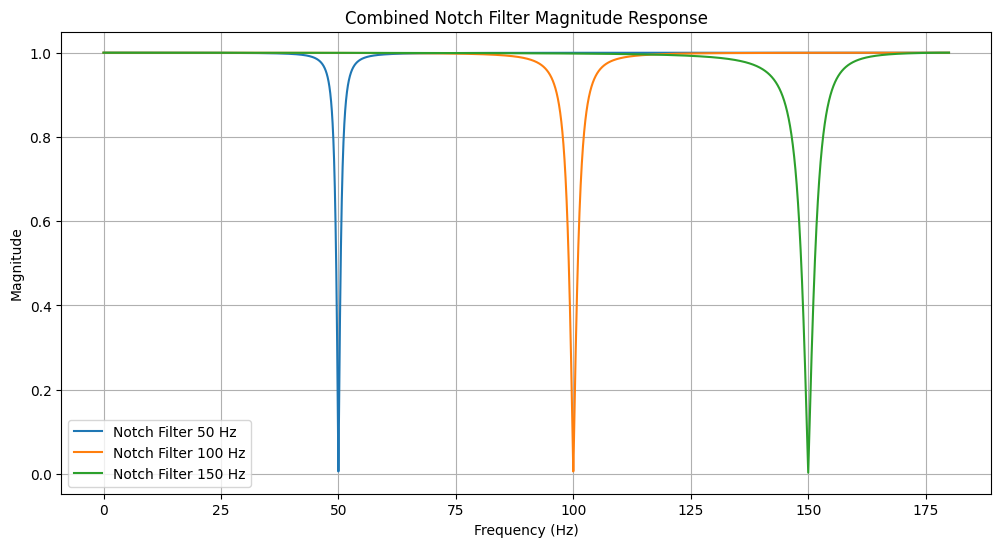

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Function to plot magnitude and phase responses
def plot_responses(b, a, label):
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5 * sampling_rate * w / np.pi, np.abs(h), label=label)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Combined Notch Filter Magnitude Response')
    plt.legend()

# Initialize the figure
plt.figure(figsize=(12, 6))

# Apply the notch filters to get the coefficients
b1, a1 = iirnotch(50.0 / (0.5 * sampling_rate), 30)
b2, a2 = iirnotch(100.0 / (0.5 * sampling_rate), 30)
b3, a3 = iirnotch(150.0 / (0.5 * sampling_rate), 30)

# Plot magnitude responses
plot_responses(b1, a1, 'Notch Filter 50 Hz')
plot_responses(b2, a2, 'Notch Filter 100 Hz')
plot_responses(b3, a3, 'Notch Filter 150 Hz')

plt.grid()
plt.show()


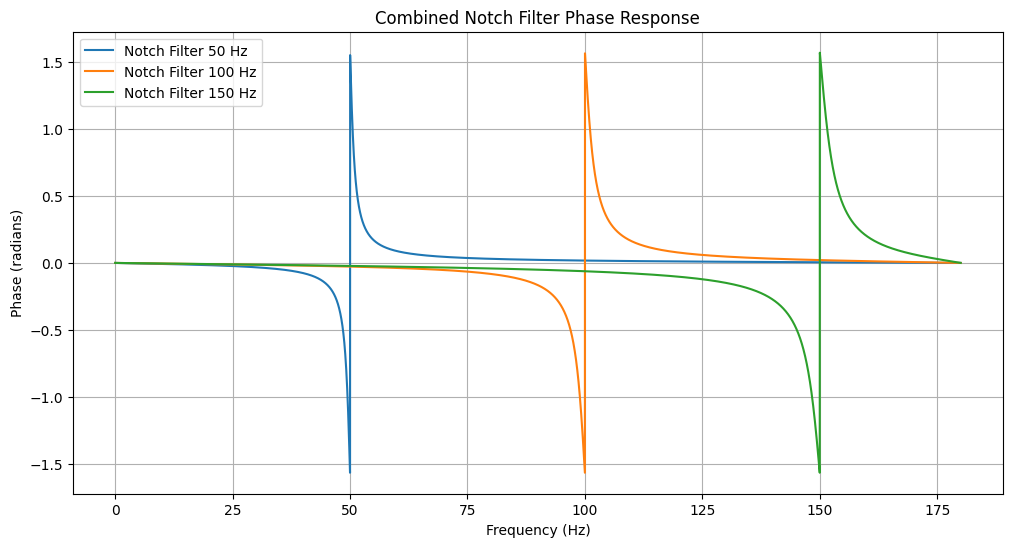

In [ ]:
# Function to plot phase responses
def plot_phase_responses(b, a, label):
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5 * sampling_rate * w / np.pi, np.angle(h), label=label)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.title('Combined Notch Filter Phase Response')
    plt.legend()

# Initialize the figure for the phase plot
plt.figure(figsize=(12, 6))

# Plot phase responses
plot_phase_responses(b1, a1, 'Notch Filter 50 Hz')
plot_phase_responses(b2, a2, 'Notch Filter 100 Hz')
plot_phase_responses(b3, a3, 'Notch Filter 150 Hz')

plt.grid()
plt.show()


#Interpolation

Please Enter How Many Seconds of data this is:5


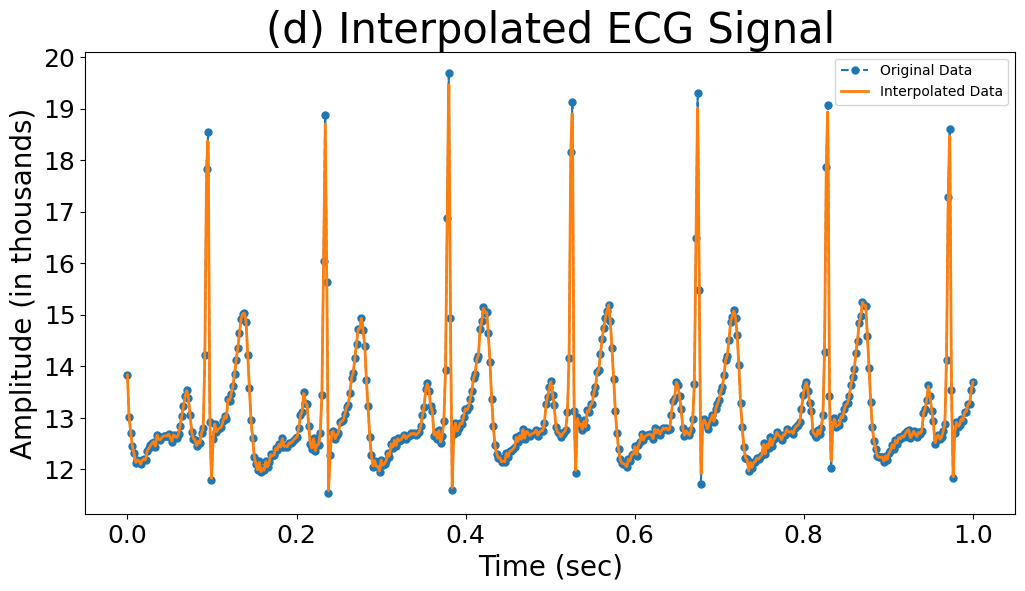

In [ ]:
# Original signal length and desired length
original_length = len(ecg_data)
desired_length = int(input("Please Enter How Many Seconds of data this is:")) * 360

# Create a linear interpolation function
x_original = np.linspace(0, 1, original_length)
x_desired = np.linspace(0, 1, desired_length)
interp_func = interp1d(x_original, ecg_data, kind='linear')

# Interpolate the data to the desired length
interpolated_ecg_data = interp_func(x_desired)

# Plot the original and interpolated ECG data
plt.figure(figsize=(12, 6))
plt.plot(x_original, ecg_data, label='Original Data', linestyle='--', marker='o', markersize=5)
plt.plot(x_desired, interpolated_ecg_data, label='Interpolated Data', linewidth=2)
plt.title('(d) Interpolated ECG Signal', fontsize=30)

plt.xlabel('Time (sec)', fontsize=20)
plt.ylabel('Amplitude (in thousands)', fontsize=20)
plt.xticks(fontsize=18)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=18)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
#plt.grid()
plt.show()

In [ ]:
print(len(interpolated_ecg_data))

1800


In [ ]:
ecg_data = interpolated_ecg_data

##BPF on interpolated ECG

In [ ]:
ecg_filtered = bandpass_filter_360(ecg_data, 0.5, 40, sampling_rate)

In [ ]:
# Create time values for the x-axis
t = np.arange(0, len(ecg_data)) / sampling_rate

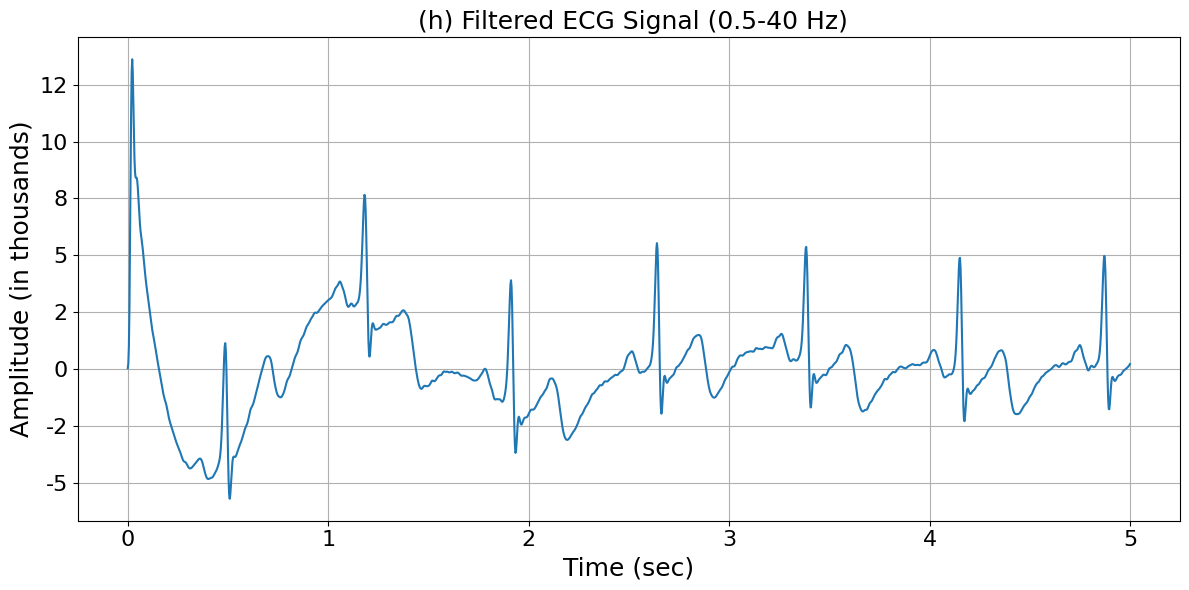

In [ ]:
#plt.subplot(2, 1, 2)
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_filtered, label='Filtered ECG Signal')
plt.title(' (h) Filtered ECG Signal (0.5-40 Hz)', fontsize=18)

plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

## Notch filters on interpolated ECG

In [ ]:
ecg_filtered = notch_360_filter_50(ecg_data, sampling_rate)
ecg_filtered = notch_360_filter_100(ecg_filtered, sampling_rate)
ecg_filtered = notch_360_filter_150(ecg_filtered, sampling_rate)

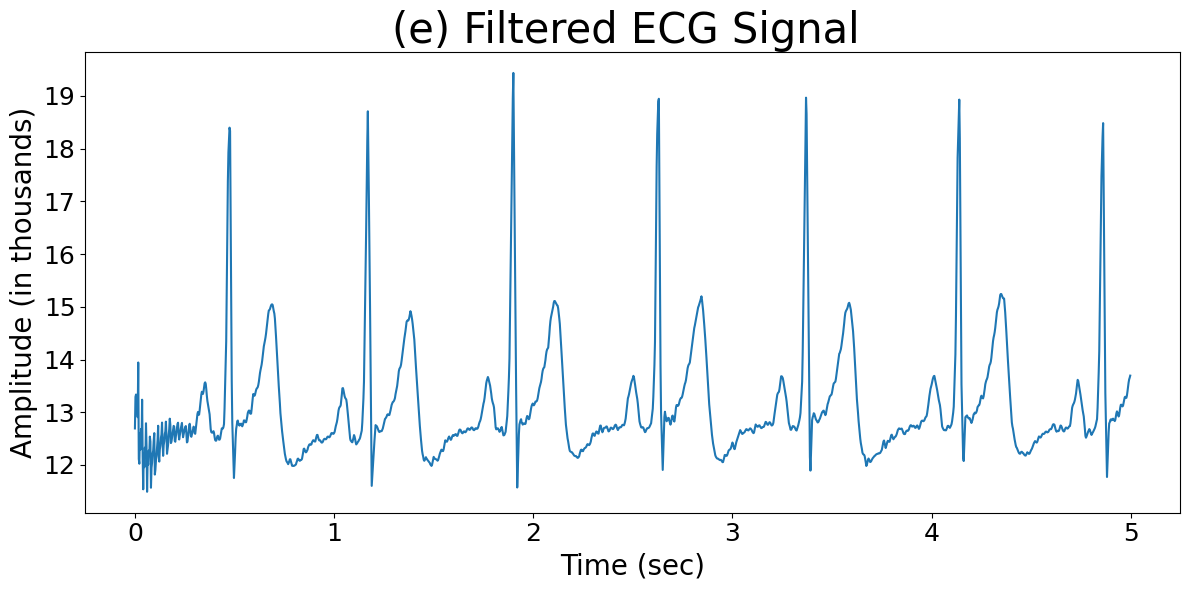

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_filtered, label='Filtered ECG Signal')
plt.title('(e) Filtered ECG Signal ', fontsize=30)

plt.xlabel('Time (sec)', fontsize=20)
plt.ylabel('Amplitude (in thousands)', fontsize=20)
plt.xticks(fontsize=18)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=18)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
#plt.grid()

plt.tight_layout()
plt.show()

## Differentiating ECG Signal

In [ ]:
ecg_derivative = np.diff(ecg_filtered)

In [ ]:
# Create time values for the x-axis
t = np.arange(0, len(ecg_derivative)) / sampling_rate  # Adjusted for the filtered signal

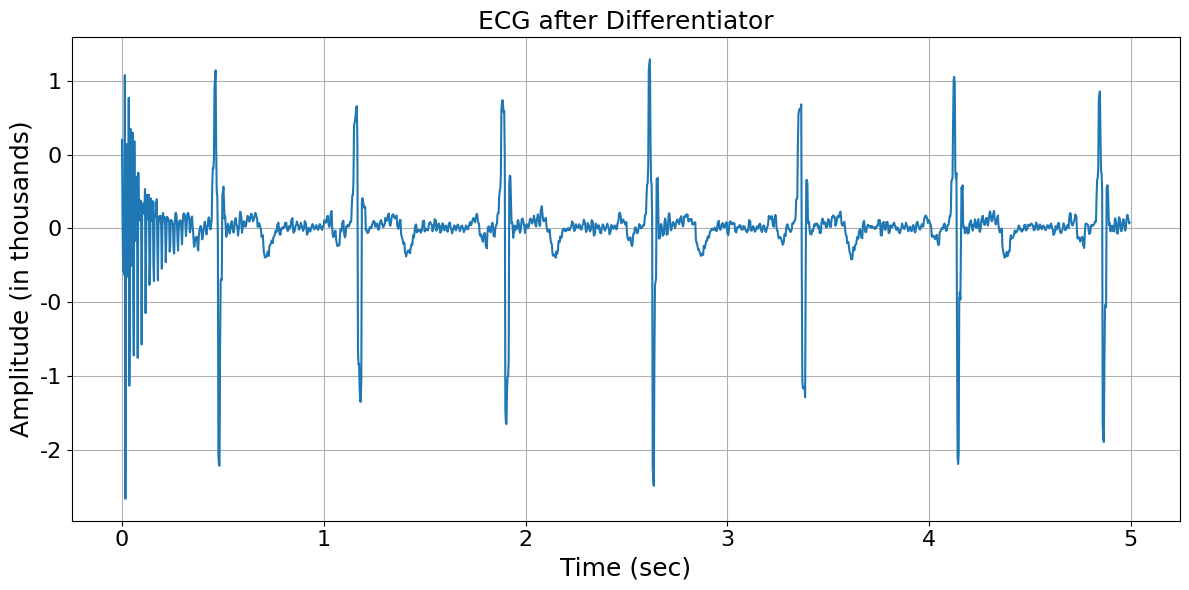

In [ ]:
# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[0:], ecg_derivative, label='Derivative of Filtered ECG Signal')
plt.title('ECG after Differentiator', fontsize=18)

plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

##Squaring ECG

In [ ]:
# Square the derivative to emphasize high-frequency components
ecg_squared = ecg_derivative ** 2


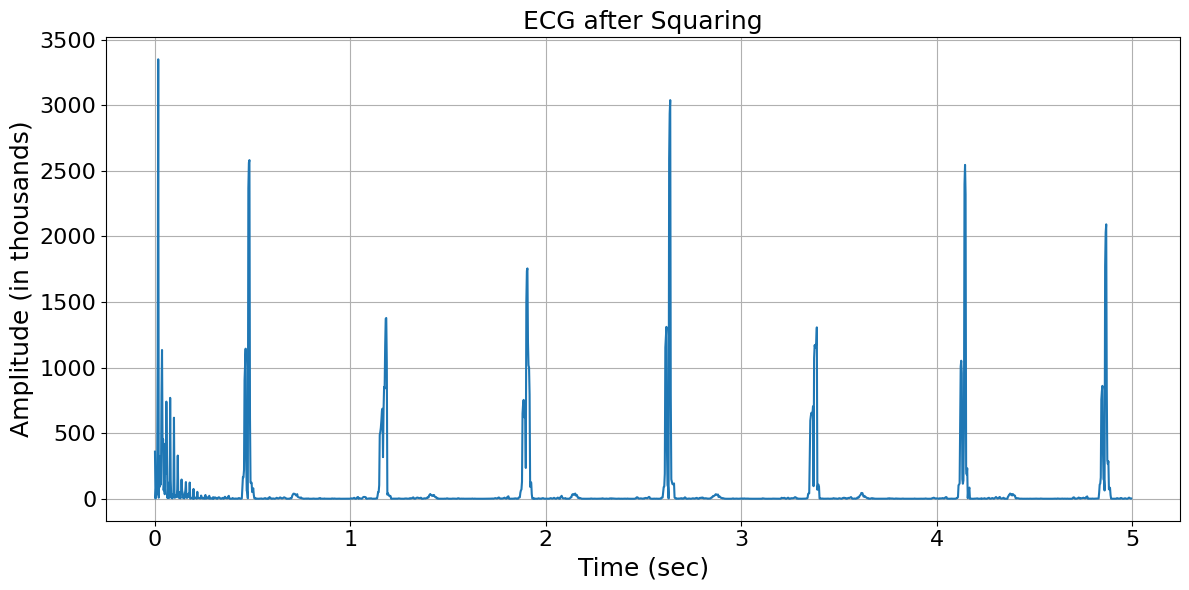

In [ ]:
# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[0:], ecg_squared, label='Squaring of Differentiated ECG Signal')
plt.title('ECG after Squaring', fontsize=18)

plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

## Moving Average Filter

In [ ]:
# Apply a moving average filter to smooth the squared signal
window_size = 5  # Adjust the window size as needed
ecg_smoothed = np.convolve(ecg_squared, np.ones(window_size)/window_size, mode='same')

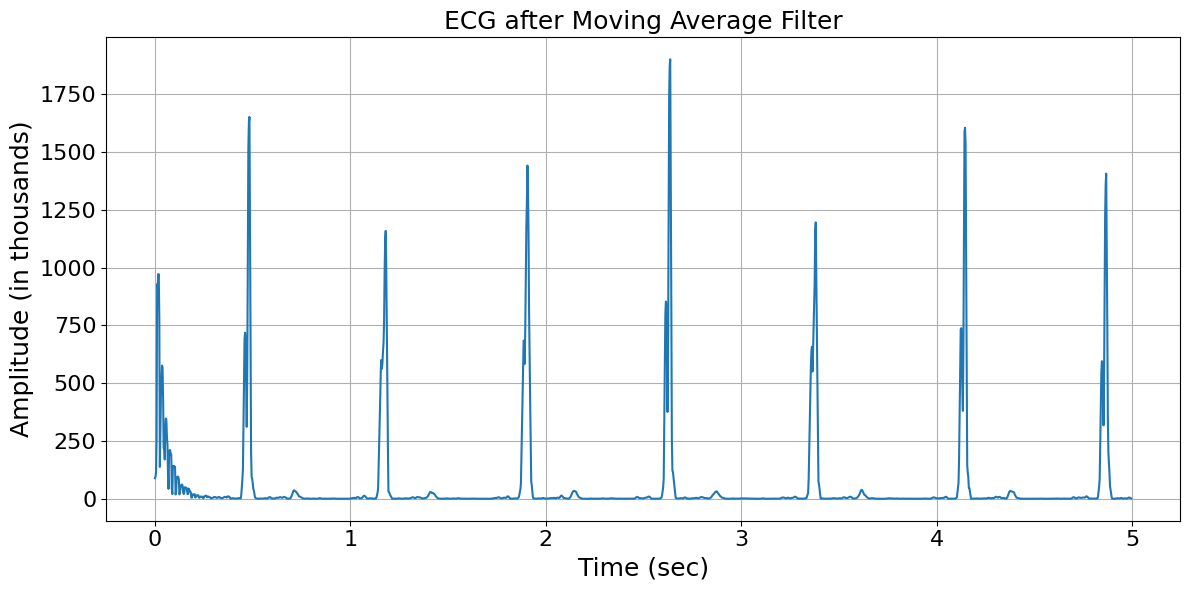

In [ ]:
# Plot the derivative of the filtered ECG signal
plt.figure(figsize=(12, 6))
plt.plot(t[0:len(ecg_smoothed)], ecg_smoothed, label='Smoothening of Differentiated ECG Signal')
plt.title('ECG after Moving Average Filter', fontsize=18)

plt.xlabel('Time (sec)', fontsize=18)
plt.ylabel('Amplitude (in thousands)', fontsize=18)
plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()

plt.tight_layout()
plt.show()

##Interpolated R-Peaks


In [ ]:
# Find R-peaks using thresholding
#threshold = 0.4  # Adjust the threshold as needed

r_peaks, _ = find_peaks(ecg_smoothed,height =100000 , distance = 100) #distance = 40 on NSR
print(r_peaks)

[   6  174  425  686  949 1217 1492 1752]


In [ ]:
t = np.arange(0, len(ecg_data)) / sampling_rate

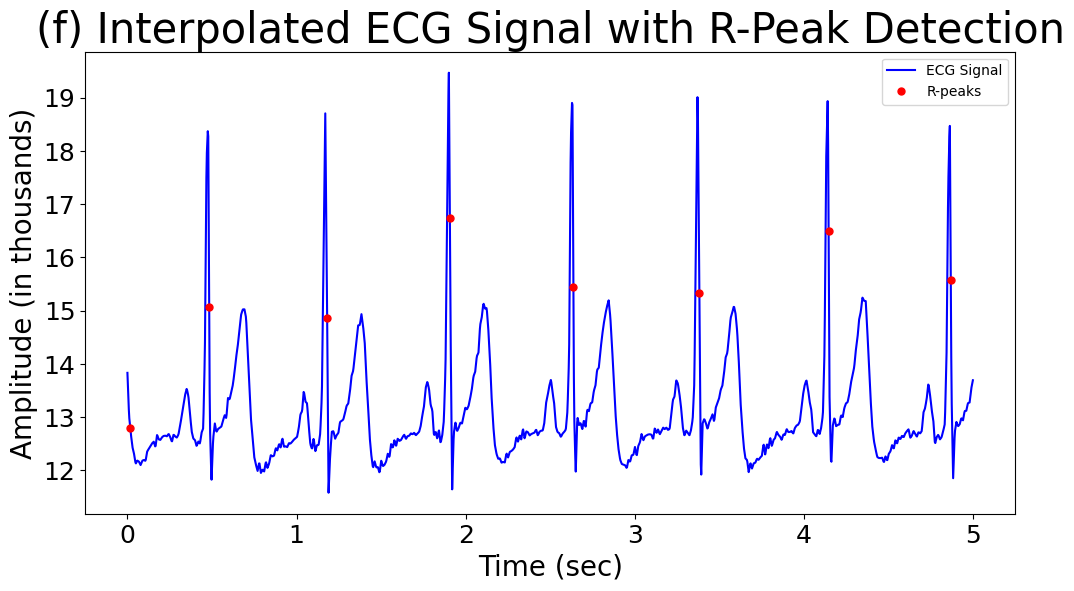

In [ ]:
# Create an empty list to store R-peak values
R_peaks = []

# Iterate over the indices of the R-peaks and store their values
for i in r_peaks:
    R_peaks.append(ecg_data[i])

# Convert the list to a NumPy array
R_peaks = np.array(R_peaks)

# Plot the ECG signal and R-peaks
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_data, label='ECG Signal', color='blue')
plt.plot(r_peaks / sampling_rate, R_peaks, 'ro', label='R-peaks', markersize=5)


plt.xlabel('Time (sec)', fontsize=20)
plt.ylabel('Amplitude (in thousands)', fontsize=20)
plt.xticks(fontsize=18)  # Set x-axis tick label font size to 12
plt.yticks(fontsize=18)  # Set y-axis tick label font size to 12

formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('(f) Interpolated ECG Signal with R-Peak Detection', fontsize=30)
plt.legend()
#plt.grid()
plt.show()

#Segmenting Interpolated Signal (Centered Around R-Peaks Detected)

In [ ]:

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty 2D NumPy array to store the segmented signals
segmented_signals = np.empty((len(r_peaks) - 1, segment_length))

# Define a function to pad segments with zeros to achieve the desired length
def pad_segment(segment, desired_length):
    pad_length = desired_length - len(segment)
    if pad_length % 2 == 0:
        left_pad = right_pad = pad_length // 2
    else:
        left_pad = pad_length // 2
        right_pad = pad_length // 2 + 1
    padded_segment = np.pad(segment, (left_pad, right_pad), mode='constant')
    return padded_segment

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    center_index = r_peaks[i]
    start_index = center_index - segment_length // 2
    if start_index < 0:
        start_index = 0
    end_index = center_index + segment_length // 2
    if end_index > (len(ecg_data) - 1):
        end_index = len(ecg_data) - 1

    segment = ecg_data[start_index:end_index]

    # Pad the segment if it's shorter than the desired length
    if len(segment) < segment_length:
        segment = pad_segment(segment, segment_length)

    segmented_signals[i - 1] = segment

# Count how many segments are missing and print the result
missing_segments = np.sum(np.isnan(segmented_signals).any(axis=1))
print(f"Number of missing segments: {missing_segments}")

print(len(segmented_signals))


Number of missing segments: 0
7


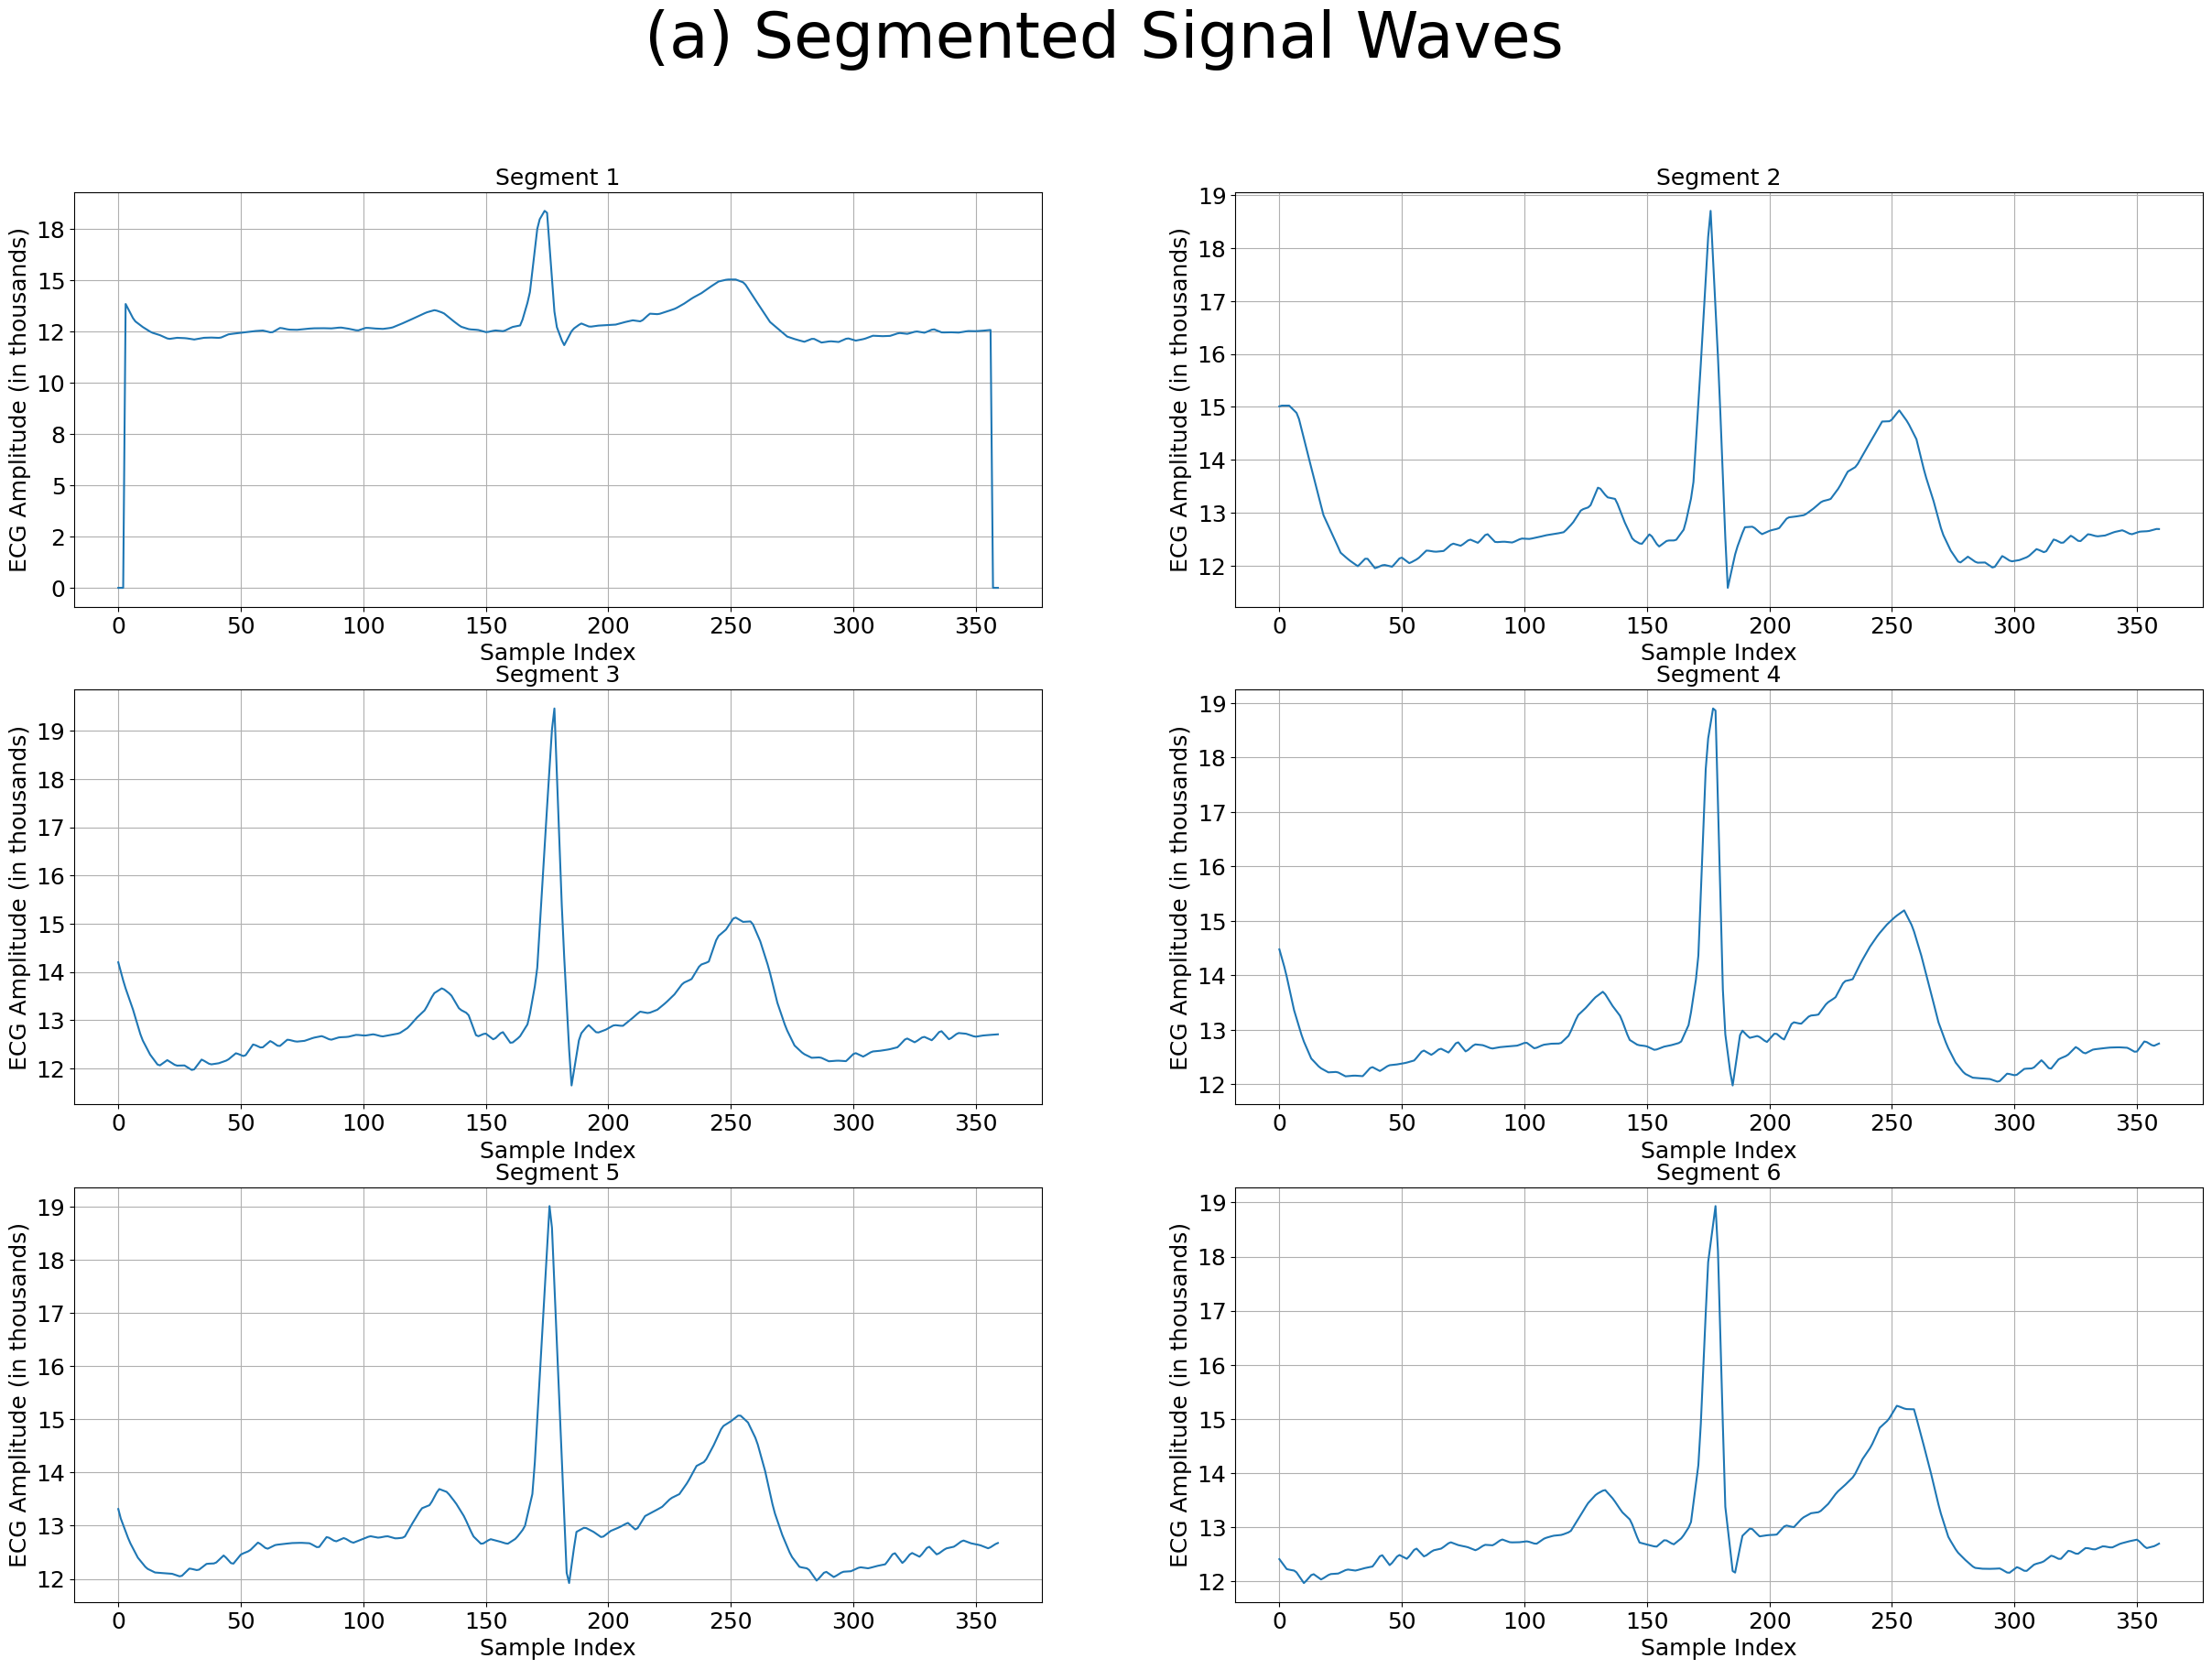

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming segmented_signals is defined elsewhere in your code

fig, axes = plt.subplots(3, 2, figsize=(30, 20))

size = 18
axes = axes.flatten()

# Plotting each subplot
for i in range(len(axes)):
    axes[i].plot(segmented_signals[i])
    axes[i].set_title(f"Segment {i+1}", fontsize=size)
    axes[i].set_xlabel("Sample Index", fontsize=size)
    axes[i].set_ylabel("ECG Amplitude (in thousands)", fontsize=size)

    # Define the formatter to display y-axis values in thousands
    formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
    # Apply the formatter to the y-axis of the subplot
    axes[i].yaxis.set_major_formatter(formatter)

    # Set the font size of x and y tick labels
    axes[i].tick_params(axis='x', labelsize=size)
    axes[i].tick_params(axis='y', labelsize=size)

    axes[i].grid(True)

# Adding a main title to the figure
fig.suptitle('(a) Segmented Signal Waves', fontsize=50)

plt.show()


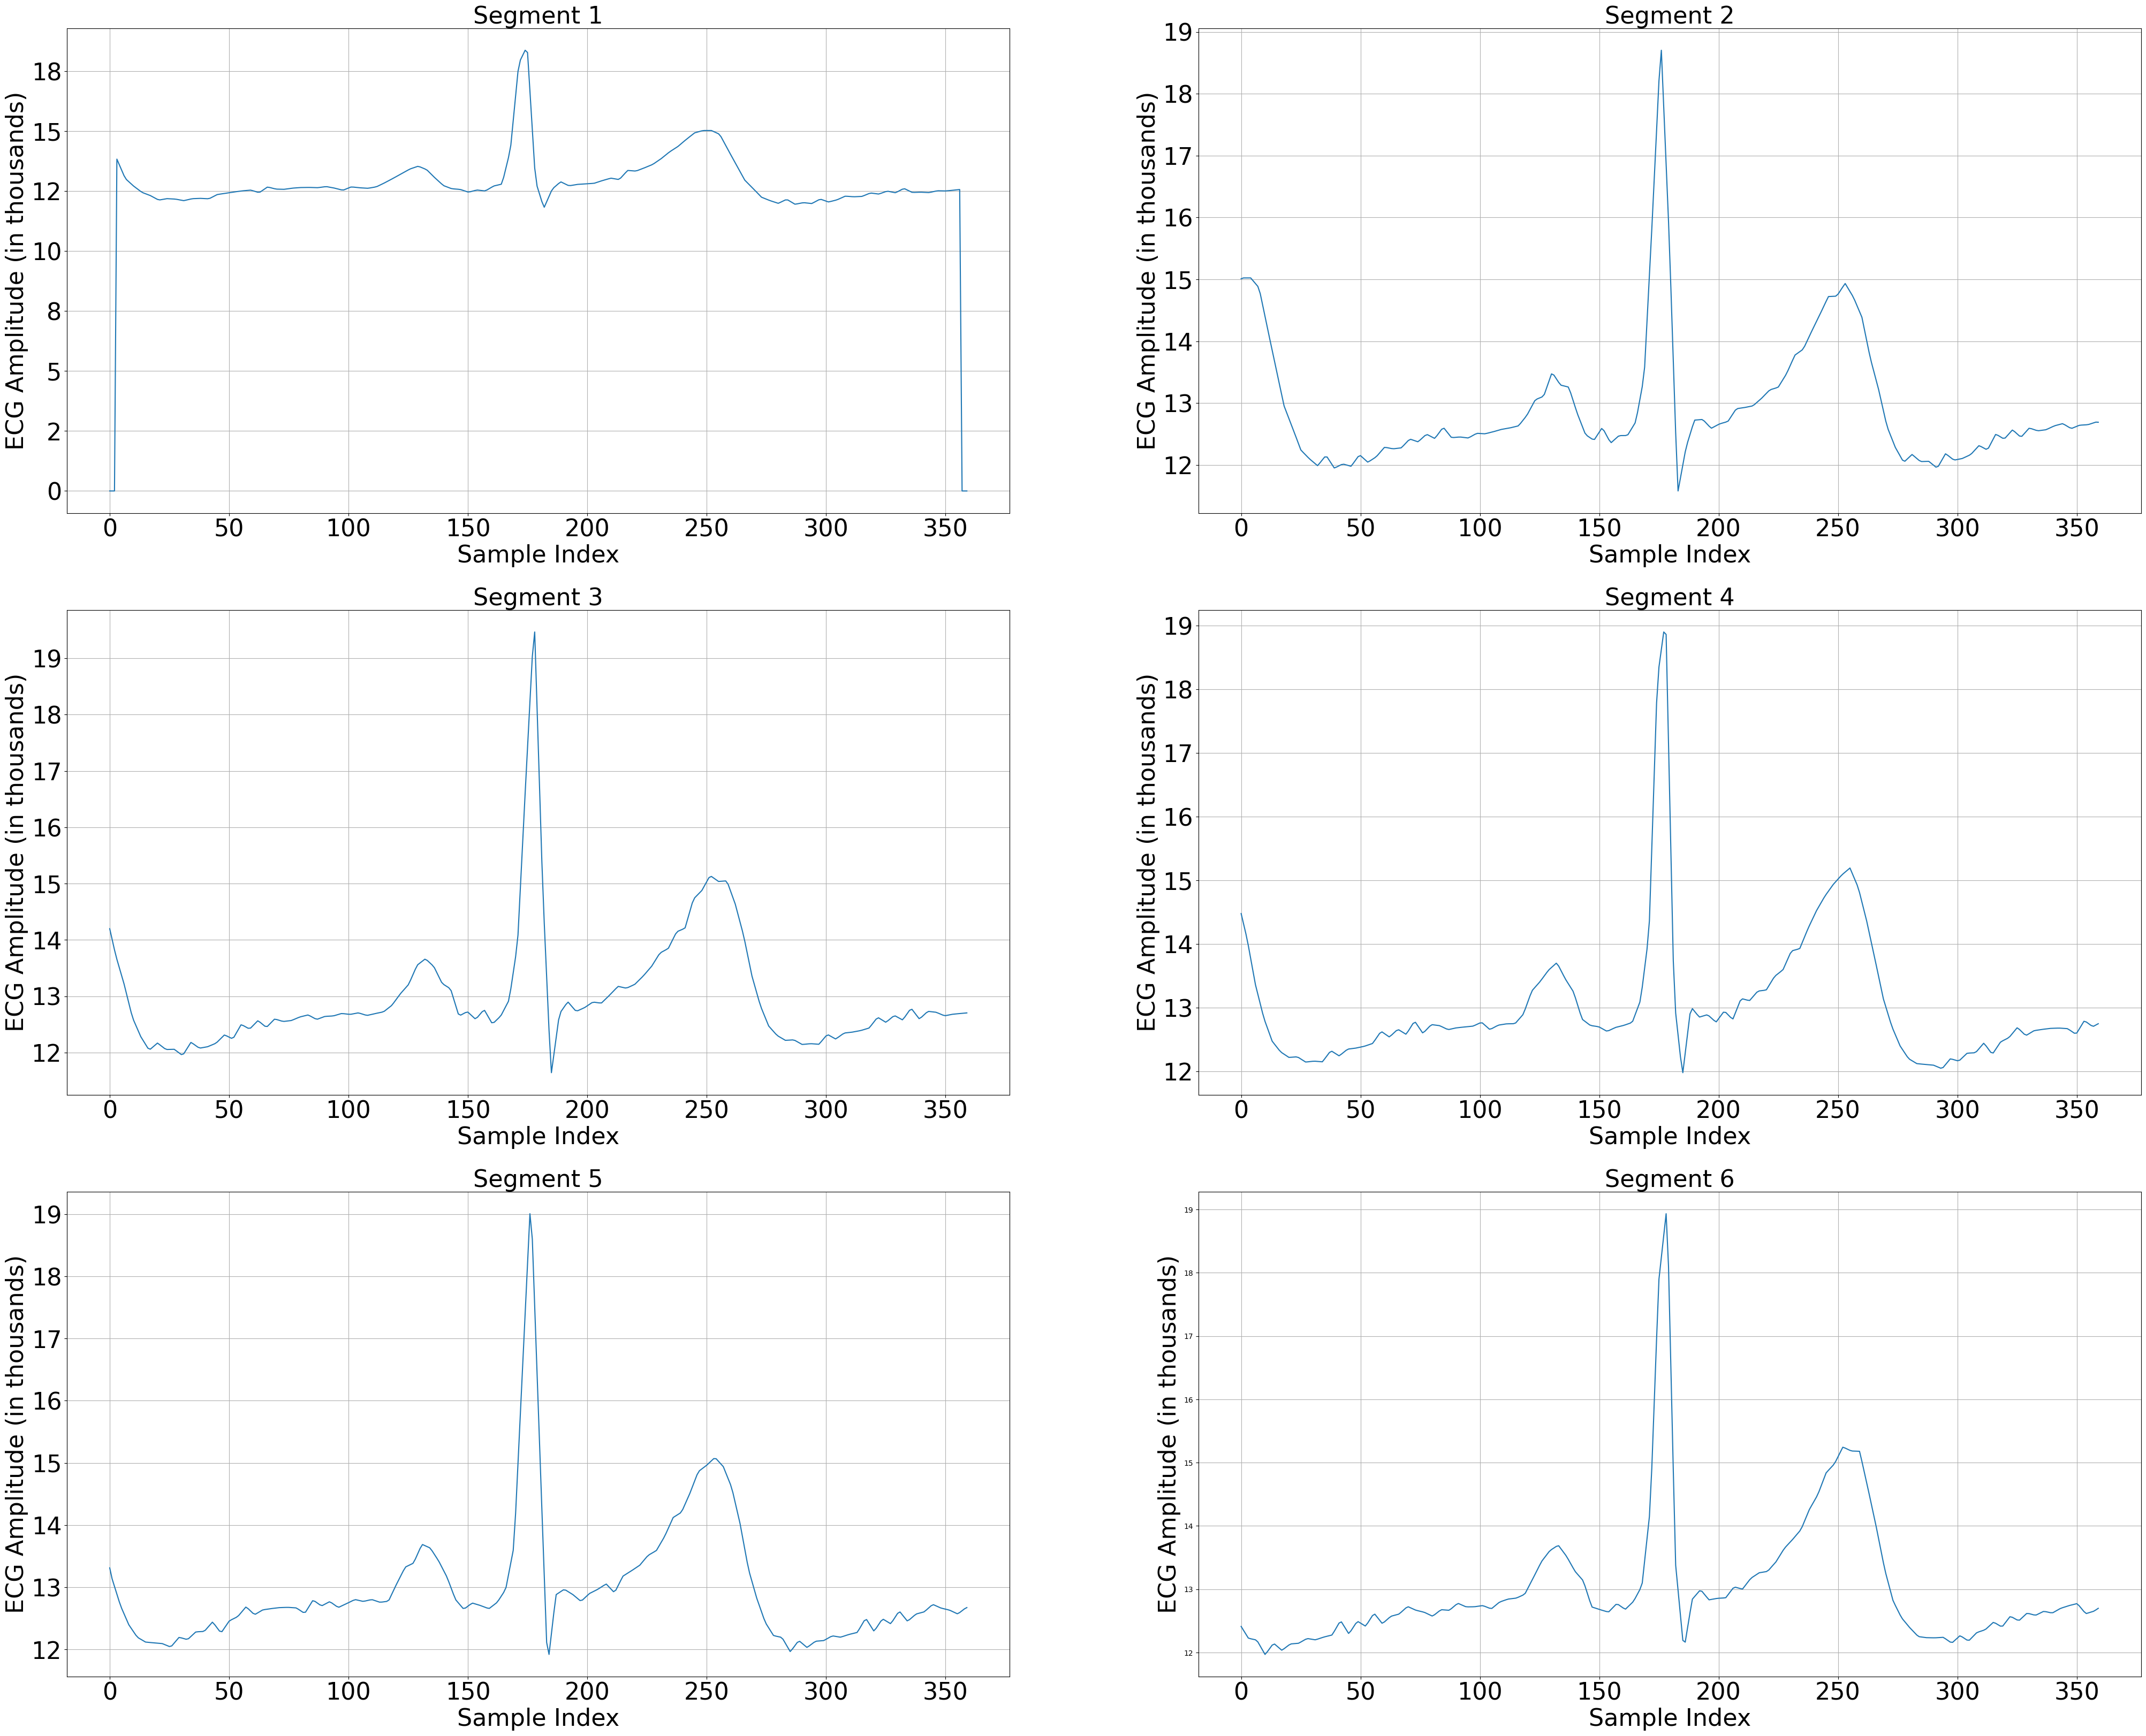

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(50, 40))

size = 32
axes = axes.flatten()
axes[0].plot(segmented_signals[0])
axes[0].set_title(f"Segment {1}",fontsize=size)
axes[0].set_xlabel("Sample Index",fontsize=size)
axes[0].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[0].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[0].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[0].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[0].grid(True)

axes[1].plot(segmented_signals[1])
axes[1].set_title(f"Segment {2}",fontsize=size)
axes[1].set_xlabel("Sample Index",fontsize=size)
axes[1].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[1].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[1].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[1].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[1].grid(True)

axes[2].plot(segmented_signals[2])
axes[2].set_title(f"Segment {3}",fontsize=size)
axes[2].set_xlabel("Sample Index",fontsize=size)
axes[2].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[2].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[2].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[2].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[2].grid(True)

axes[3].plot(segmented_signals[3])
axes[3].set_title(f"Segment {4}",fontsize=size)
axes[3].set_xlabel("Sample Index",fontsize=size)
axes[3].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[3].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[3].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[3].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[3].grid(True)

axes[4].plot(segmented_signals[4])
axes[4].set_title(f"Segment {5}",fontsize=size)
axes[4].set_xlabel("Sample Index",fontsize=size)
axes[4].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[4].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[4].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[4].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[4].grid(True)

axes[5].plot(segmented_signals[5])
axes[5].set_title(f"Segment {6}",fontsize=size)
axes[5].set_xlabel("Sample Index",fontsize=size)
axes[5].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[5].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[5].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[1].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[5].grid(True)



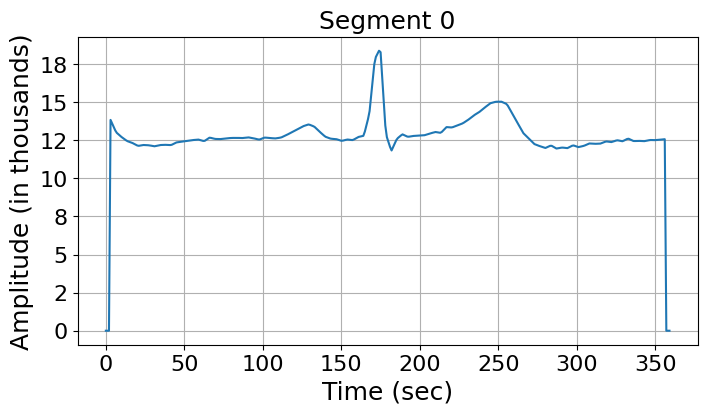

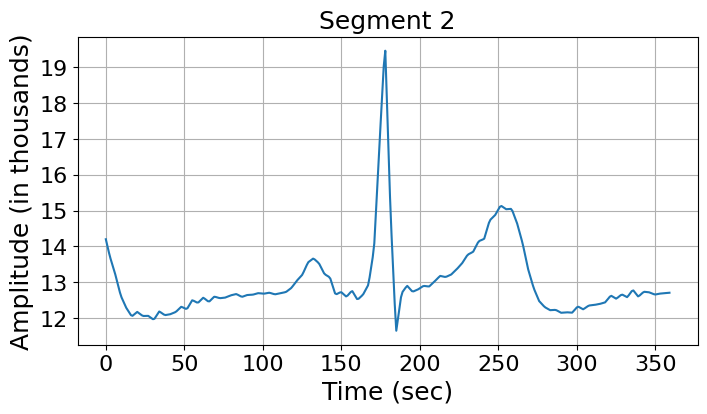

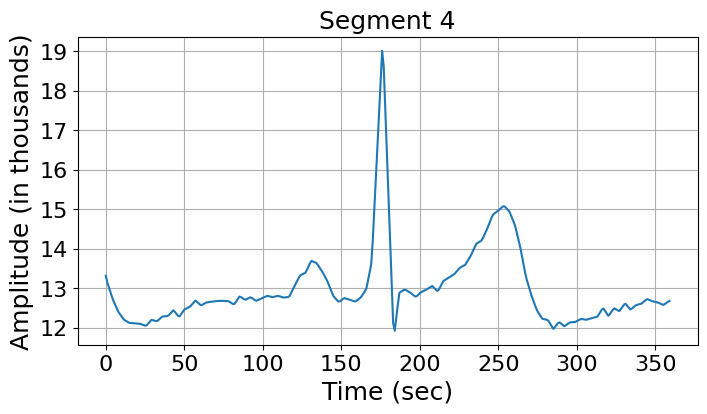

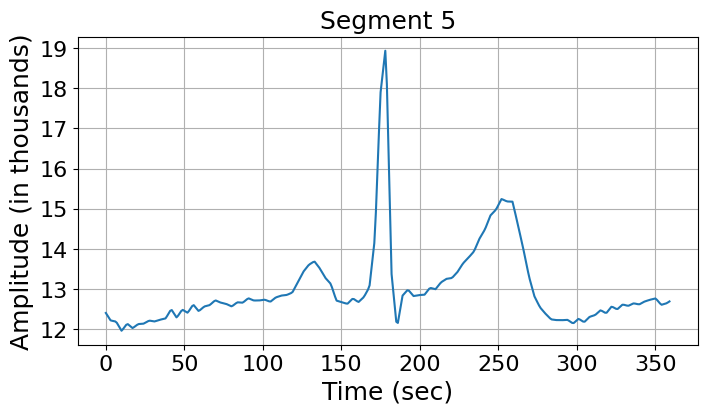

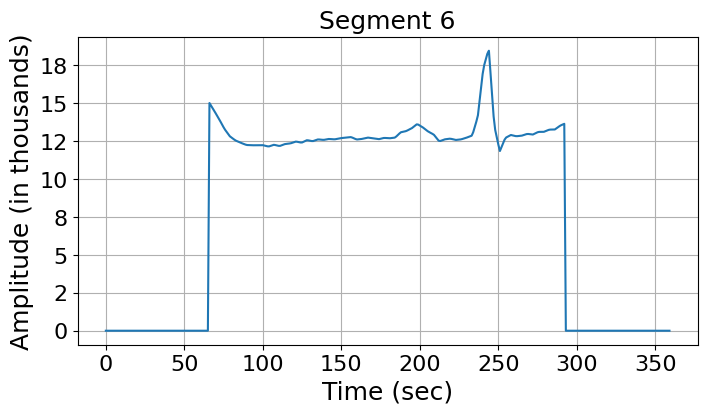

In [ ]:
# Plot each segmented signal
for i in range(len(segmented_signals)):
    plt.figure(figsize=(8, 4))
    plt.plot(segmented_signals[i])
    plt.title(f"Segment {i}", fontsize=18)

    plt.xlabel('Time (sec)', fontsize=18)
    plt.ylabel('Amplitude (in thousands)', fontsize=18)
    plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
    plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

    formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(True)
    plt.show()




## Removing First and Last  Elements from Segmented Signal



In [ ]:
# Assuming you already have the 'segmented_signals' array from the previous code

# Remove the first and last signals
segmented_signals = segmented_signals[1:-1]

# Now 'segmented_signals' contains all the signals except the first and last ones

# Check the shape of the updated 'segmented_signals' array
print(f"Updated segmented_signals shape: {segmented_signals.shape}")


Updated segmented_signals shape: (5, 360)


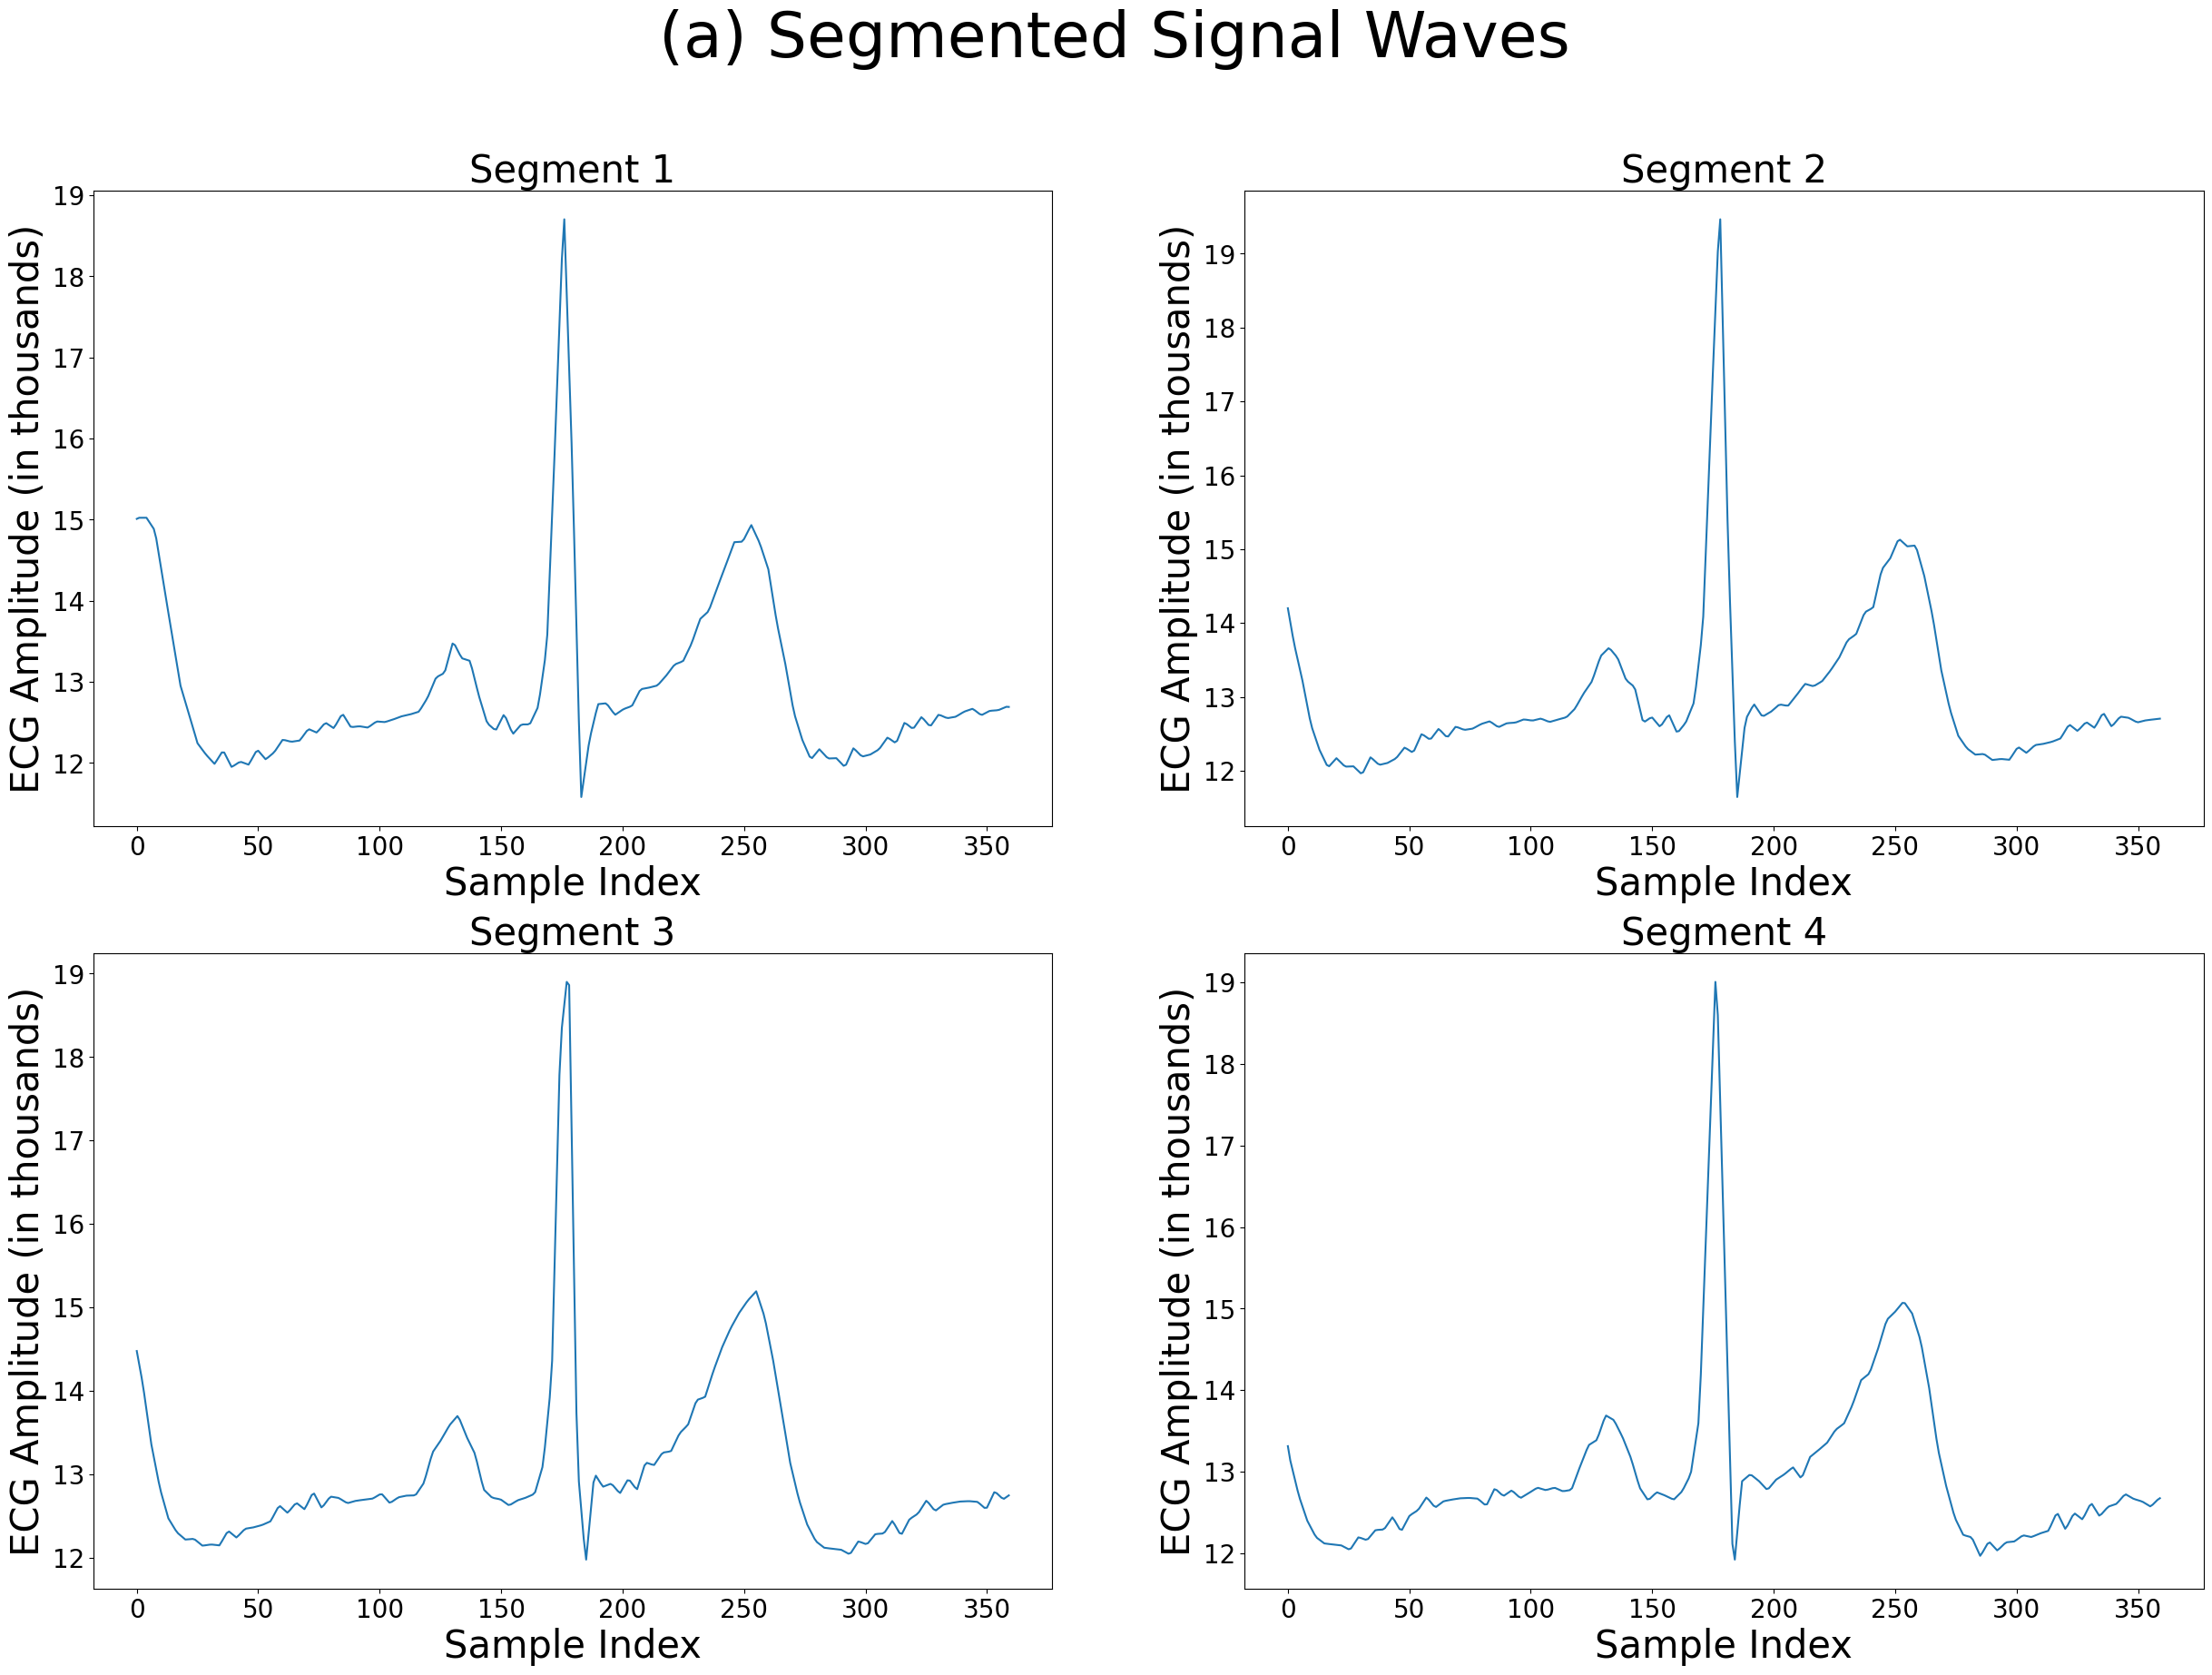

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Assuming segmented_signals is defined elsewhere in your code

fig, axes = plt.subplots(2, 2, figsize=(30, 20))
size = 20

axes = axes.flatten()

for i in range(len(axes)):
    axes[i].plot(segmented_signals[i])
    axes[i].set_title(f"Segment {i + 1}", fontsize=30)
    axes[i].set_xlabel("Sample Index", fontsize=30)
    axes[i].set_ylabel("ECG Amplitude (in thousands)", fontsize=30)

    # Define the formatter to display y-axis values in thousands
    formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x / 1000))
    # Apply the formatter to the y-axis of the subplot
    axes[i].yaxis.set_major_formatter(formatter)

    # Set the font size of x and y tick labels
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)

    #axes[i].grid(True)
# Adding a main title to the figure
fig.suptitle('(a) Segmented Signal Waves', fontsize=50)
plt.show()


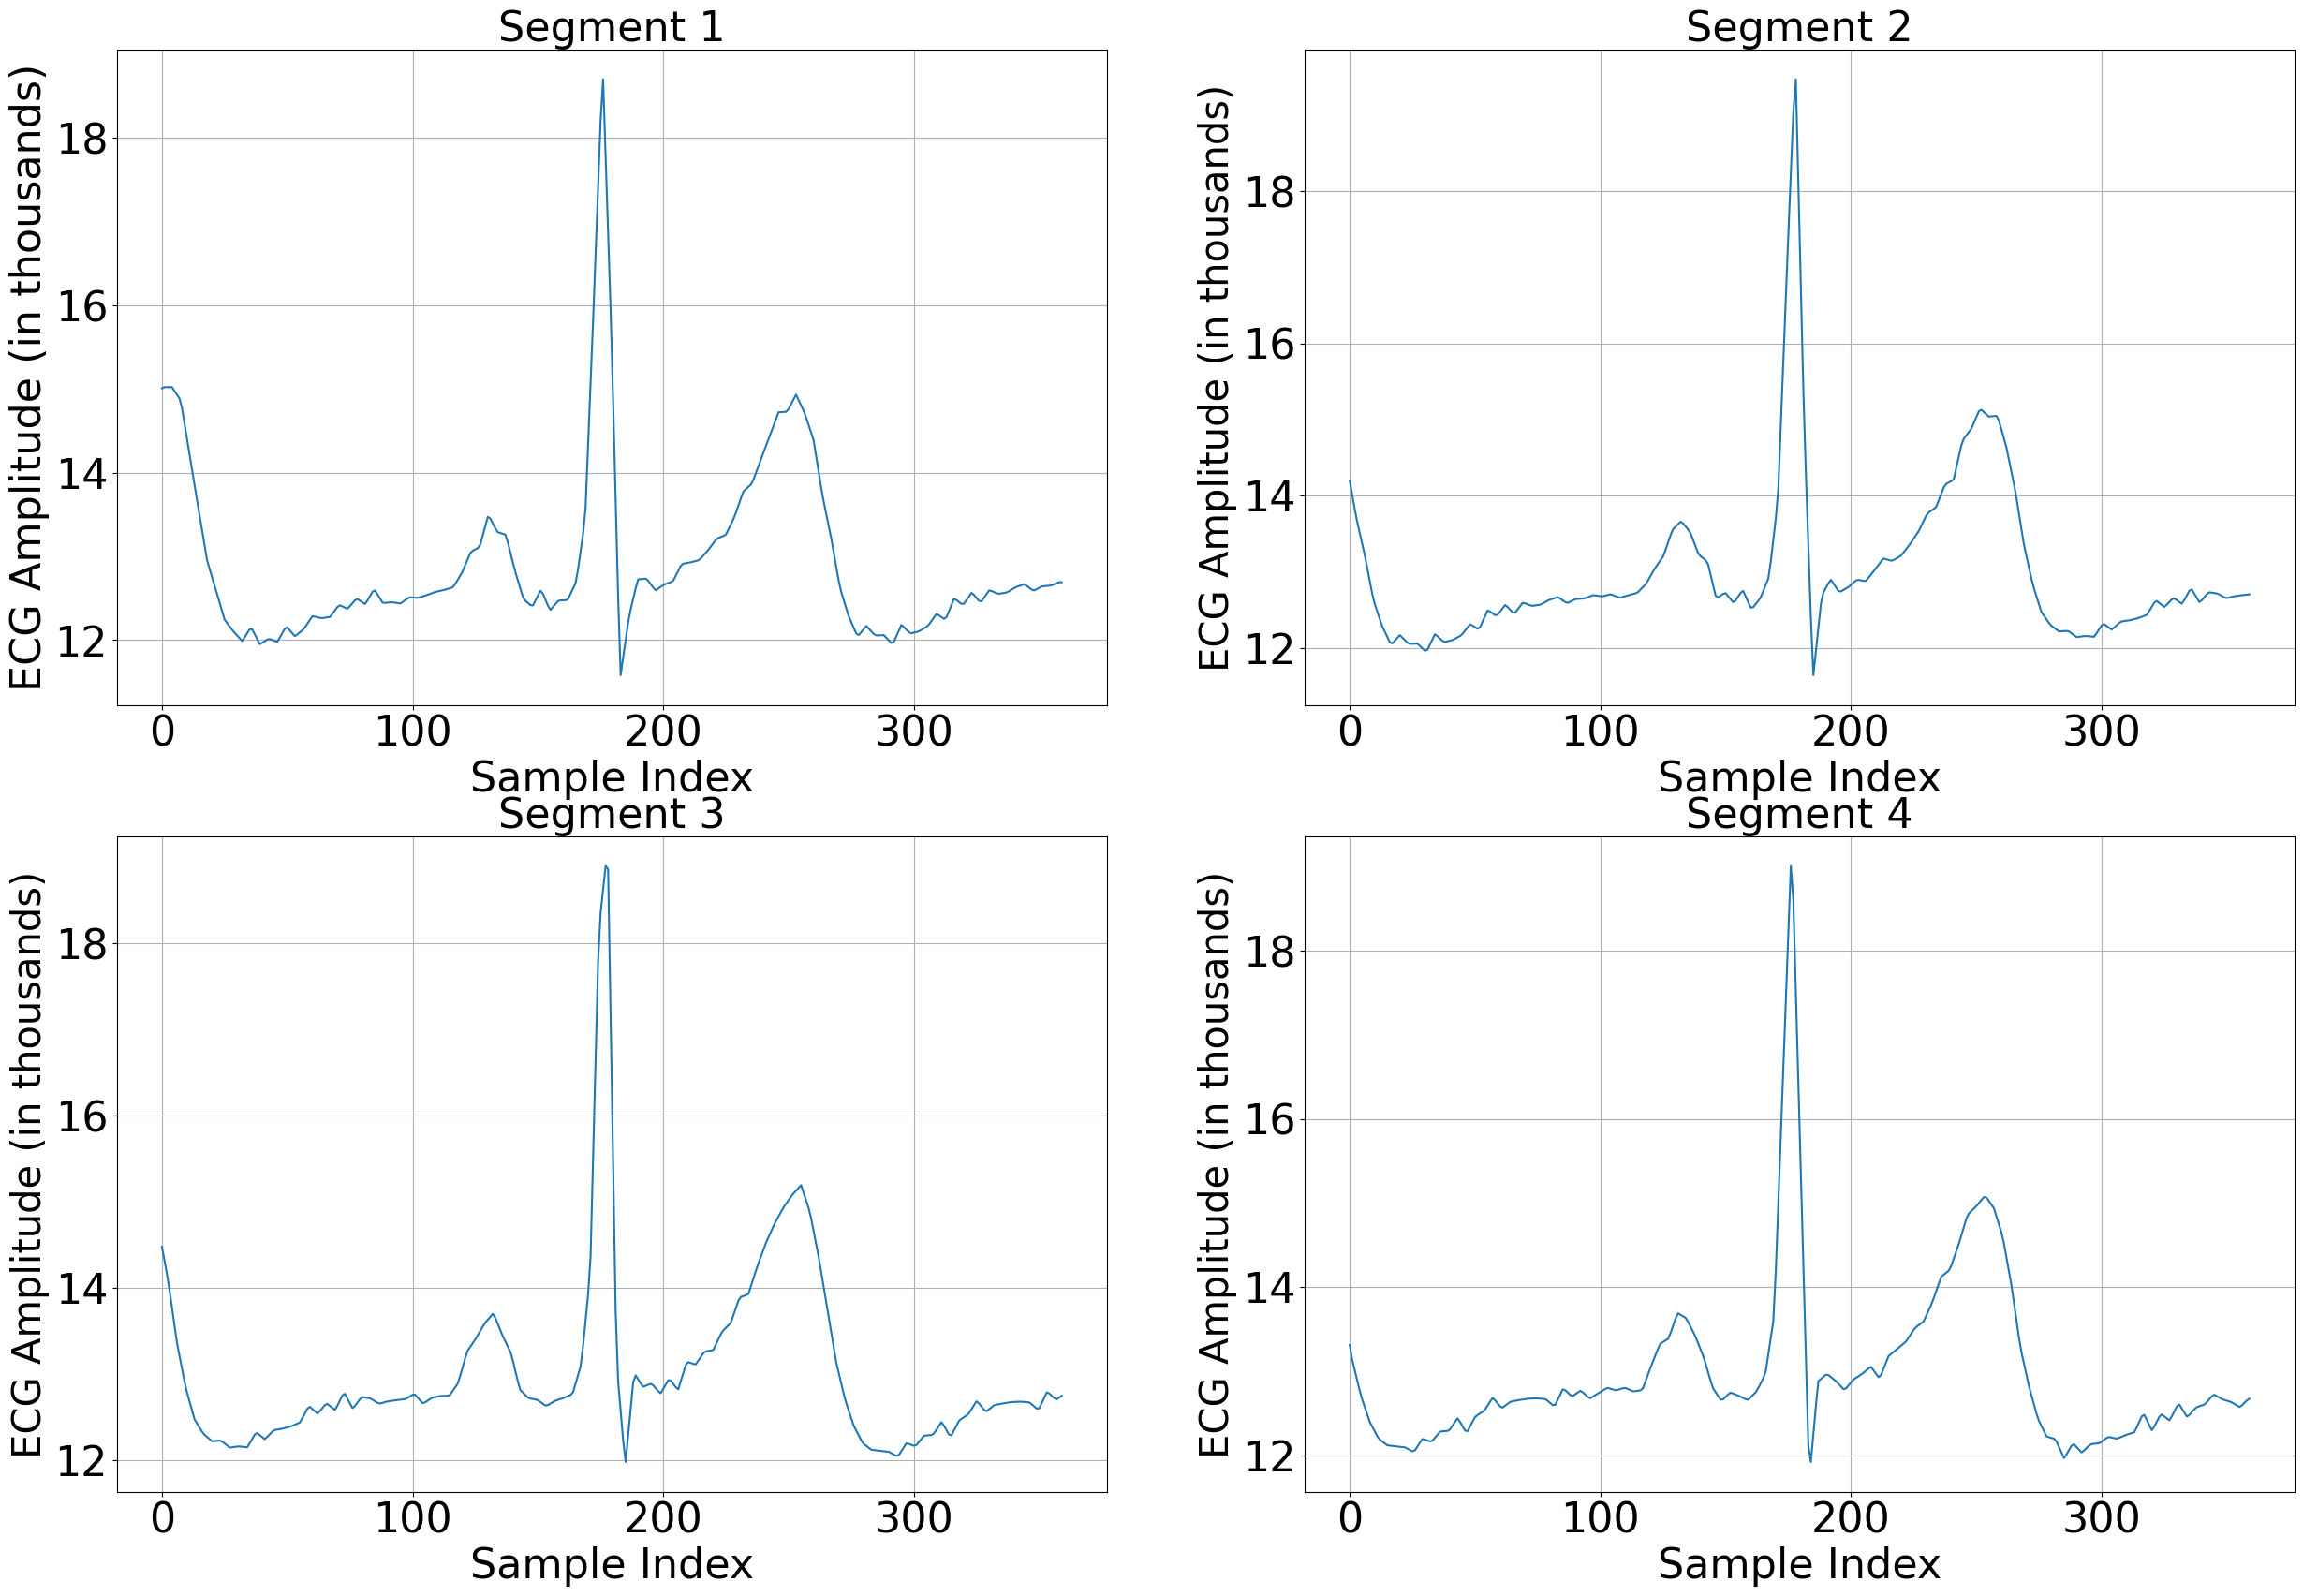

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))
size =32

axes = axes.flatten()
axes[0].plot(segmented_signals[0])
axes[0].set_title(f"Segment {1}",fontsize=size)
axes[0].set_xlabel("Sample Index",fontsize=size)
axes[0].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[0].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[0].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[0].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[0].grid(True)

axes[1].plot(segmented_signals[1])
axes[1].set_title(f"Segment {2}",fontsize=size)
axes[1].set_xlabel("Sample Index",fontsize=size)
axes[1].set_ylabel("ECG Amplitude (in thousands)",fontsize=30)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[1].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[1].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[1].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[1].grid(True)

axes[2].plot(segmented_signals[2])
axes[2].set_title(f"Segment {3}",fontsize=size)
axes[2].set_xlabel("Sample Index",fontsize=size)
axes[2].set_ylabel("ECG Amplitude (in thousands)",fontsize=30)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[2].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[2].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[2].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[2].grid(True)

axes[3].plot(segmented_signals[3])
axes[3].set_title(f"Segment {4}",fontsize=size)
axes[3].set_xlabel("Sample Index",fontsize=size)
axes[3].set_ylabel("ECG Amplitude (in thousands)",fontsize=30)
# Define the formatter to display y-axis values in thousands
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
# Apply the formatter to the y-axis of the subplot
axes[3].yaxis.set_major_formatter(formatter)
# Set the font size of x and y tick labels
axes[3].tick_params(axis='x', labelsize=size)  # Set x-axis tick label font size to 12
axes[3].tick_params(axis='y', labelsize=size)  # Set y-axis tick label font size to 12
axes[3].grid(True)

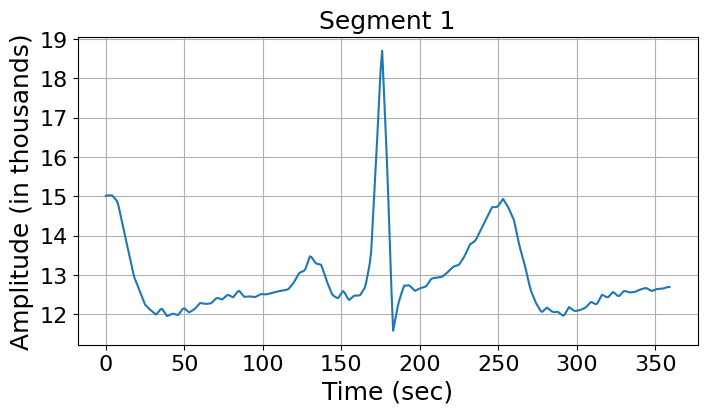

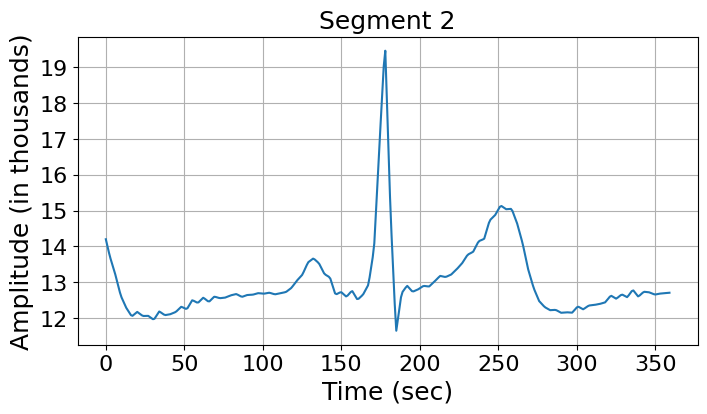

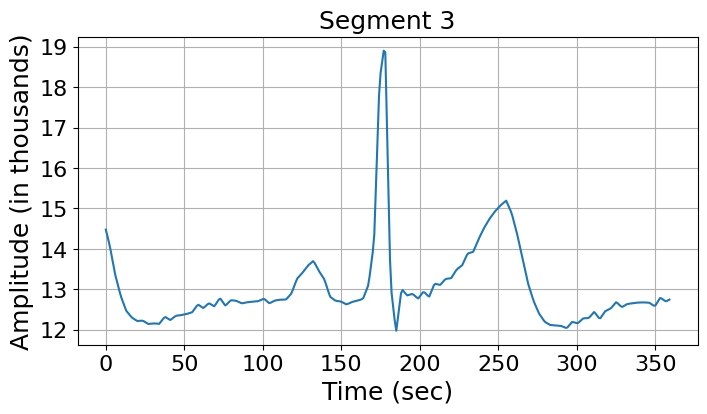

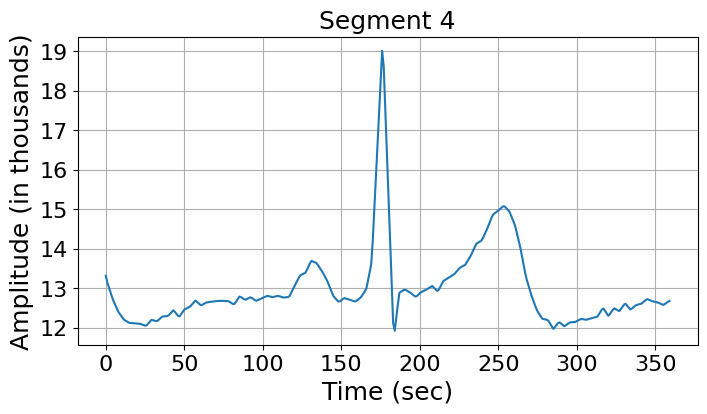

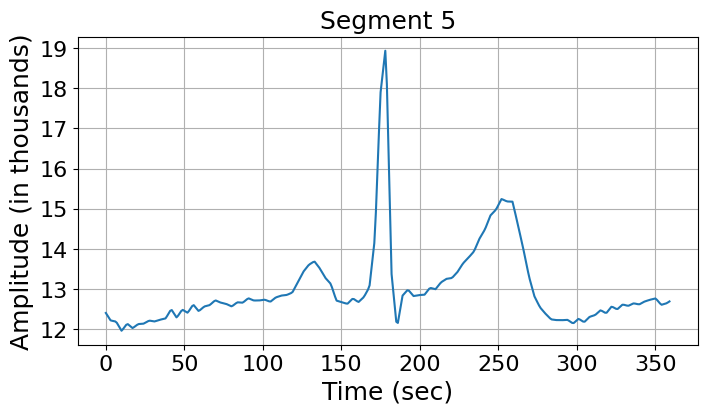

In [ ]:
# Plot each segmented signal
for i in range(len(segmented_signals)):
    plt.figure(figsize=(8, 4))
    plt.plot(segmented_signals[i])
    plt.title(f"Segment {i+1}", fontsize=18)

    plt.xlabel('Time (sec)', fontsize=18)
    plt.ylabel('Amplitude (in thousands)', fontsize=18)
    plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
    plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

    formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x/1000))
    plt.gca().yaxis.set_major_formatter(formatter)
    plt.grid(True)
    plt.show()

#Z-Score Normalization of Segmented Signal

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'segmented_signals' array from the previous code

# Function to perform Z-score normalization on a signal
def z_score_normalization(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    normalized_signal = (signal - mean) / std
    return normalized_signal

# Apply Z-score normalization to each signal in 'segmented_signals'
normalized_signals = np.array([z_score_normalization(signal) for signal in segmented_signals])

# Now 'normalized_signals' contains the Z-score normalized signals

# Check the shape of the 'normalized_signals' array
print(f"Shape of normalized_signals: {normalized_signals.shape}")

no_of_Signals, _ = np.shape(normalized_signals)

print(no_of_Signals)

Shape of normalized_signals: (5, 360)
5


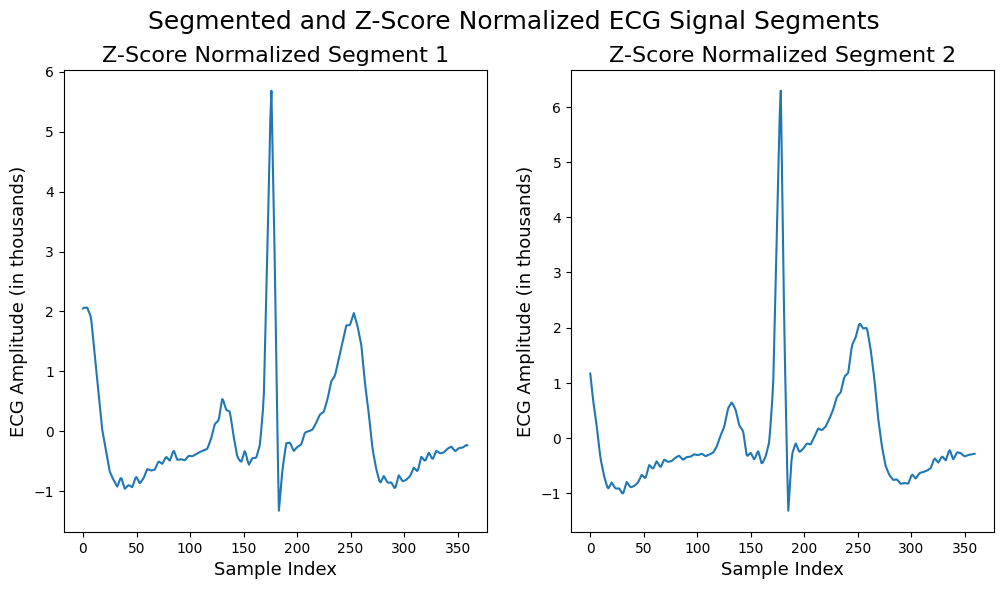

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
size = 20
axes = axes.flatten()

# Adding a super title to the figure
fig.suptitle('Segmented and Z-Score Normalized ECG Signal Segments', fontsize=18)


number= len(normalized_signals)-3

for i in range(number):
    axes[i].plot(normalized_signals[i])
    axes[i].set_title(f"Z-Score Normalized Segment {i + 1}", fontsize=16)
    axes[i].set_xlabel("Sample Index", fontsize=13)
    axes[i].set_ylabel("ECG Amplitude (in thousands)", fontsize=13)

    # Set the font size of x and y tick labels
    axes[i].tick_params(axis='x', labelsize=10)  # Set x-axis tick label font size to 20
    axes[i].tick_params(axis='y', labelsize=10)  # Set y-axis tick label font size to 20
    #axes[i].grid(True)

plt.show()


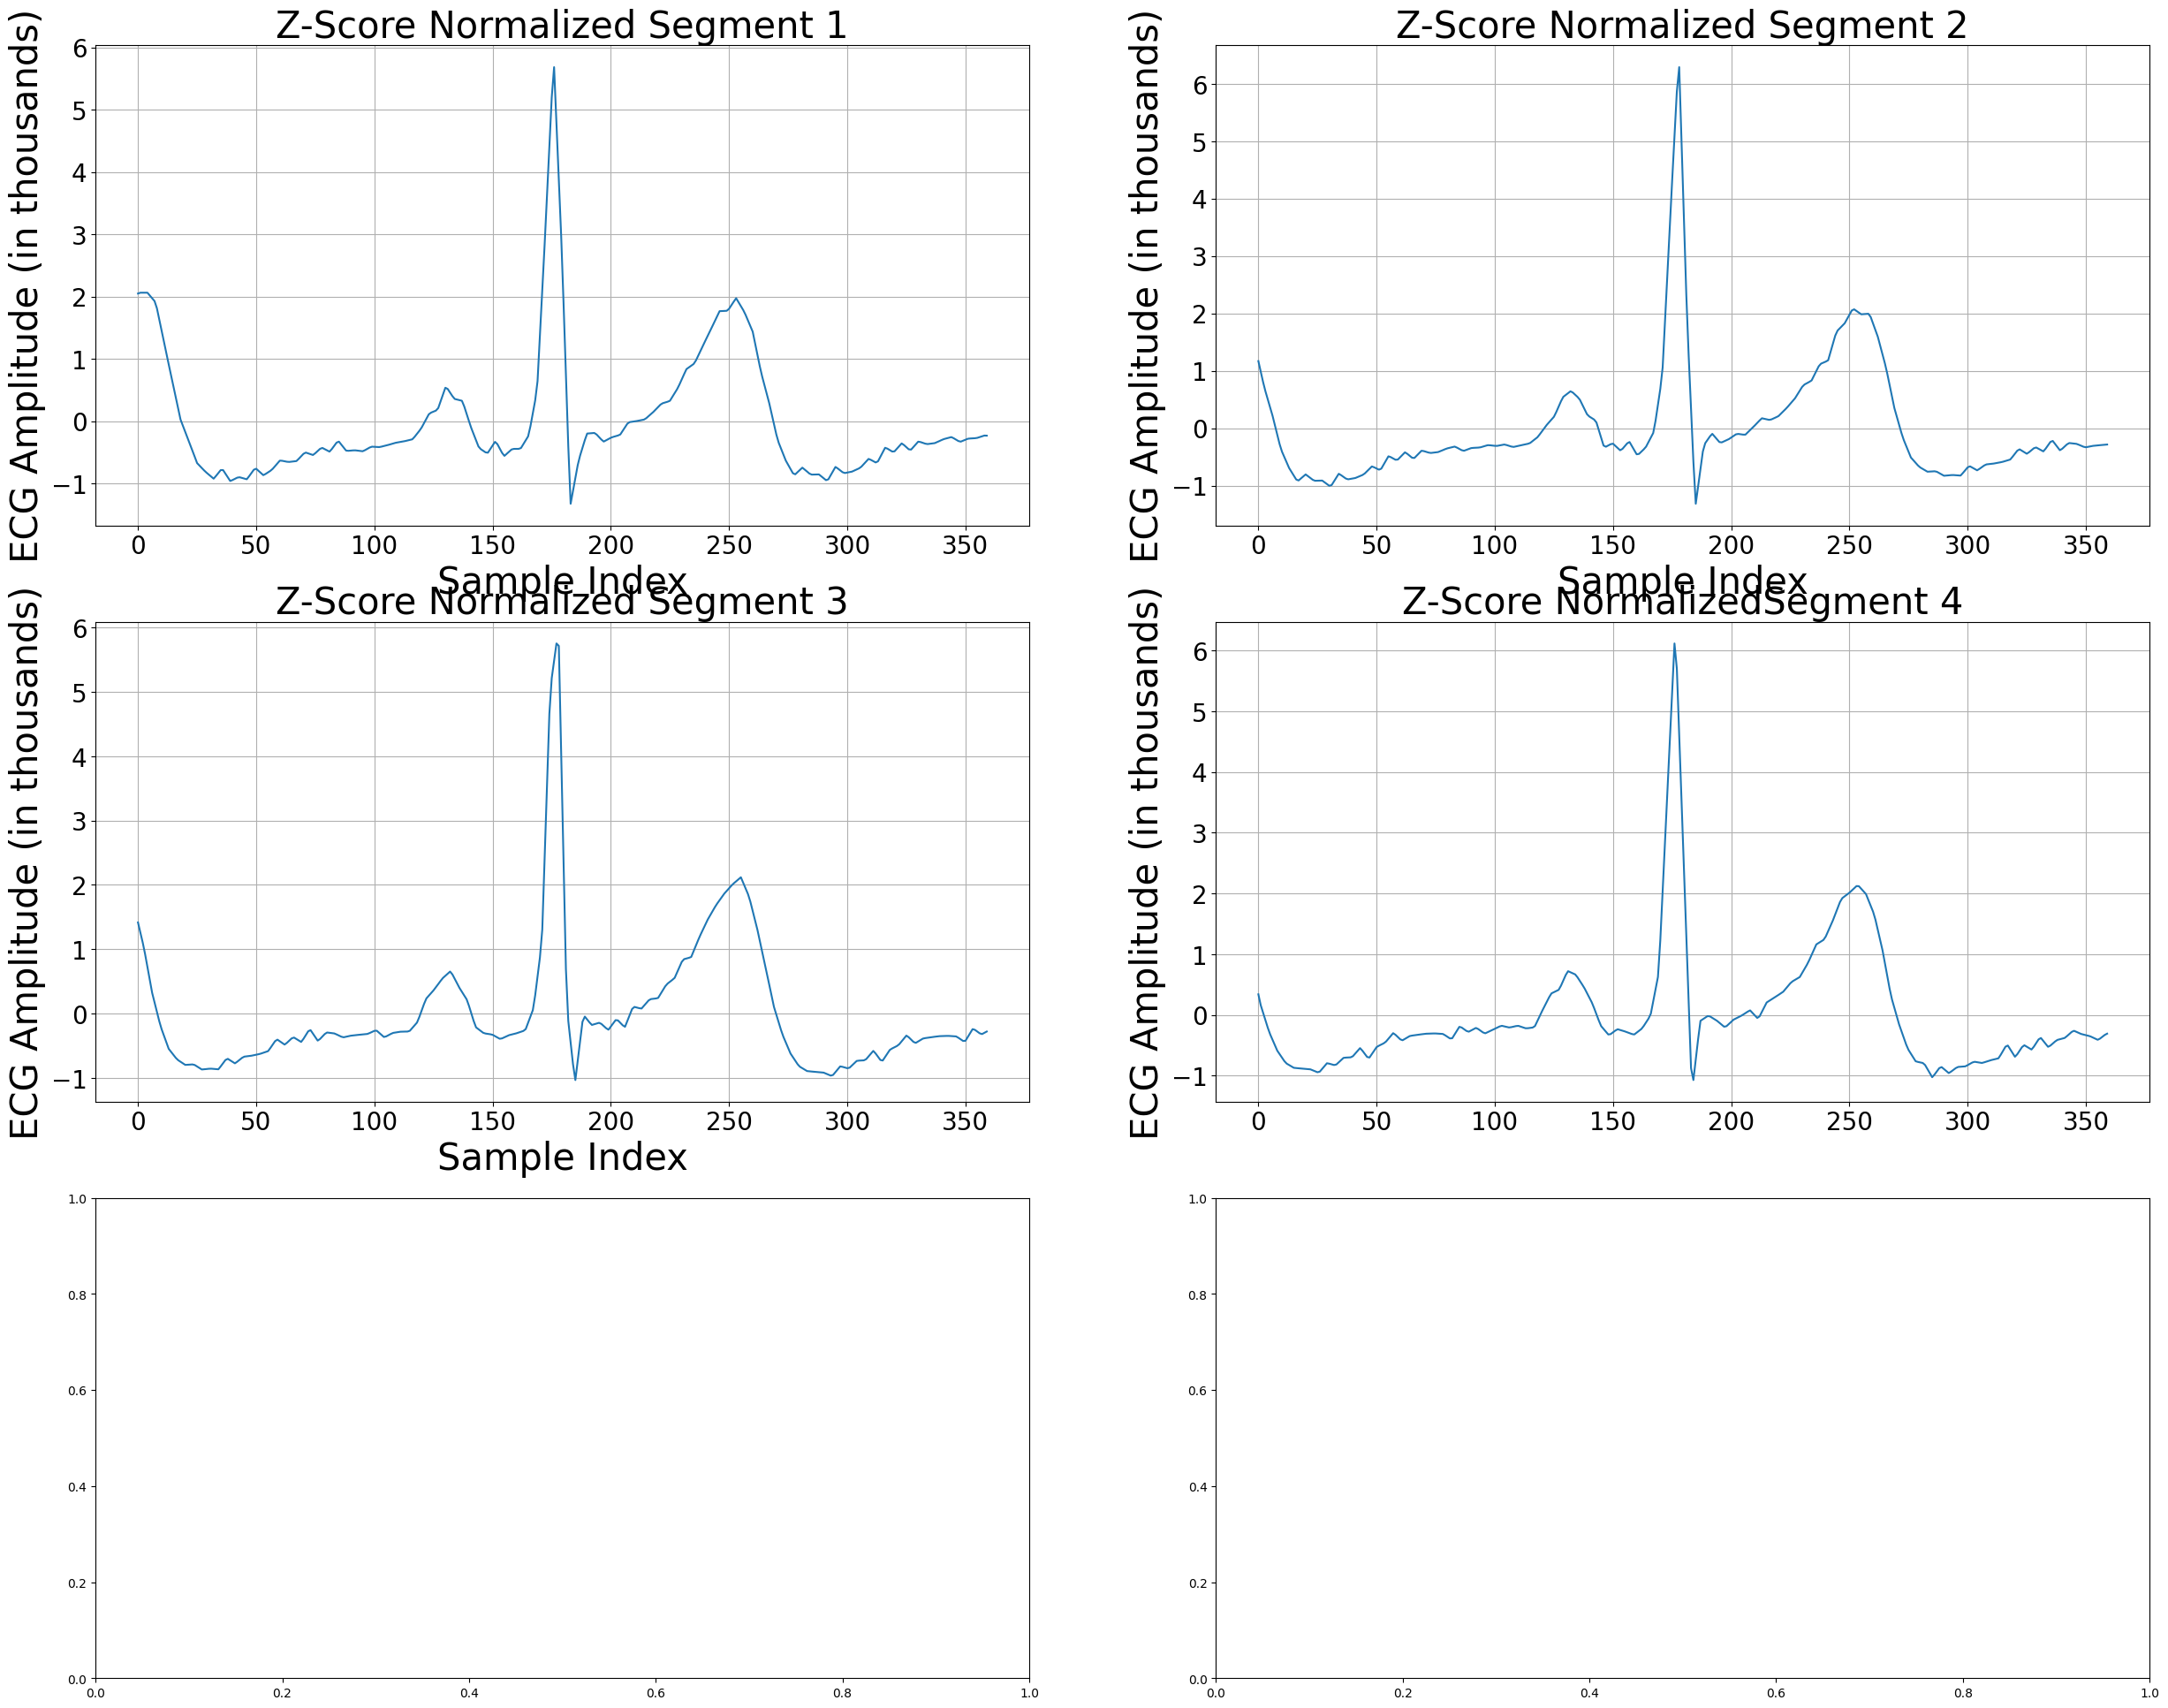

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(30, 24))
size = 30
axes = axes.flatten()
axes[0].plot(normalized_signals[0])
axes[0].set_title(f"Z-Score Normalized Segment {1}",fontsize=size)
axes[0].set_xlabel("Sample Index",fontsize=size)
axes[0].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)

# Set the font size of x and y tick labels
axes[0].tick_params(axis='x', labelsize=20)  # Set x-axis tick label font size to 12
axes[0].tick_params(axis='y', labelsize=20)  # Set y-axis tick label font size to 12
axes[0].grid(True)

axes[1].plot(normalized_signals[1])
axes[1].set_title(f"Z-Score Normalized Segment {2}",fontsize=size)
axes[1].set_xlabel("Sample Index",fontsize=size)
axes[1].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)

# Set the font size of x and y tick labels
axes[1].tick_params(axis='x', labelsize=20)  # Set x-axis tick label font size to 12
axes[1].tick_params(axis='y', labelsize=20)  # Set y-axis tick label font size to 12
axes[1].grid(True)

axes[2].plot(normalized_signals[2])
axes[2].set_title(f"Z-Score Normalized Segment {3}",fontsize=size)
axes[2].set_xlabel("Sample Index",fontsize=size)
axes[2].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)

# Set the font size of x and y tick labels
axes[2].tick_params(axis='x', labelsize=20)  # Set x-axis tick label font size to 12
axes[2].tick_params(axis='y', labelsize=20)  # Set y-axis tick label font size to 12
axes[2].grid(True)

axes[3].plot(normalized_signals[3])
axes[3].set_title(f"Z-Score NormalizedSegment {4}",fontsize=size)
axes[3].set_ylabel("ECG Amplitude (in thousands)",fontsize=size)

# Set the font size of x and y tick labels
axes[3].tick_params(axis='x', labelsize=20)  # Set x-axis tick label font size to 12
axes[3].tick_params(axis='y', labelsize=20)  # Set y-axis tick label font size to 12
axes[3].grid(True)

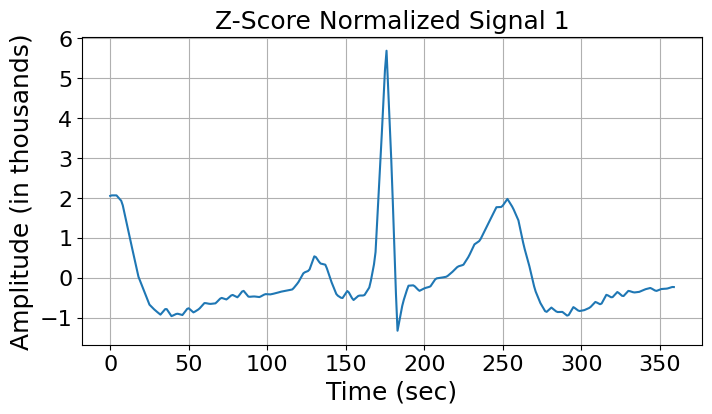

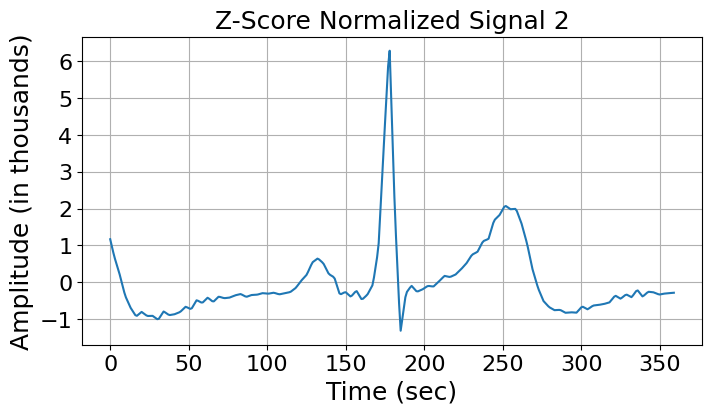

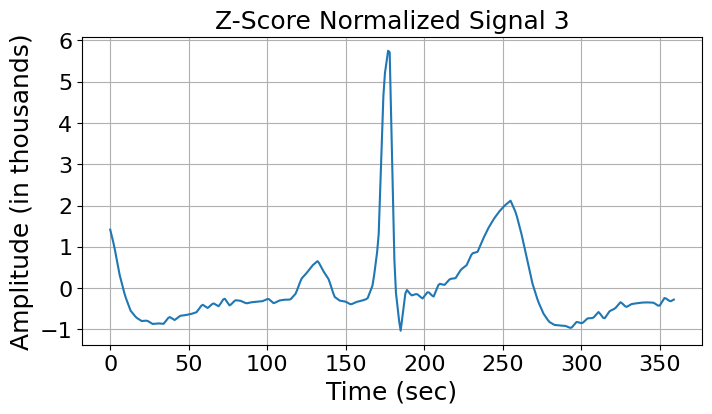

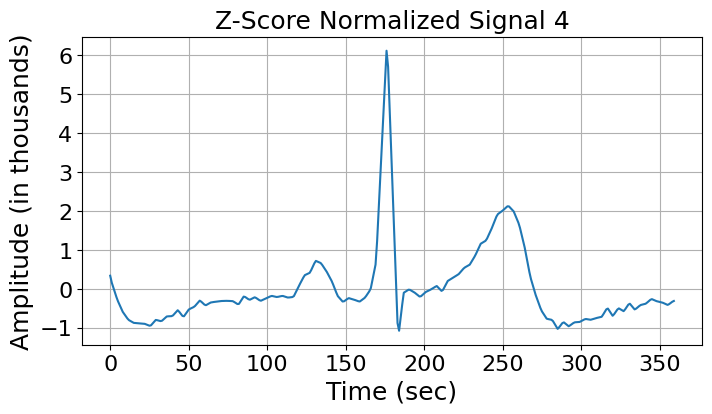

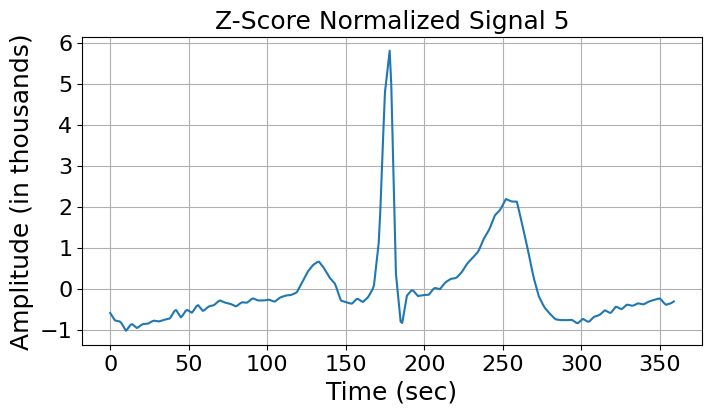

In [ ]:
# Plot each z-score normalized signal
for i in range(len(normalized_signals)):
    plt.figure(figsize=(8, 4))
    plt.plot(normalized_signals[i])
    plt.title(f"Z-Score Normalized Signal {i+1}", fontsize=18)

    plt.xlabel('Time (sec)', fontsize=18)
    plt.ylabel('Amplitude (in thousands)', fontsize=18)
    plt.xticks(fontsize=16)  # Set x-axis tick label font size to 12
    plt.yticks(fontsize=16)  # Set y-axis tick label font size to 12

    plt.grid(True)
    plt.show()

# Making a Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model_c1=tf.keras.models.load_model('/content/drive/My Drive/Models/{}'.format('0.990'))


In [ ]:
z_score_normalized_array = normalized_signals.reshape( no_of_Signals ,360, 1)

##Visualizing Predictions

In [ ]:
from tabulate import tabulate

predictions = model_c1.predict(z_score_normalized_array)

table_headers = ["Signal Number", "NSR (%)", "LBBB (%)", "RBBB (%)", "APC (%)", "PVC (%)"]
table_data = []

count = 1
for prediction in predictions:
    prediction = prediction.tolist()
    NSR, LBBB, RBBB, APC, PVC = prediction

    # Check if probability is less than 0.01, display as zero
    NSR = max(NSR * 100, 0) if NSR >= 0.01 else 0
    LBBB = max(LBBB * 100, 0) if LBBB >= 0.01 else 0
    RBBB = max(RBBB * 100, 0) if RBBB >= 0.01 else 0
    APC = max(APC * 100, 0) if APC >= 0.01 else 0
    PVC = max(PVC * 100, 0) if PVC >= 0.01 else 0

    row_data = [count, NSR, LBBB, RBBB, APC, PVC]
    table_data.append(row_data)
    count += 1

print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


1/1 [==============================] - 0s 29ms/step
+---------------+-------------------+----------+----------+---------+---------+
| Signal Number |      NSR (%)      | LBBB (%) | RBBB (%) | APC (%) | PVC (%) |
+---------------+-------------------+----------+----------+---------+---------+
|       1       | 99.99897480010986 |    0     |    0     |    0    |    0    |
|       2       | 99.99995231628418 |    0     |    0     |    0    |    0    |
|       3       | 99.99995231628418 |    0     |    0     |    0    |    0    |
|       4       | 99.99994039535522 |    0     |    0     |    0    |    0    |
|       5       |       100.0       |    0     |    0     |    0    |    0    |
+---------------+-------------------+----------+----------+---------+---------+


In [ ]:
from tabulate import tabulate

predictions = model_c1.predict(z_score_normalized_array)

table_headers = ["Signal Number", "NSR (%)", "LBBB (%)", "RBBB (%)", "APC (%)", "PVC (%)"]
table_data = []

count = 1
for prediction in predictions:
    prediction = prediction.tolist()
    NSR, LBBB, RBBB, APC, PVC = prediction
    row_data = [count, NSR * 100, LBBB * 100, RBBB * 100, APC * 100, PVC * 100]
    table_data.append(row_data)
    count += 1

print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


1/1 [==============================] - 0s 35ms/step
+---------------+-------------------+------------------------+------------------------+-----------------------+------------------------+
| Signal Number |      NSR (%)      |        LBBB (%)        |        RBBB (%)        |        APC (%)        |        PVC (%)         |
+---------------+-------------------+------------------------+------------------------+-----------------------+------------------------+
|       1       | 99.99897480010986 |  6.30120666755829e-06  |  6.30120666755829e-06  | 0.0006740933713444974 | 0.0003272120466135675  |
|       2       | 99.99995231628418 | 5.269635838800468e-07  | 4.622201732473741e-07  | 3.962936432344577e-05 | 1.2286807304917602e-05 |
|       3       | 99.99995231628418 | 2.8335795931866414e-07 | 4.4421022415974676e-07 | 3.884744899096404e-05 | 7.260632628458552e-06  |
|       4       | 99.99994039535522 | 1.4095633105171146e-06 | 3.733945597161892e-07  | 4.216416016333824e-05 | 9.825601665625

In [ ]:
predictions =model_c1.predict(z_score_normalized_array)
#print(predictions)

count = 1
for prediction in predictions:
  #print(prediction)
  prediction = prediction.tolist()
  NSR , LBBB , RBBB, APC ,PVC = prediction
  print ("For Signal Number", count)
  print("")
  print("Normal Sinus Rhythm Probability" , NSR * 100 , "%")
  print("")
  print("Left bundle Block Probability" , LBBB * 100 , "%")
  print("")
  print("Right Bundle Block Probability" , RBBB * 100 , "%")
  print("")
  print("Atrial Premature Contraction Probability" , APC * 100 , "%")
  print("")
  print("Premature Ventricular Contraction  Probability" , PVC * 100 , "%")
  print("")
  count = count + 1
  print("")

1/1 [==============================] - 0s 306ms/step
For Signal Number 1

Normal Sinus Rhythm Probability 99.99897480010986 %

Left bundle Block Probability 6.30120666755829e-06 %

Right Bundle Block Probability 6.30120666755829e-06 %

Atrial Premature Contraction Probability 0.0006740933713444974 %

Premature Ventricular Contraction  Probability 0.0003272120466135675 %


For Signal Number 2

Normal Sinus Rhythm Probability 99.99995231628418 %

Left bundle Block Probability 5.269635838800468e-07 %

Right Bundle Block Probability 4.622201732473741e-07 %

Atrial Premature Contraction Probability 3.962936432344577e-05 %

Premature Ventricular Contraction  Probability 1.2286807304917602e-05 %


For Signal Number 3

Normal Sinus Rhythm Probability 99.99995231628418 %

Left bundle Block Probability 2.8335795931866414e-07 %

Right Bundle Block Probability 4.4421022415974676e-07 %

Atrial Premature Contraction Probability 3.884744899096404e-05 %

Premature Ventricular Contraction  Probability 

#Failure's

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty 2D NumPy array to store the segmented signals
segmented_signals = np.empty((len(r_peaks) - 1, segment_length))

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    # Calculate the start and end indices for the segment centered around the R-peak
    print(i)
    center_index = r_peaks[i]
    print("center index",center_index)
    start_index = center_index - 180

    if start_index < 0:
      start_index = 0
    #segment_length // 2
    print("start index",start_index)

    end_index = center_index + 180
    if end_index > (len(ecg_data) - 1):
      end_index = len(ecg_data) - 1
    #segment_length // 2
    print("end index",end_index)

    segment = ecg_data[start_index:end_index]
    segmented_signals[i - 1] = segment
"""

    # Ensure that the segment doesn't go out of bounds
    if start_index >= 0 and end_index < len(ecg_data):
        # Extract the segment and store it in the 2D array
        segment = ecg_data[start_index:end_index]
        segmented_signals[i - 1] = segment

print(segmented_signals)

# Plot each segmented signal separately
for i, segment in enumerate(segmented_signals):
    plt.figure(figsize=(12, 6))
    t_segment = np.arange(len(segment)) / sampling_rate
    plt.plot(t_segment, segment, label=f'Segment {i + 1}', color='green')
    plt.axvline(segment_length / (2 * sampling_rate), color='red', linestyle='--', label='R-peak')
    plt.xlabel('Time (s)')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Segment {i + 1} Centered Around R-Peak')
    plt.legend()
    plt.grid()
    plt.show()
"""

1
center index 80
start index 0
end index 260


ValueError: ignored

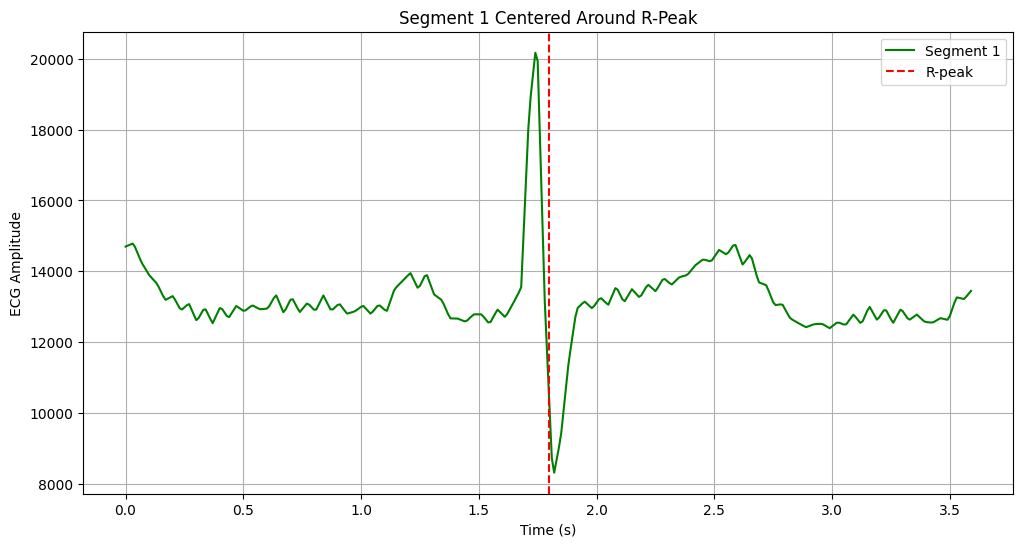

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty list to store the segmented signals
segmented_signals = []

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    # Calculate the start and end indices for the segment centered around the R-peak
    center_index = r_peaks[i]
    start_index = center_index - segment_length // 2
    end_index = center_index + segment_length // 2

    # Ensure that the segment doesn't go out of bounds
    if start_index >= 0 and end_index < len(ecg_data):
        # Extract the segment
        segment = ecg_data[start_index:end_index]

        # Append the segment to the list
        segmented_signals.append(segment)

# Plot each segmented signal separately
for i, segment in enumerate(segmented_signals):
    plt.figure(figsize=(12, 6))
    t_segment = np.arange(len(segment)) / sampling_rate
    plt.plot(t_segment, segment, label=f'Segment {i+1}', color='green')
    plt.axvline(segment_length / (2 * sampling_rate), color='red', linestyle='--', label='R-peak')
    plt.xlabel('Time (s)')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Segment {i+1} Centered Around R-Peak')
    plt.legend()
    plt.grid()
    plt.show()


[array([14698.26147427, 14726.23922114, 14754.21696801, 14782.19471488,
       14688.95827538, 14530.31849791, 14371.67872045, 14226.92211405,
       14116.20166898, 14005.48122392, 13894.76077886, 13819.74408901,
       13747.418637  , 13675.09318498, 13566.28650904, 13429.96940195,
       13293.65229485, 13193.32267038, 13228.14603616, 13262.96940195,
       13297.79276773, 13198.71070932, 13076.08484006, 12953.45897079,
       12920.35326843, 12980.17802503, 13040.00278164, 13072.29485396,
       12921.69123783, 12771.0876217 , 12620.48400556, 12676.18776078,
       12793.15855355, 12910.12934631, 12923.67872045, 12789.14742698,
       12654.61613352, 12534.28233658, 12675.95688456, 12817.63143255,
       12959.30598053, 12934.45479833, 12835.34214186, 12736.2294854 ,
       12704.75938804, 12809.527121  , 12914.29485396, 13019.06258693,
       12976.581363  , 12929.85257302, 12883.12378303, 12897.06675939,
       12949.45062587, 13001.83449235, 13032.28789986, 12997.76216968,
     

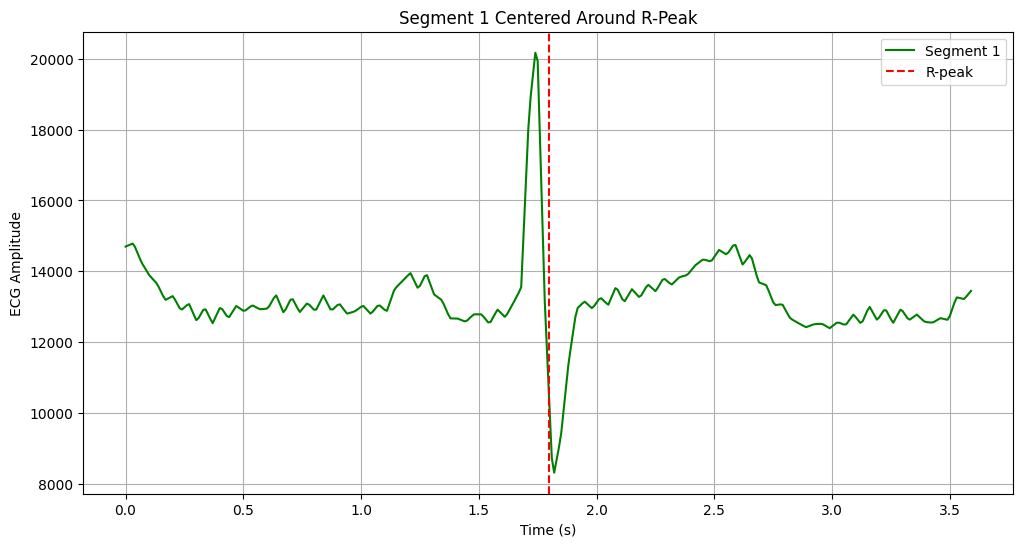

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty list to store the segmented signals
segmented_signals = []

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    # Calculate the start and end indices for the segment centered around the R-peak
    center_index = r_peaks[i]
    start_index = center_index - segment_length // 2
    end_index = center_index + segment_length // 2

    # Ensure that the segment doesn't go out of bounds
    if start_index >= 0 and end_index < len(ecg_data):
        # Extract the segment
        segment = ecg_data[start_index:end_index]

        # Append the segment to the list
        segmented_signals.append(segment)

print(segmented_signals)
print(type(segmented_signals))
print(len(segmented_signals))

# Plot each segmented signal separately
for i, segment in enumerate(segmented_signals):
    print(i)
    print(segment)
    plt.figure(figsize=(12, 6))
    t_segment = np.arange(len(segment)) / sampling_rate
    plt.plot(t_segment, segment, label=f'Segment {i+1}', color='green')
    plt.axvline(segment_length / (2 * sampling_rate), color='red', linestyle='--', label='R-peak')
    plt.xlabel('Time (s)')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Segment {i+1} Centered Around R-Peak')
    plt.legend()
    plt.grid()
    plt.show()


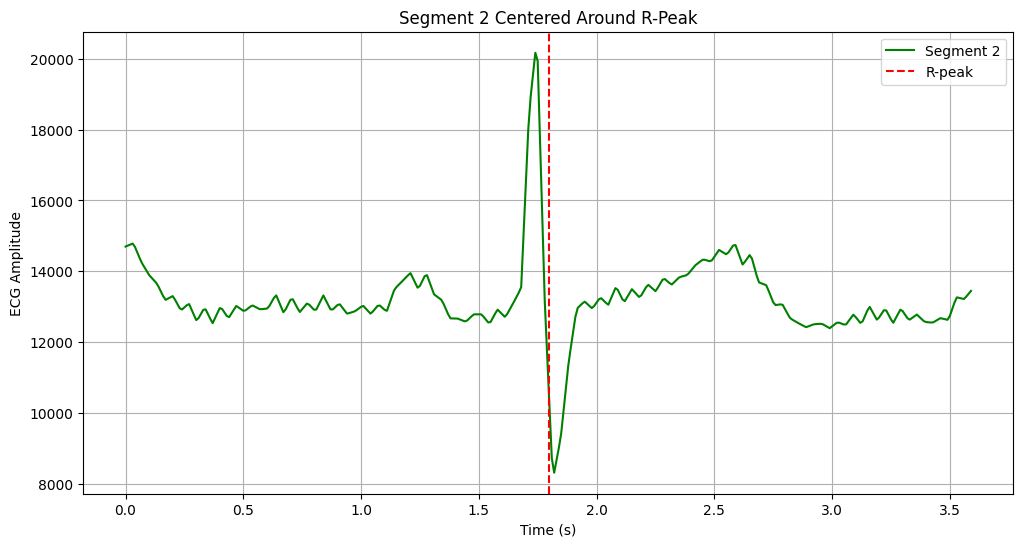

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty list to store the segmented signals
segmented_signals = []

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    # Calculate the start and end indices for the segment centered around the R-peak
    center_index = r_peaks[i]
    start_index = center_index - segment_length // 2
    end_index = center_index + segment_length // 2

    # Ensure that the segment doesn't go out of bounds
    if start_index >= 0 and end_index < len(ecg_data):
        # Extract the segment
        segment = ecg_data[start_index:end_index]

        # Plot the segment separately
        plt.figure(figsize=(12, 6))
        t_segment = np.arange(len(segment)) / sampling_rate
        plt.plot(t_segment, segment, label=f'Segment {i}', color='green')
        plt.axvline(segment_length // 2 / sampling_rate, color='red', linestyle='--', label='R-peak')
        plt.xlabel('Time (s)')
        plt.ylabel('ECG Amplitude')
        plt.title(f'Segment {i} Centered Around R-Peak')
        plt.legend()
        plt.grid()
        plt.show()


1


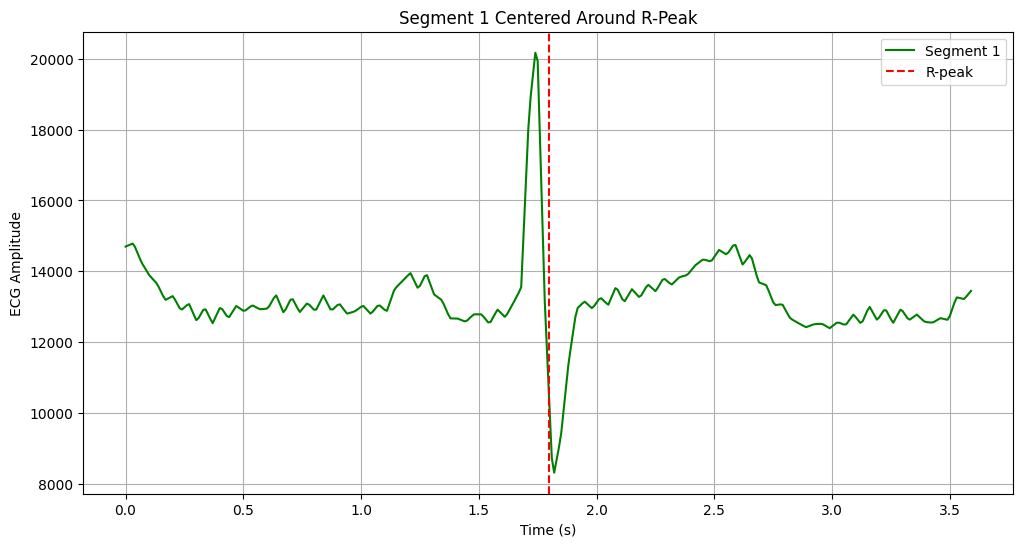

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty list to store the segmented signals
segmented_signals = []

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    # Calculate the start and end indices for the segment centered around the R-peak
    #print(i)
    center_index = r_peaks[i]
    start_index = center_index - segment_length // 2
    end_index = center_index + segment_length // 2

    # Ensure that the segment doesn't go out of bounds
    if start_index >= 0 and end_index < len(ecg_data):
        # Extract the segment
        segment = ecg_data[start_index:end_index]

        # Append the segment to the list
        segmented_signals.append(segment)

print(len(segmented_signals))

# Plot each segmented signal separately
for i, segment in enumerate(segmented_signals):
    plt.figure(figsize=(12, 6))
    t_segment = np.arange(len(segment)) / sampling_rate
    plt.plot(t_segment, segment, label=f'Segment {i+1}', color='green')
    plt.axvline(segment_length / (2 * sampling_rate), color='red', linestyle='--', label='R-peak')
    plt.xlabel('Time (s)')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Segment {i+1} Centered Around R-Peak')
    plt.legend()
    plt.grid()
    plt.show()


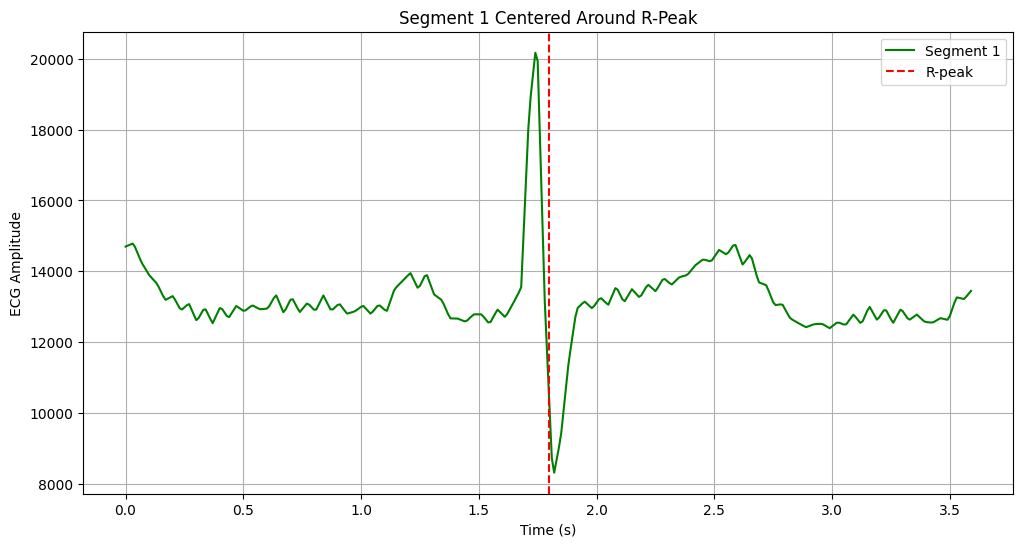

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to include in each signal segment
segment_length = 360

# Create an empty list to store the segmented signals
segmented_signals = []

# Iterate over the R-peaks, ignoring the first peak
for i in range(1, len(r_peaks)):
    # Calculate the start and end indices for the segment centered around the R-peak
    center_index = r_peaks[i]
    start_index = center_index - segment_length // 2
    end_index = center_index + segment_length // 2

    # Ensure that the segment doesn't go out of bounds
    if start_index >= 0 and end_index < len(ecg_data):
        # Extract the segment
        segment = ecg_data[start_index:end_index]

        # Append the segment to the list
        segmented_signals.append(segment)

# Plot each segmented signal separately
for i, segment in enumerate(segmented_signals):
    plt.figure(figsize=(12, 6))
    t_segment = np.arange(len(segment)) / sampling_rate
    plt.plot(t_segment, segment, label=f'Segment {i+1}', color='green')
    plt.axvline(segment_length / (2 * sampling_rate), color='red', linestyle='--', label='R-peak')
    plt.xlabel('Time (s)')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Segment {i+1} Centered Around R-Peak')
    plt.legend()
    plt.grid()
    plt.show()


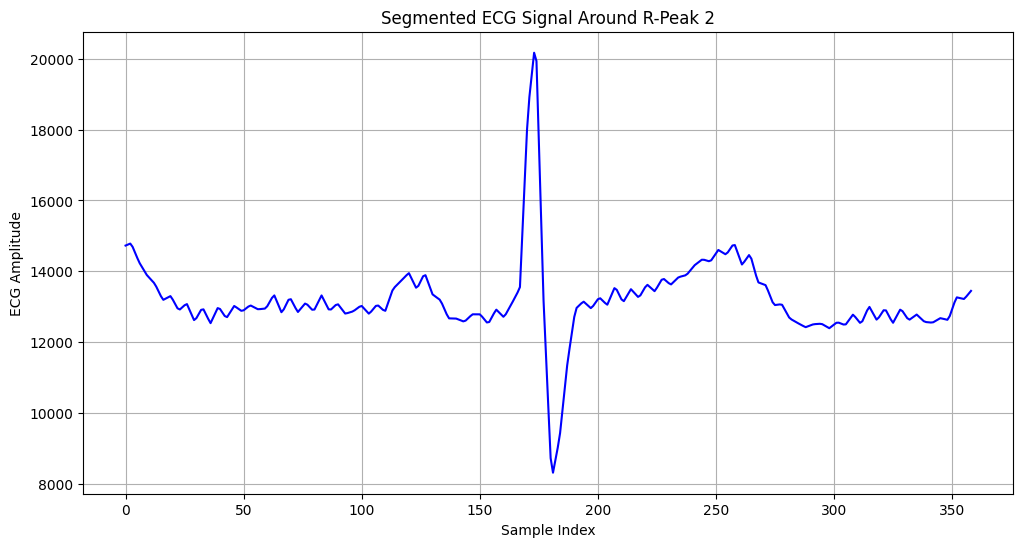

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already detected R-peaks and stored them in the 'r_peaks' variable

# Define the window size
window_size = 360  # 360 samples in total (179 left, R-peak, 180 right)

# Iterate over the indices of the R-peaks (excluding the first R-peak)
for i in range(1, len(r_peaks)):
    center_index = r_peaks[i]

    # Extract the segment centered around the R-peak
    start_index = center_index - 179
    end_index = center_index + 180

    # Ensure the window does not extend beyond the signal boundaries
    if start_index < 0 or end_index >= len(ecg_data):
        continue

    # Extract the segment
    segment = ecg_data[start_index:end_index]

    # Create a new figure for each segment
    plt.figure(figsize=(12, 6))
    plt.plot(segment, color='blue')
    plt.xlabel('Sample Index')
    plt.ylabel('ECG Amplitude')
    plt.title(f'Segmented ECG Signal Around R-Peak {i}')
    plt.grid()
    plt.show()


In [ ]:
import os
import tensorflow as tf

# Define the full path to the model file
model_load_path = os.path.abspath('CNN.h5')

# Load the model
loaded_model = tf.keras.models.load_model('/content/CNN.h5')


OSError: ignored